**Comprehensive Analysis of Urban Development and Climate Vulnerability (2013 Case Study)**

This document details the step-by-step process of a data analysis project aimed at understanding the complex relationships between climatic factors, urban infrastructure, and environmental health. The analysis is based on a 2013 case study of 140 municipalities in Mexico and culminates in the creation of several vulnerability indices, including an advanced, multi-dimensional index to assess urban sustainability and climate resilience.

Part 1: Data Preparation and Integration
(Steps 1-9)

The analysis begins by loading two primary datasets:

A comprehensive climate dataset sourced from the NASA POWER project (https://power.larc.nasa.gov/data-access-viewer/), containing numerous meteorological variables (e.g., temperature, wind speed, radiation).

An environmental dataset containing 2013 socio-environmental indicators for the case study municipalities, such as the state of aquifers, drainage coverage, and deforestation rates. This data was based on information available from the Government of Jalisco's transparency portal (https://transparencia.info.jalisco.gob.mx/transparencia/informacion-fundamental/3062).

The key preparation steps included:

Standardization: Renaming columns for clarity (e.g., 'ccc' to 'Municipality') and converting municipality names to a consistent lowercase format to ensure accurate merging.

Filtering: The datasets were filtered to isolate the data specifically for the 140 common municipalities for the year 2013.

Merging: The climate and environmental data were merged into a single, unified DataFrame named df_complete_2013.

Cleaning: Non-numeric or redundant columns (such as categorical Nivel columns, IDs, and sources) were removed to create a clean, analysis-ready DataFrame named df_analysis.

Part 2: Exploratory Analysis - Correlation Matrix
(Step 10)

To gain initial insights, an exploratory analysis was conducted. A correlation matrix was generated to visualize the relationships between the annual average temperature (T2M) and key environmental and infrastructure variables. This heatmap revealed expected correlations, such as a strong positive link between water supply and drainage coverage, and helped validate the integrity of the merged dataset.

Part 3: Machine Learning Modeling for Feature Importance
(Steps 11-26)

The core of the analysis involved training models using a Random Forest Regressor architecture. This is an ensemble learning method that builds multiple decision trees during training and outputs the mean prediction of the individual trees, providing robust and accurate feature importance analysis. The goal was not to predict future values but to leverage the model's feature_importances_ attribute to identify which climatic variables most significantly influence key environmental and urban indicators.

Model 1: Industrial Zone Identification: This model aimed to identify the climatic factors most associated with industrial presence (measured by the RETC_Normalizado index). Key variables included soil moisture (GWETTOP), maximum temperature (T2M_MAX), and wind speed.

Model 2: Forest Cover Prediction: This model identified the climate variables that best explain the existing forest cover (Cobertura_Forestal_Normalizado). Maximum temperature (T2M_MAX), relative humidity (RH2M), and wind patterns emerged as the most important factors.

Model 3: Aquifer Status Prediction: This model explored the climatic drivers affecting the health of aquifers (Acuiferos_Normalizado). Again, maximum temperature (T2M_MAX) and soil moisture (GWETTOP) were identified as critical variables, highlighting the link between heat, evaporation, and groundwater recharge.

Model 4: Drainage Capacity Analysis: This model assessed which climate variables are most related to a municipality's drainage capacity (Drenaje_Normalizado). Radiative fluxes (ALLSKY_SFC_LW_DWN) and overall temperature (T2M, TS) were found to be most significant.

Part 4: Thematic Vulnerability Indices
(Steps 17-20 & 27-29)

Based on the insights from the machine learning models, two thematic vulnerability indices were constructed to rank municipalities based on specific risks.

Heat Vulnerability Index: This index identifies municipalities most vulnerable to extreme heat and "green deficit." It combines factors like high maximum temperatures, low humidity, drying winds, and a lack of forest cover. A high score indicates an urgent need for green infrastructure.

Flood Vulnerability Index: This index assesses the risk of flooding from heavy rainfall. It integrates factors such as high total precipitation, poor drainage infrastructure, low forest cover (reducing natural water absorption), and high soil erosion risk.

Part 5: Advanced Holistic Assessment - The Urban Sustainability & Climate Resilience Index (USCR-I)
(Steps 30-34)

This final, innovative index provides a holistic assessment of a municipality's urban development balance.

Hypothesis: Sustainable urban development requires a balance between Urban-Industrial Pressure and the Health of Ecosystems & Infrastructure. This balance is further tested by Climate Stressors. A high score on this index signifies a critical imbalance, where urban pressures overwhelm the environmental capacity to respond, exacerbated by climate change.

The USCRI is calculated from three sub-indices:

Pressure Score: Measures the environmental load from human activity (industrial emissions, poor waste management, deforestation).

Health Score: Measures the state of natural and built systems (poor water/drainage services, over-exploited aquifers, low forest cover).

Climate Stressor Score: Measures the amplifying effect of climate factors (extreme heat and heavy precipitation).

By combining these scores, the USCRI provides a nuanced ranking that identifies municipalities not just with a single problem, but with a systemic vulnerability resulting from unsustainable development patterns facing significant climate risk. The results are presented both as a ranked table and a bar chart for clear visual interpretation.

In [ ]:
from google.colab import files
import pandas as pd
import io

# This command will open a window for you to select your file.
print("Please select the 'clima_unificado_completo.csv' file to upload.")
uploaded = files.upload()

# The name of the file we are expecting
file_name = 'clima_unificado_completo.csv'

# Once uploaded, this code will read it and show you the top of the table.
if file_name in uploaded:
  print(f"\n'{file_name}' was uploaded successfully!")
  print("Here are the first 5 rows of your file:")

  # We read the uploaded file into a pandas DataFrame
  df = pd.read_csv(io.BytesIO(uploaded[file_name]))

  # We display the first 5 rows
  print(df.head())
else:
  print(f"\nError: The file '{file_name}' was not found. Please make sure you upload the file with that exact name.")

Please select the 'clima_unificado_completo.csv' file to upload.


Saving clima_unificado_completo.csv to clima_unificado_completo.csv

'clima_unificado_completo.csv' was uploaded successfully!
Here are the first 5 rows of your file:
  Municipio        parameter_x  year  jan_x  feb_x  mar_x  apr_x  may_x  \
0    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
1    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
2    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
3    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
4    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   

   jun_x  jul_x  ...   apr_y   may_y   jun_y   jul_y   aug_y   sep_y   oct_y  \
0  32.19  31.47  ...    0.32    0.31    0.39    0.51    0.56    0.63    0.60   
1  32.19  31.47  ...    0.31    0.31    0.39    0.51    0.56    0.63    0.60   
2  32.19  31.47  ...    0.14    0.14    0.44    0.62    0.65    0.71    0.66   
3  32.19  31.47  ... -999.00 -999.00 -999.00 -999.00 -999.00 -

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving jalisco.2013. Espaciotemporal.xlsx to jalisco.2013. Espaciotemporal.xlsx


In [ ]:
import pandas as pd

df_jalisco = pd.read_excel('jalisco.2013. Espaciotemporal.xlsx')

In [ ]:
df_jalisco.columns

Index(['c', 'ccc', 'Region', 'Acuiferos', 'Nivel', 'Acuiferos_Normalizado',
       'Agua', 'Nivel.1', 'Agua_Normalizado', 'Drenaje', 'Nivel.2',
       'Drenaje_Normalizado', 'NOM', 'Nivel.3', 'NOM_Normalizado',
       'UGAs_Conservacion', 'Nivel.4', 'UGAs_Conservacion_Normalizado',
       'area_ conservacion', 'Nivel.5', 'area _conservacion_ Normalizado',
       'Residuos_Solidos', 'Nivel.6', 'Residuos_Solidos_Normalizado',
       'Deforestacion', 'Nivel.7', 'Deforestacion_Normalizado',
       'Cobertura_Forestal', 'Nivel.8', 'Cobertura_Forestal_Normalizado',
       'Recuperacion', 'Nivel.9', 'Recuperacion_Normalizado',
       'Riesgo_ Erosion', 'Nivel.10', 'Riesgo _Erosion_Normalizado', 'RETC',
       'Nivel.11', 'RETC_Normalizado', '\nIndice_Municipal_de_Medio_Ambiente',
       'NIVEL', 'LUGAR_ESTATAL', 'Subindice_presion', 'Nivel.12',
       'Subindice_estado', 'Nivel.13', 'Subindice_ respuesta', 'Nivel.14',
       'Fuente'],
      dtype='object')

Columnas limpias:
Index(['c', 'ccc', 'Region', 'Acuiferos', 'Nivel', 'Acuiferos_Normalizado',
       'Agua', 'Nivel.1', 'Agua_Normalizado', 'Drenaje', 'Nivel.2',
       'Drenaje_Normalizado', 'NOM', 'Nivel.3', 'NOM_Normalizado',
       'UGAs_Conservacion', 'Nivel.4', 'UGAs_Conservacion_Normalizado',
       'area_ conservacion', 'Nivel.5', 'area _conservacion_ Normalizado',
       'Residuos_Solidos', 'Nivel.6', 'Residuos_Solidos_Normalizado',
       'Deforestacion', 'Nivel.7', 'Deforestacion_Normalizado',
       'Cobertura_Forestal', 'Nivel.8', 'Cobertura_Forestal_Normalizado',
       'Recuperacion', 'Nivel.9', 'Recuperacion_Normalizado',
       'Riesgo_ Erosion', 'Nivel.10', 'Riesgo _Erosion_Normalizado', 'RETC',
       'Nivel.11', 'RETC_Normalizado', 'Indice_Municipal_de_Medio_Ambiente',
       'NIVEL', 'LUGAR_ESTATAL', 'Subindice_presion', 'Nivel.12',
       'Subindice_estado', 'Nivel.13', 'Subindice_ respuesta', 'Nivel.14',
       'Fuente'],
      dtype='object')


In [ ]:
# Clean the column names
df_jalisco.columns = df_jalisco.columns.str.strip().str.replace('\n', '', regex=False)

# Show the cleaned column names
print("Cleaned columns:")
print(df_jalisco.columns)

Cleaned columns:
Index(['c', 'ccc', 'Region', 'Acuiferos', 'Nivel', 'Acuiferos_Normalizado',
       'Agua', 'Nivel.1', 'Agua_Normalizado', 'Drenaje', 'Nivel.2',
       'Drenaje_Normalizado', 'NOM', 'Nivel.3', 'NOM_Normalizado',
       'UGAs_Conservacion', 'Nivel.4', 'UGAs_Conservacion_Normalizado',
       'area_ conservacion', 'Nivel.5', 'area _conservacion_ Normalizado',
       'Residuos_Solidos', 'Nivel.6', 'Residuos_Solidos_Normalizado',
       'Deforestacion', 'Nivel.7', 'Deforestacion_Normalizado',
       'Cobertura_Forestal', 'Nivel.8', 'Cobertura_Forestal_Normalizado',
       'Recuperacion', 'Nivel.9', 'Recuperacion_Normalizado',
       'Riesgo_ Erosion', 'Nivel.10', 'Riesgo _Erosion_Normalizado', 'RETC',
       'Nivel.11', 'RETC_Normalizado', 'Indice_Municipal_de_Medio_Ambiente',
       'NIVEL', 'LUGAR_ESTATAL', 'Subindice_presion', 'Nivel.12',
       'Subindice_estado', 'Nivel.13', 'Subindice_ respuesta', 'Nivel.14',
       'Fuente'],
      dtype='object')


In [ ]:
print(df_jalisco['ccc'].unique())

['Acatic' 'Acatlan de Juarez' 'Ahualulco de Mercado' 'Amacueca' 'Amatitan'
 'Ameca' 'San Juanito de Escobedo' 'Arandas' 'El Arenal'
 'Atemajac de Brizuela' 'Atengo' 'Atenguillo' 'Atotonilco el Alto'
 'Atoyac' 'Autlan de Navarro' 'Ayotlan' 'Ayutla' 'La Barca' 'Bolanos'
 'Cabo Corrientes' 'Casimiro Castillo' 'Cihuatlan' 'Zapotlan el Grande'
 'Cocula' 'Colotlan' 'Concepcion de Buenos Aires'
 'Cuautitlan de Garcia Barragan' 'Cuautla' 'Cuquio' 'Chapala'
 'Chimaltitan' 'Chiquilistlan' 'Degollado' 'Ejutla' 'Encarnacion de Diaz'
 'Etzatlan' 'El Grullo' 'Guachinango' 'Guadalajara' 'Hostotipaquillo'
 'Huejucar' 'Huejuquilla el Alto' 'La Huerta'
 'Ixtlahuacan de los Membrillos' 'Ixtlahuacan del Rio' 'Jalostotitlan'
 'Jamay' 'Jesus Maria' 'Jilotlan de los Dolores' 'Jocotepec' 'Juanacatlan'
 'Juchitlan' 'Lagos de Moreno' 'El Limon' 'Magdalena'
 'Santa Maria del Oro' 'La Manzanilla de la Paz' 'Mascota' 'Mazamitla'
 'Mexticacan' 'Mezquitic' 'Mixtlan' 'Ocotlan' 'Ojuelos de Jalisco'
 'Pihuamo' 'Poncitl

In [ ]:
# Rename the 'ccc' column to 'Municipality' in the df_jalisco DataFrame
df_jalisco.rename(columns={'ccc': 'Municipality'}, inplace=True)

# Verify the change was applied correctly by showing the new columns
print("Updated columns for df_jalisco:")
print(df_jalisco.columns)

# Optional: Display the first few rows to see the column with its new name
print("\nPreview of df_jalisco with the renamed column:")
df_jalisco.head()

Updated columns for df_jalisco:
Index(['c', 'Municipality', 'Region', 'Acuiferos', 'Nivel',
       'Acuiferos_Normalizado', 'Agua', 'Nivel.1', 'Agua_Normalizado',
       'Drenaje', 'Nivel.2', 'Drenaje_Normalizado', 'NOM', 'Nivel.3',
       'NOM_Normalizado', 'UGAs_Conservacion', 'Nivel.4',
       'UGAs_Conservacion_Normalizado', 'area_ conservacion', 'Nivel.5',
       'area _conservacion_ Normalizado', 'Residuos_Solidos', 'Nivel.6',
       'Residuos_Solidos_Normalizado', 'Deforestacion', 'Nivel.7',
       'Deforestacion_Normalizado', 'Cobertura_Forestal', 'Nivel.8',
       'Cobertura_Forestal_Normalizado', 'Recuperacion', 'Nivel.9',
       'Recuperacion_Normalizado', 'Riesgo_ Erosion', 'Nivel.10',
       'Riesgo _Erosion_Normalizado', 'RETC', 'Nivel.11', 'RETC_Normalizado',
       'Indice_Municipal_de_Medio_Ambiente', 'NIVEL', 'LUGAR_ESTATAL',
       'Subindice_presion', 'Nivel.12', 'Subindice_estado', 'Nivel.13',
       'Subindice_ respuesta', 'Nivel.14', 'Fuente'],
      dtype='objec

,c,Municipality,Region,Acuiferos,Nivel,Acuiferos_Normalizado,Agua,Nivel.1,Agua_Normalizado,Drenaje,...,Indice_Municipal_de_Medio_Ambiente,NIVEL,LUGAR_ESTATAL,Subindice_presion,Nivel.12,Subindice_estado,Nivel.13,Subindice_ respuesta,Nivel.14,Fuente
0,1,Acatic,Altos sur,100.000000,Alto,0.000000,84.056317,Medio,0.772233,96.175799,...,42.969863,Muy bajo,108,0.701026,Alto,0.336350,Muy bajo,0.434057,Muy bajo,IIEG 2013
1,2,Acatlan de Juarez,Centro,29.777080,Medio,0.702229,96.718255,Muy alto,0.953118,98.620175,...,57.857403,Alto,44,0.685691,Alto,0.426079,Bajo,0.753758,Muy alto,IIEG 2013
2,3,Ahualulco de Mercado,Valles,0.000000,Bajo,1.000000,97.808025,Muy alto,0.968686,98.143893,...,56.490904,Medio,61,0.631917,Alto,0.541865,Medio,0.565970,Medio,IIEG 2013
3,4,Amacueca,Sur,0.000000,Bajo,1.000000,97.944720,Muy alto,0.970639,98.015592,...,62.953021,Muy alto,17,0.550321,Medio,0.553868,Medio,0.782628,Muy alto,IIEG 2013
4,5,Amatitan,Valles,48.593182,Medio,0.514068,96.960926,Muy alto,0.956585,96.903039,...,47.216482,Bajo,94,0.585348,Medio,0.397214,Bajo,0.527999,Medio,IIEG 2013


In [ ]:
import pandas as pd

# 1. Make sure the 'df' DataFrame is loaded with your climate data.
# df = pd.read_csv('unified_climate_data.csv') # Uncomment if you need to load it

# Before filtering, we need to rename the column in the climate DataFrame as well.
# This ensures it matches the 'Municipality' column in 'df_jalisco'.
df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

# 2. List of the 84 municipalities present in both files
common_municipalities = [
    'acatic', 'amatitan', 'ameca', 'arandas', 'atengo', 'atenguillo',
    'atotonilcoelalto', 'atoyac', 'ayotlan', 'ayutla',
    'canadasdeobregon', 'casimirocastillo', 'chapala', 'cocula',
    'colotlan', 'cuautla', 'cuquio', 'degollado', 'ejutla', 'elarenal',
    'elgrullo', 'ellimon', 'elsalto', 'encarnaciondediaz', 'etzatlan',
    'gomezfarias', 'jamay', 'jesusmaria', 'jocotepec', 'juanacatlan',
    'juchitlan', 'labarca', 'lagosdemoreno', 'lahuerta',
    'magdalena', 'mascota', 'mazamitla',
    'mexticacan', 'mezquitic', 'mixtlan', 'ocotlan', 'pihuamo',
    'poncitlan', 'quitupan', 'sandiegodealejandria', 'sangabriel',
    'sanjuandeloslagos', 'sanjuanitodeescobedo', 'sanjulian',
    'sanmarcos', 'sayula', 'tala', 'talpadeallende',
    'tamazuladegordiano', 'tapalpa', 'tecalitlan', 'tecolotlan',
    'tenamaxtlan', 'teocaltiche', 'tequila', 'teuchitlan', 'toliman',
    'tomatlan', 'tonala', 'tonaya', 'tonila', 'totatiche', 'tototlan',
    'tuxcacuesco', 'tuxcueca', 'tuxpan', 'uniondesanantonio',
    'uniondetula', 'valledeguadalupe', 'valledejuarez', 'villacorona',
    'villaguerrero', 'villahidalgo', 'villapurificacion', 'zapotiltic',
    'zapotlanejo', 'zapotlanelgrande', 'zapotlanrey'
]

# 3. Filter by the 84 common municipalities
df_common_municipalities = df[df['Municipality'].isin(common_municipalities)]

# 4. CORRECTED: Filter by the year 2013 using the 'year' column
df_2013_final = df_common_municipalities[df_common_municipalities['year'] == 2013]

# 5. Display the result to verify
print(f"Found {len(df_2013_final)} records for the common municipalities during the year 2013.")
print("\nHere is a sample of the final data:")
df_2013_final.head()

Found 31540 records for the common municipalities during the year 2013.

Here is a sample of the final data:


,Municipality,parameter_x,year,jan_x,feb_x,mar_x,apr_x,may_x,jun_x,jul_x,...,apr_y,may_y,jun_y,jul_y,aug_y,sep_y,oct_y,nov_y,dec_y,ann_y
3800,acatic,ALLSKY_SFC_LW_DWN,2013,26.93,25.6,26.61,27.6,29.62,31.59,31.56,...,0.32,0.32,0.35,0.47,0.48,0.51,0.50,0.46,0.41,0.41
3801,acatic,ALLSKY_SFC_LW_DWN,2013,26.93,25.6,26.61,27.6,29.62,31.59,31.56,...,0.31,0.31,0.36,0.47,0.48,0.52,0.49,0.45,0.41,0.40
3802,acatic,ALLSKY_SFC_LW_DWN,2013,26.93,25.6,26.61,27.6,29.62,31.59,31.56,...,0.12,0.17,0.37,0.56,0.55,0.61,0.56,0.50,0.42,0.39
3803,acatic,ALLSKY_SFC_LW_DWN,2013,26.93,25.6,26.61,27.6,29.62,31.59,31.56,...,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
3804,acatic,ALLSKY_SFC_LW_DWN,2013,26.93,25.6,26.61,27.6,29.62,31.59,31.56,...,0.00,0.77,3.60,6.68,3.97,6.13,1.39,1.41,1.00,2.21


In [ ]:
import pandas as pd

# --- STEP 1: Prepare the DataFrames ---
# Make sure the 'df' (climate) and 'df_jalisco' (environmental) DataFrames are loaded.
# It is assumed you have already run the previous steps to rename 'ccc' to 'Municipality' in df_jalisco.
# df = pd.read_csv('unified_climate_data.csv')
# df_jalisco = pd.read_excel('jalisco.2013.Espaciotemporal.xlsx')

# It's assumed the 'Municipality' column in the climate 'df' is already renamed from the last step.
# If not, run: df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

# --- STEP 2: Define the list of common municipalities ---
common_municipalities = [
    'acatic', 'amatitan', 'ameca', 'arandas', 'atengo', 'atenguillo',
    'atotonilcoelalto', 'atoyac', 'ayotlan', 'ayutla',
    'canadasdeobregon', 'casimirocastillo', 'chapala', 'cocula',
    'colotlan', 'cuautla', 'cuquio', 'degollado', 'ejutla', 'elarenal',
    'elgrullo', 'ellimon', 'elsalto', 'encarnaciondediaz', 'etzatlan',
    'gomezfarias', 'jamay', 'jesusmaria', 'jocotepec', 'juanacatlan',
    'juchitlan', 'labarca', 'lagosdemoreno', 'lahuerta',
    'magdalena', 'mascota', 'mazamitla',
    'mexticacan', 'mezquitic', 'mixtlan', 'ocotlan', 'pihuamo',
    'poncitlan', 'quitupan', 'sandiegodealejandria', 'sangabriel',
    'sanjuandeloslagos', 'sanjuanitodeescobedo', 'sanjulian',
    'sanmarcos', 'sayula', 'tala', 'talpadeallende',
    'tamazuladegordiano', 'tapalpa', 'tecalitlan', 'tecolotlan',
    'tenamaxtlan', 'teocaltiche', 'tequila', 'teuchitlan', 'toliman',
    'tomatlan', 'tonala', 'tonaya', 'tonila', 'totatiche', 'tototlan',
    'tuxcacuesco', 'tuxcueca', 'tuxpan', 'uniondesanantonio',
    'uniondetula', 'valledeguadalupe', 'valledejuarez', 'villacorona',
    'villaguerrero', 'villahidalgo', 'villapurificacion', 'zapotiltic',
    'zapotlanejo', 'zapotlanelgrande', 'zapotlanrey'
]

# --- STEP 3: Filter the climate data for the year 2013 ---
# Filter first by municipality, then by year.
df_climate_municipalities = df[df['Municipality'].isin(common_municipalities)]
df_2013_final = df_climate_municipalities[df_climate_municipalities['year'] == 2013]


# --- STEP 4: Standardize the Jalisco DataFrame ---
# Convert the 'Municipality' column to lowercase and remove leading/trailing spaces to ensure a clean merge.
df_jalisco['Municipality'] = df_jalisco['Municipality'].str.lower().str.strip()


# --- STEP 5: Merge the two DataFrames ---
# Create the final table by merging the 2013 climate data with the Jalisco data.
df_complete_2013 = pd.merge(df_2013_final, df_jalisco, on='Municipality', how='left')


# --- STEP 6: Display the final result ---
# Set display options to show all columns and print the first few rows.
pd.set_option('display.max_columns', None)

print("--- MERGE PROCESS COMPLETE ---")
print("The 2013 climate data has been combined with the Jalisco environmental data.")
print(f"The final DataFrame has {df_complete_2013.shape[0]} rows and {df_complete_2013.shape[1]} columns.")
df_complete_2013.head()

--- MERGE PROCESS COMPLETE ---
The 2013 climate data has been combined with the Jalisco environmental data.
The final DataFrame has 31540 rows and 78 columns.


,Municipality,parameter_x,year,jan_x,feb_x,mar_x,apr_x,may_x,jun_x,jul_x,aug_x,sep_x,oct_x,nov_x,dec_x,ann_x,parameter_y,jan_y,feb_y,mar_y,apr_y,may_y,jun_y,jul_y,aug_y,sep_y,oct_y,nov_y,dec_y,ann_y,c,Region,Acuiferos,Nivel,Acuiferos_Normalizado,Agua,Nivel.1,Agua_Normalizado,Drenaje,Nivel.2,Drenaje_Normalizado,NOM,Nivel.3,NOM_Normalizado,UGAs_Conservacion,Nivel.4,UGAs_Conservacion_Normalizado,area_ conservacion,Nivel.5,area _conservacion_ Normalizado,Residuos_Solidos,Nivel.6,Residuos_Solidos_Normalizado,Deforestacion,Nivel.7,Deforestacion_Normalizado,Cobertura_Forestal,Nivel.8,Cobertura_Forestal_Normalizado,Recuperacion,Nivel.9,Recuperacion_Normalizado,Riesgo_ Erosion,Nivel.10,Riesgo _Erosion_Normalizado,RETC,Nivel.11,RETC_Normalizado,Indice_Municipal_de_Medio_Ambiente,NIVEL,LUGAR_ESTATAL,Subindice_presion,Nivel.12,Subindice_estado,Nivel.13,Subindice_ respuesta,Nivel.14,Fuente
0,acatic,ALLSKY_SFC_LW_DWN,2013,26.93,25.6,26.61,27.6,29.62,31.59,31.56,31.06,31.79,30.39,28.67,27.12,29.06,GWETPROF,0.39,0.35,0.33,0.32,0.32,0.35,0.47,0.48,0.51,0.50,0.46,0.41,0.41,1.0,Altos sur,100.0,Alto,0.0,84.056317,Medio,0.772233,96.175799,Muy alto,0.949011,0.442478,Bajo,0.007375,0.0,Bajo,0.0,0.0,Bajo,0.0,965.0,Alto,0.428,1.297399,Bajo,0.974052,4.956638,Bajo,0.049566,0.224789,Bajo,0.014986,2.330354,Bajo,0.961161,0.0,Bajo,1.0,42.969863,Muy bajo,108.0,0.701026,Alto,0.33635,Muy bajo,0.434057,Muy bajo,IIEG 2013
1,acatic,ALLSKY_SFC_LW_DWN,2013,26.93,25.6,26.61,27.6,29.62,31.59,31.56,31.06,31.79,30.39,28.67,27.12,29.06,GWETROOT,0.39,0.34,0.32,0.31,0.31,0.36,0.47,0.48,0.52,0.49,0.45,0.41,0.40,1.0,Altos sur,100.0,Alto,0.0,84.056317,Medio,0.772233,96.175799,Muy alto,0.949011,0.442478,Bajo,0.007375,0.0,Bajo,0.0,0.0,Bajo,0.0,965.0,Alto,0.428,1.297399,Bajo,0.974052,4.956638,Bajo,0.049566,0.224789,Bajo,0.014986,2.330354,Bajo,0.961161,0.0,Bajo,1.0,42.969863,Muy bajo,108.0,0.701026,Alto,0.33635,Muy bajo,0.434057,Muy bajo,IIEG 2013
2,acatic,ALLSKY_SFC_LW_DWN,2013,26.93,25.6,26.61,27.6,29.62,31.59,31.56,31.06,31.79,30.39,28.67,27.12,29.06,GWETTOP,0.39,0.30,0.18,0.12,0.17,0.37,0.56,0.55,0.61,0.56,0.50,0.42,0.39,1.0,Altos sur,100.0,Alto,0.0,84.056317,Medio,0.772233,96.175799,Muy alto,0.949011,0.442478,Bajo,0.007375,0.0,Bajo,0.0,0.0,Bajo,0.0,965.0,Alto,0.428,1.297399,Bajo,0.974052,4.956638,Bajo,0.049566,0.224789,Bajo,0.014986,2.330354,Bajo,0.961161,0.0,Bajo,1.0,42.969863,Muy bajo,108.0,0.701026,Alto,0.33635,Muy bajo,0.434057,Muy bajo,IIEG 2013
3,acatic,ALLSKY_SFC_LW_DWN,2013,26.93,25.6,26.61,27.6,29.62,31.59,31.56,31.06,31.79,30.39,28.67,27.12,29.06,IMERG_PRECTOT,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,1.0,Altos sur,100.0,Alto,0.0,84.056317,Medio,0.772233,96.175799,Muy alto,0.949011,0.442478,Bajo,0.007375,0.0,Bajo,0.0,0.0,Bajo,0.0,965.0,Alto,0.428,1.297399,Bajo,0.974052,4.956638,Bajo,0.049566,0.224789,Bajo,0.014986,2.330354,Bajo,0.961161,0.0,Bajo,1.0,42.969863,Muy bajo,108.0,0.701026,Alto,0.33635,Muy bajo,0.434057,Muy bajo,IIEG 2013
4,acatic,ALLSKY_SFC_LW_DWN,2013,26.93,25.6,26.61,27.6,29.62,31.59,31.56,31.06,31.79,30.39,28.67,27.12,29.06,PRECTOTCORR,1.38,0.00,0.01,0.00,0.77,3.60,6.68,3.97,6.13,1.39,1.41,1.00,2.21,1.0,Altos sur,100.0,Alto,0.0,84.056317,Medio,0.772233,96.175799,Muy alto,0.949011,0.442478,Bajo,0.007375,0.0,Bajo,0.0,0.0,Bajo,0.0,965.0,Alto,0.428,1.297399,Bajo,0.974052,4.956638,Bajo,0.049566,0.224789,Bajo,0.014986,2.330354,Bajo,0.961161,0.0,Bajo,1.0,42.969863,Muy bajo,108.0,0.701026,Alto,0.33635,Muy bajo,0.434057,Muy bajo,IIEG 2013


In [ ]:
import pandas as pd

# --- STEP 1: Prepare the DataFrames ---
# Make sure the 'df' (climate) and 'df_jalisco' (environmental) DataFrames are loaded.
# It is assumed you have already run the previous steps to rename 'ccc' to 'Municipality' in df_jalisco.
# df = pd.read_csv('unified_climate_data.csv')
# df_jalisco = pd.read_excel('jalisco.2013.Espaciotemporal.xlsx')

# It's assumed the 'Municipality' column in the climate 'df' is already renamed from the last step.
# If not, run: df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

# --- STEP 2: Define the list of common municipalities ---
common_municipalities = [
    'acatic', 'amatitan', 'ameca', 'arandas', 'atengo', 'atenguillo',
    'atotonilcoelalto', 'atoyac', 'ayotlan', 'ayutla',
    'canadasdeobregon', 'casimirocastillo', 'chapala', 'cocula',
    'colotlan', 'cuautla', 'cuquio', 'degollado', 'ejutla', 'elarenal',
    'elgrullo', 'ellimon', 'elsalto', 'encarnaciondediaz', 'etzatlan',
    'gomezfarias', 'jamay', 'jesusmaria', 'jocotepec', 'juanacatlan',
    'juchitlan', 'labarca', 'lagosdemoreno', 'lahuerta',
    'magdalena', 'mascota', 'mazamitla',
    'mexticacan', 'mezquitic', 'mixtlan', 'ocotlan', 'pihuamo',
    'poncitlan', 'quitupan', 'sandiegodealejandria', 'sangabriel',
    'sanjuandeloslagos', 'sanjuanitodeescobedo', 'sanjulian',
    'sanmarcos', 'sayula', 'tala', 'talpadeallende',
    'tamazuladegordiano', 'tapalpa', 'tecalitlan', 'tecolotlan',
    'tenamaxtlan', 'teocaltiche', 'tequila', 'teuchitlan', 'toliman',
    'tomatlan', 'tonala', 'tonaya', 'tonila', 'totatiche', 'tototlan',
    'tuxcacuesco', 'tuxcueca', 'tuxpan', 'uniondesanantonio',
    'uniondetula', 'valledeguadalupe', 'valledejuarez', 'villacorona',
    'villaguerrero', 'villahidalgo', 'villapurificacion', 'zapotiltic',
    'zapotlanejo', 'zapotlanelgrande', 'zapotlanrey'
]

# --- STEP 3: Filter the climate data for the year 2013 ---
# Filter first by municipality, then by year.
df_climate_municipalities = df[df['Municipality'].isin(common_municipalities)]
df_2013_final = df_climate_municipalities[df_climate_municipalities['year'] == 2013]


# --- STEP 4: Standardize the Jalisco DataFrame ---
# Convert the 'Municipality' column to lowercase and remove leading/trailing spaces to ensure a clean merge.
df_jalisco['Municipality'] = df_jalisco['Municipality'].str.lower().str.strip()


# --- STEP 5: Merge the two DataFrames ---
# Create the final table by merging the 2013 climate data with the Jalisco data.
df_complete_2013 = pd.merge(df_2013_final, df_jalisco, on='Municipality', how='left')


# --- STEP 6: Display the final result ---
# Set display options to show all columns and print the first few rows.
pd.set_option('display.max_columns', None)

print("--- MERGE PROCESS COMPLETE ---")
print("The 2013 climate data has been combined with the Jalisco environmental data.")
print(f"The final DataFrame has {df_complete_2013.shape[0]} rows and {df_complete_2013.shape[1]} columns.")
df_complete_2013.head()

# --- STEP 7: Identify columns to remove ---

# Start with specified text-based or index columns
columns_to_drop = ['c', 'Fuente', 'LUGAR_ESTATAL', 'year']

# Now, automatically find all columns containing 'Nivel' or 'NIVEL'
# This is to keep only the numerical variables and remove their categorical labels (e.g., High, Medium, Low)
level_columns_to_drop = [col for col in df_complete_2013.columns if 'Nivel' in col or 'NIVEL' in col]

# Combine the two lists of columns to be dropped
columns_to_drop.extend(level_columns_to_drop)


# --- STEP 8: Create the new, clean DataFrame ---

# Use .drop() to remove these columns and create the new DataFrame for analysis
df_analysis = df_complete_2013.drop(columns=columns_to_drop)


# --- STEP 9: Verify the result ---
print("\n--- Clean DataFrame Ready for Analysis ---")
print(f"Removed {len(columns_to_drop)} columns.")
print("The remaining columns are:")
print(df_analysis.columns.to_list())

print("\nPreview of the analysis DataFrame:")
df_analysis.head()


--- MERGE PROCESS COMPLETE ---
The 2013 climate data has been combined with the Jalisco environmental data.
The final DataFrame has 31540 rows and 78 columns.

--- Clean DataFrame Ready for Analysis ---
Removed 20 columns.
The remaining columns are:
['Municipality', 'parameter_x', 'jan_x', 'feb_x', 'mar_x', 'apr_x', 'may_x', 'jun_x', 'jul_x', 'aug_x', 'sep_x', 'oct_x', 'nov_x', 'dec_x', 'ann_x', 'parameter_y', 'jan_y', 'feb_y', 'mar_y', 'apr_y', 'may_y', 'jun_y', 'jul_y', 'aug_y', 'sep_y', 'oct_y', 'nov_y', 'dec_y', 'ann_y', 'Region', 'Acuiferos', 'Acuiferos_Normalizado', 'Agua', 'Agua_Normalizado', 'Drenaje', 'Drenaje_Normalizado', 'NOM', 'NOM_Normalizado', 'UGAs_Conservacion', 'UGAs_Conservacion_Normalizado', 'area_ conservacion', 'area _conservacion_ Normalizado', 'Residuos_Solidos', 'Residuos_Solidos_Normalizado', 'Deforestacion', 'Deforestacion_Normalizado', 'Cobertura_Forestal', 'Cobertura_Forestal_Normalizado', 'Recuperacion', 'Recuperacion_Normalizado', 'Riesgo_ Erosion', 'Ries

,Municipality,parameter_x,jan_x,feb_x,mar_x,apr_x,may_x,jun_x,jul_x,aug_x,sep_x,oct_x,nov_x,dec_x,ann_x,parameter_y,jan_y,feb_y,mar_y,apr_y,may_y,jun_y,jul_y,aug_y,sep_y,oct_y,nov_y,dec_y,ann_y,Region,Acuiferos,Acuiferos_Normalizado,Agua,Agua_Normalizado,Drenaje,Drenaje_Normalizado,NOM,NOM_Normalizado,UGAs_Conservacion,UGAs_Conservacion_Normalizado,area_ conservacion,area _conservacion_ Normalizado,Residuos_Solidos,Residuos_Solidos_Normalizado,Deforestacion,Deforestacion_Normalizado,Cobertura_Forestal,Cobertura_Forestal_Normalizado,Recuperacion,Recuperacion_Normalizado,Riesgo_ Erosion,Riesgo _Erosion_Normalizado,RETC,RETC_Normalizado,Indice_Municipal_de_Medio_Ambiente,Subindice_presion,Subindice_estado,Subindice_ respuesta
0,acatic,ALLSKY_SFC_LW_DWN,26.93,25.6,26.61,27.6,29.62,31.59,31.56,31.06,31.79,30.39,28.67,27.12,29.06,GWETPROF,0.39,0.35,0.33,0.32,0.32,0.35,0.47,0.48,0.51,0.50,0.46,0.41,0.41,Altos sur,100.0,0.0,84.056317,0.772233,96.175799,0.949011,0.442478,0.007375,0.0,0.0,0.0,0.0,965.0,0.428,1.297399,0.974052,4.956638,0.049566,0.224789,0.014986,2.330354,0.961161,0.0,1.0,42.969863,0.701026,0.33635,0.434057
1,acatic,ALLSKY_SFC_LW_DWN,26.93,25.6,26.61,27.6,29.62,31.59,31.56,31.06,31.79,30.39,28.67,27.12,29.06,GWETROOT,0.39,0.34,0.32,0.31,0.31,0.36,0.47,0.48,0.52,0.49,0.45,0.41,0.40,Altos sur,100.0,0.0,84.056317,0.772233,96.175799,0.949011,0.442478,0.007375,0.0,0.0,0.0,0.0,965.0,0.428,1.297399,0.974052,4.956638,0.049566,0.224789,0.014986,2.330354,0.961161,0.0,1.0,42.969863,0.701026,0.33635,0.434057
2,acatic,ALLSKY_SFC_LW_DWN,26.93,25.6,26.61,27.6,29.62,31.59,31.56,31.06,31.79,30.39,28.67,27.12,29.06,GWETTOP,0.39,0.30,0.18,0.12,0.17,0.37,0.56,0.55,0.61,0.56,0.50,0.42,0.39,Altos sur,100.0,0.0,84.056317,0.772233,96.175799,0.949011,0.442478,0.007375,0.0,0.0,0.0,0.0,965.0,0.428,1.297399,0.974052,4.956638,0.049566,0.224789,0.014986,2.330354,0.961161,0.0,1.0,42.969863,0.701026,0.33635,0.434057
3,acatic,ALLSKY_SFC_LW_DWN,26.93,25.6,26.61,27.6,29.62,31.59,31.56,31.06,31.79,30.39,28.67,27.12,29.06,IMERG_PRECTOT,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,Altos sur,100.0,0.0,84.056317,0.772233,96.175799,0.949011,0.442478,0.007375,0.0,0.0,0.0,0.0,965.0,0.428,1.297399,0.974052,4.956638,0.049566,0.224789,0.014986,2.330354,0.961161,0.0,1.0,42.969863,0.701026,0.33635,0.434057
4,acatic,ALLSKY_SFC_LW_DWN,26.93,25.6,26.61,27.6,29.62,31.59,31.56,31.06,31.79,30.39,28.67,27.12,29.06,PRECTOTCORR,1.38,0.00,0.01,0.00,0.77,3.60,6.68,3.97,6.13,1.39,1.41,1.00,2.21,Altos sur,100.0,0.0,84.056317,0.772233,96.175799,0.949011,0.442478,0.007375,0.0,0.0,0.0,0.0,965.0,0.428,1.297399,0.974052,4.956638,0.049566,0.224789,0.014986,2.330354,0.961161,0.0,1.0,42.969863,0.701026,0.33635,0.434057


In [ ]:
from google.colab import files

# 1. Save the 'df_analysis' DataFrame to a CSV file.
# The index=False argument prevents an unwanted extra column from being saved.
df_analysis.to_csv('jalisco_analysis_data_2013.csv', index=False)

# 2. Start the download of the file to your computer.
files.download('jalisco_analysis_data_2013.csv')

print("Done! The download for 'jalisco_analysis_data_2013.csv' has started.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Done! The download for 'jalisco_analysis_data_2013.csv' has started.


--- MERGE PROCESS COMPLETE ---
The final DataFrame has 31540 rows and 78 columns.

--- Clean DataFrame Ready for Analysis ---
Removed 20 columns.


/tmp/ipython-input-1856278912.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis.rename(columns=english_column_names, inplace=True)


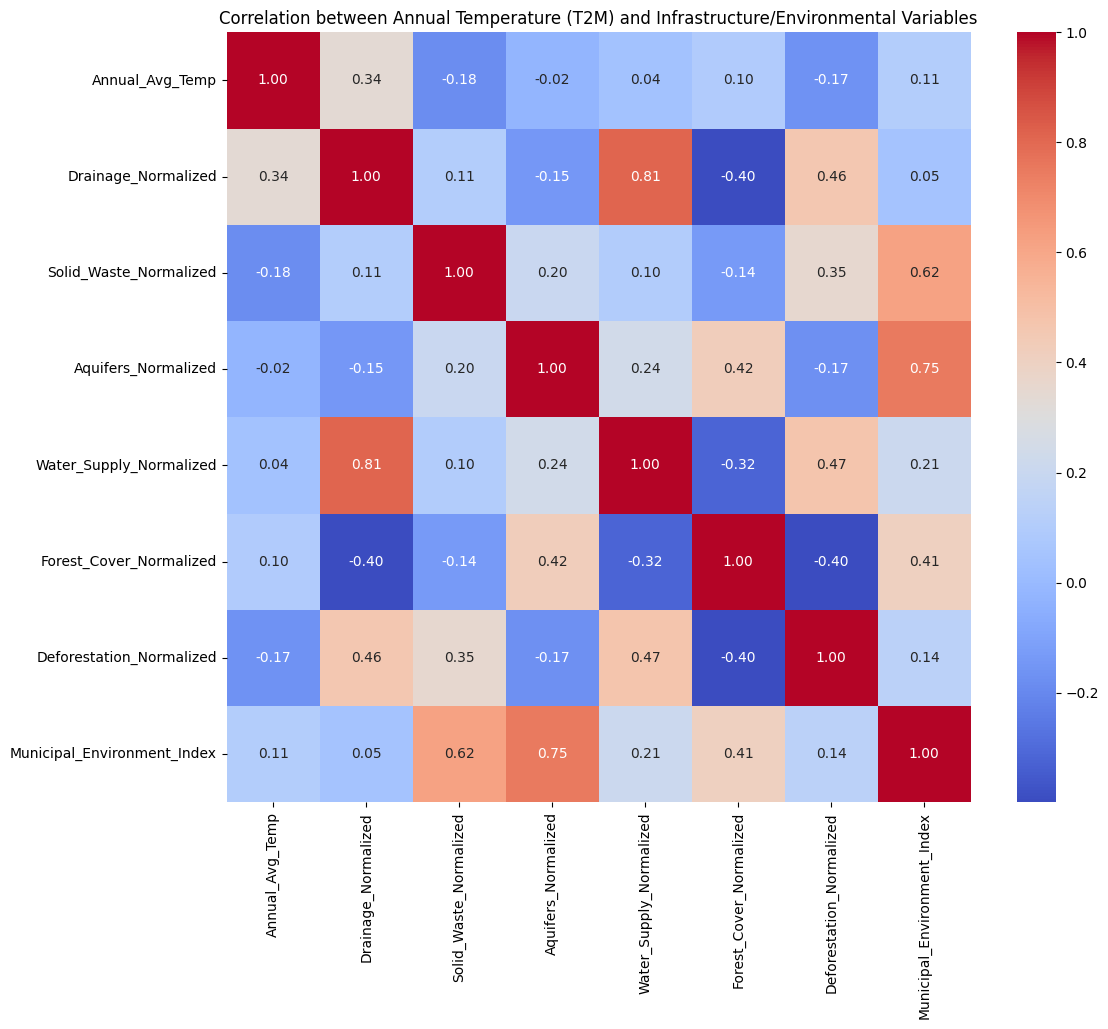

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

# --- STEP 1: Prepare the DataFrames ---
# Make sure the 'df' (climate) and 'df_jalisco' (environmental) DataFrames are loaded.
# It is assumed you have already run the previous steps to rename 'ccc' to 'Municipality' in df_jalisco.
# df = pd.read_csv('unified_climate_data.csv')
# df_jalisco = pd.read_excel('jalisco.2013.Espaciotemporal.xlsx')

# It's assumed the 'Municipality' column in the climate 'df' is already renamed from the last step.
# If not, run: df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

# --- STEP 2: Define the list of common municipalities ---
common_municipalities = [
    'acatic', 'amatitan', 'ameca', 'arandas', 'atengo', 'atenguillo',
    'atotonilcoelalto', 'atoyac', 'ayotlan', 'ayutla',
    'canadasdeobregon', 'casimirocastillo', 'chapala', 'cocula',
    'colotlan', 'cuautla', 'cuquio', 'degollado', 'ejutla', 'elarenal',
    'elgrullo', 'ellimon', 'elsalto', 'encarnaciondediaz', 'etzatlan',
    'gomezfarias', 'jamay', 'jesusmaria', 'jocotepec', 'juanacatlan',
    'juchitlan', 'labarca', 'lagosdemoreno', 'lahuerta',
    'magdalena', 'mascota', 'mazamitla',
    'mexticacan', 'mezquitic', 'mixtlan', 'ocotlan', 'pihuamo',
    'poncitlan', 'quitupan', 'sandiegodealejandria', 'sangabriel',
    'sanjuandeloslagos', 'sanjuanitodeescobedo', 'sanjulian',
    'sanmarcos', 'sayula', 'tala', 'talpadeallende',
    'tamazuladegordiano', 'tapalpa', 'tecalitlan', 'tecolotlan',
    'tenamaxtlan', 'teocaltiche', 'tequila', 'teuchitlan', 'toliman',
    'tomatlan', 'tonala', 'tonaya', 'tonila', 'totatiche', 'tototlan',
    'tuxcacuesco', 'tuxcueca', 'tuxpan', 'uniondesanantonio',
    'uniondetula', 'valledeguadalupe', 'valledejuarez', 'villacorona',
    'villaguerrero', 'villahidalgo', 'villapurificacion', 'zapotiltic',
    'zapotlanejo', 'zapotlanelgrande', 'zapotlanrey'
]

# --- STEP 3: Filter the climate data for the year 2013 ---
# Filter first by municipality, then by year.
# Ensure 'Municipality' column exists in df
if 'Municipio' in df.columns and 'Municipality' not in df.columns:
    df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

df_climate_municipalities = df[df['Municipality'].isin(common_municipalities)]
df_2013_final = df_climate_municipalities[df_climate_municipalities['year'] == 2013]


# --- STEP 4: Standardize the Jalisco DataFrame ---
# Convert the 'Municipality' column to lowercase and remove leading/trailing spaces to ensure a clean merge.
df_jalisco['Municipality'] = df_jalisco['Municipality'].str.lower().str.strip()


# --- STEP 5: Merge the two DataFrames ---
# Create the final table by merging the 2013 climate data with the Jalisco data.
df_complete_2013 = pd.merge(df_2013_final, df_jalisco, on='Municipality', how='left')


# --- STEP 6: Display the merge result ---
pd.set_option('display.max_columns', None)
print("--- MERGE PROCESS COMPLETE ---")
print(f"The final DataFrame has {df_complete_2013.shape[0]} rows and {df_complete_2013.shape[1]} columns.")


# --- STEP 7: Identify columns to remove ---
columns_to_drop = ['c', 'Fuente', 'LUGAR_ESTATAL', 'year']
level_columns_to_drop = [col for col in df_complete_2013.columns if 'Nivel' in col or 'NIVEL' in col]
columns_to_drop.extend(level_columns_to_drop)


# --- STEP 8: Create the new, clean DataFrame ---
df_analysis = df_complete_2013.drop(columns=columns_to_drop)


# --- STEP 9: Verify the cleaning result ---
print("\n--- Clean DataFrame Ready for Analysis ---")
print(f"Removed {len(columns_to_drop)} columns.")


# --- STEP 10: Correlation Analysis ---
# Filter the DataFrame to keep only temperature measurements (T2M)
df_temperature = df_analysis[df_analysis['parameter_x'] == 'T2M'].copy()

# List of columns we are interested in for the correlation
columns_for_correlation = [
    'ann_x',
    'Drenaje_Normalizado',
    'Residuos_Solidos_Normalizado',
    'Acuiferos_Normalizado',
    'Agua_Normalizado',
    'Cobertura_Forestal_Normalizado',
    'Deforestacion_Normalizado',
    'Indice_Municipal_de_Medio_Ambiente'
]

# Select only the relevant columns for the analysis
df_for_analysis = df_temperature[columns_for_correlation]

# --- NEW: Rename columns for the plot ---
english_column_names = {
    'ann_x': 'Annual_Avg_Temp',
    'Drenaje_Normalizado': 'Drainage_Normalized',
    'Residuos_Solidos_Normalizado': 'Solid_Waste_Normalized',
    'Acuiferos_Normalizado': 'Aquifers_Normalized',
    'Agua_Normalizado': 'Water_Supply_Normalized',
    'Cobertura_Forestal_Normalizado': 'Forest_Cover_Normalized',
    'Deforestacion_Normalizado': 'Deforestation_Normalized',
    'Indice_Municipal_de_Medio_Ambiente': 'Municipal_Environment_Index'
}
df_for_analysis.rename(columns=english_column_names, inplace=True)


# Calculate the correlation matrix
correlation_matrix = df_for_analysis.corr()

# --- STEP 11: Visualize the Correlation Matrix ---
# Create the heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Annual Temperature (T2M) and Infrastructure/Environmental Variables')
plt.show()

In [ ]:
# List of columns we are interested in for the correlation
columns_for_correlation = [
    'ann_x',  # Annual average temperature
    'Drenaje_Normalizado',
    'Residuos_Solidos_Normalizado',
    'Acuiferos_Normalizado',
    'Agua_Normalizado',
    'Cobertura_Forestal_Normalizado',
    'Deforestacion_Normalizado',
    'Indice_Municipal_de_Medio_Ambiente'
]

df_for_analysis = df_temperature[columns_for_correlation]

--- MERGE PROCESS COMPLETE ---
The final DataFrame has 31540 rows and 78 columns.

--- Clean DataFrame Ready for Analysis ---
Removed 20 columns.


/tmp/ipython-input-3704445753.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis.rename(columns=english_column_names, inplace=True)


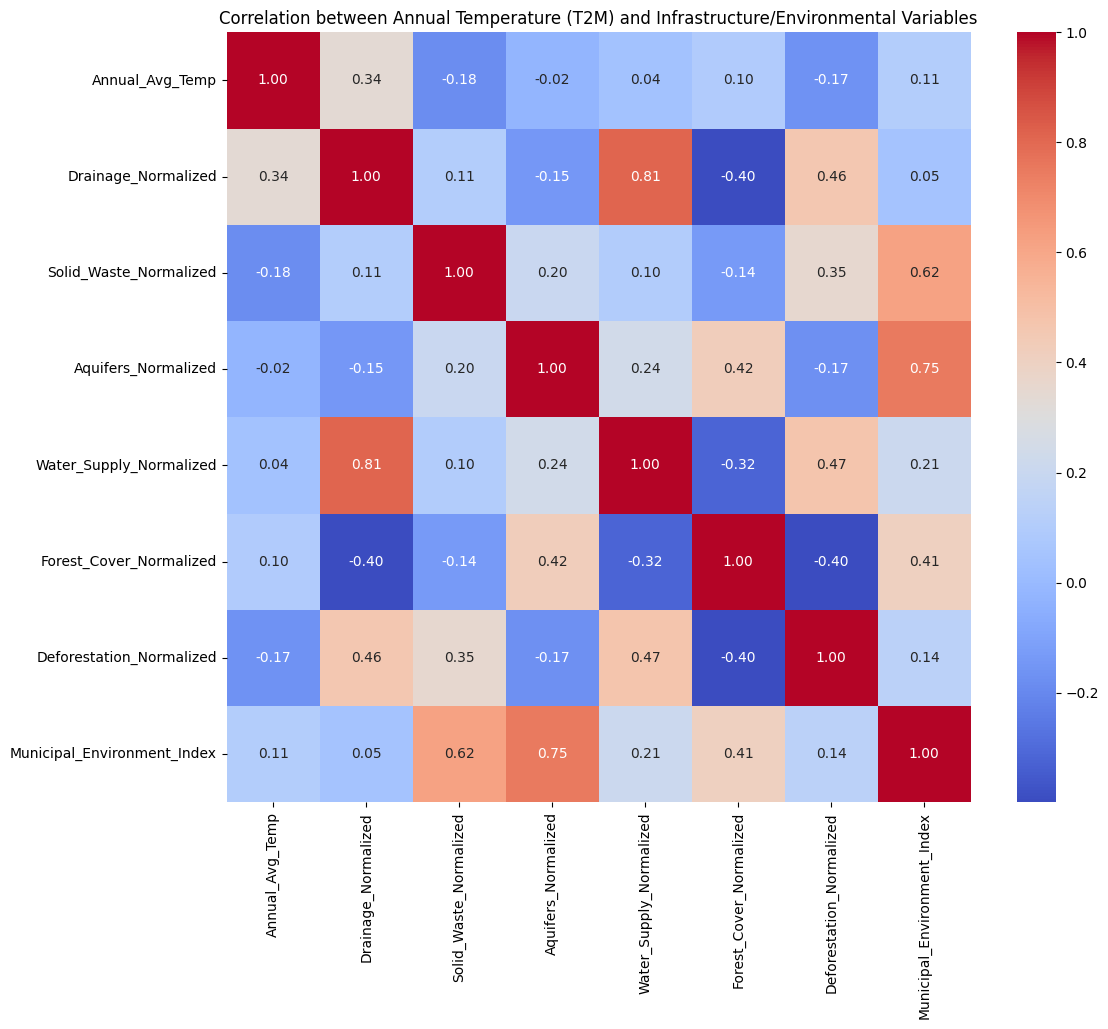


Step 11: Restructuring data for industrial zone analysis...
Data ready. We have 83 municipalities to analyze.

Step 12: Training the model to find relationships...
Model trained.

Step 13: Displaying the most important climatic variables.


/tmp/ipython-input-3704445753.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


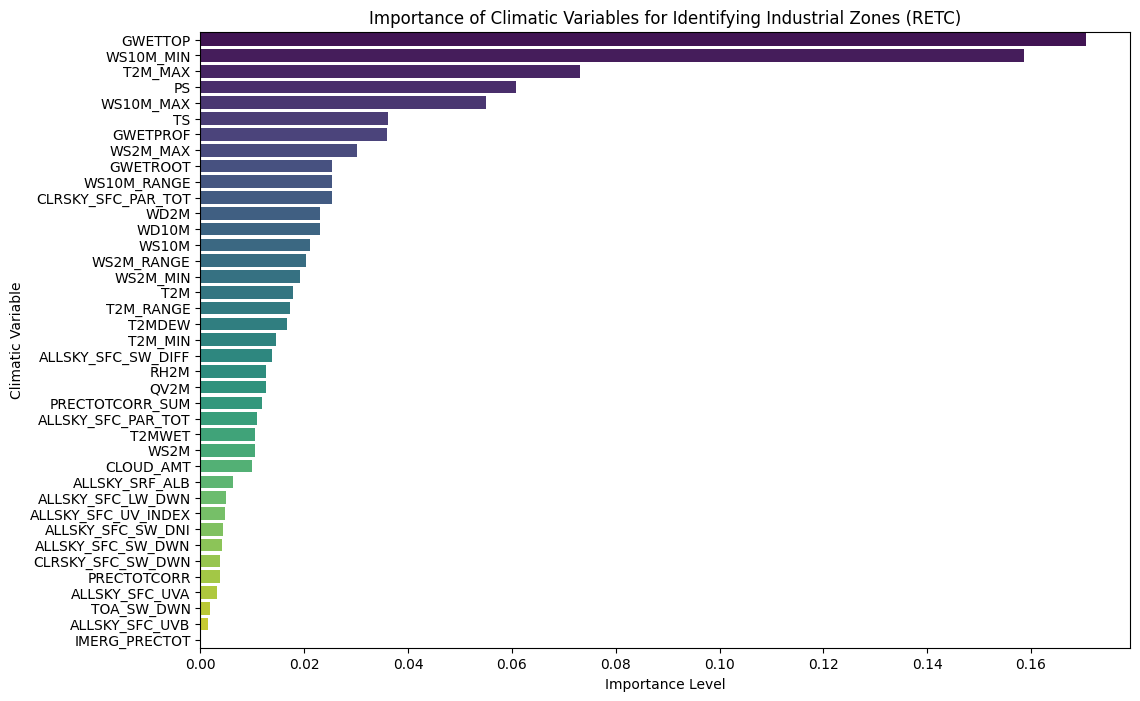


Step 14: Preparing data for heat and vegetation analysis...
Data ready. We have 83 municipalities to analyze.

Step 15: Training the model...
Model trained.

Step 16: Displaying the most important climatic variables.


/tmp/ipython-input-3704445753.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')


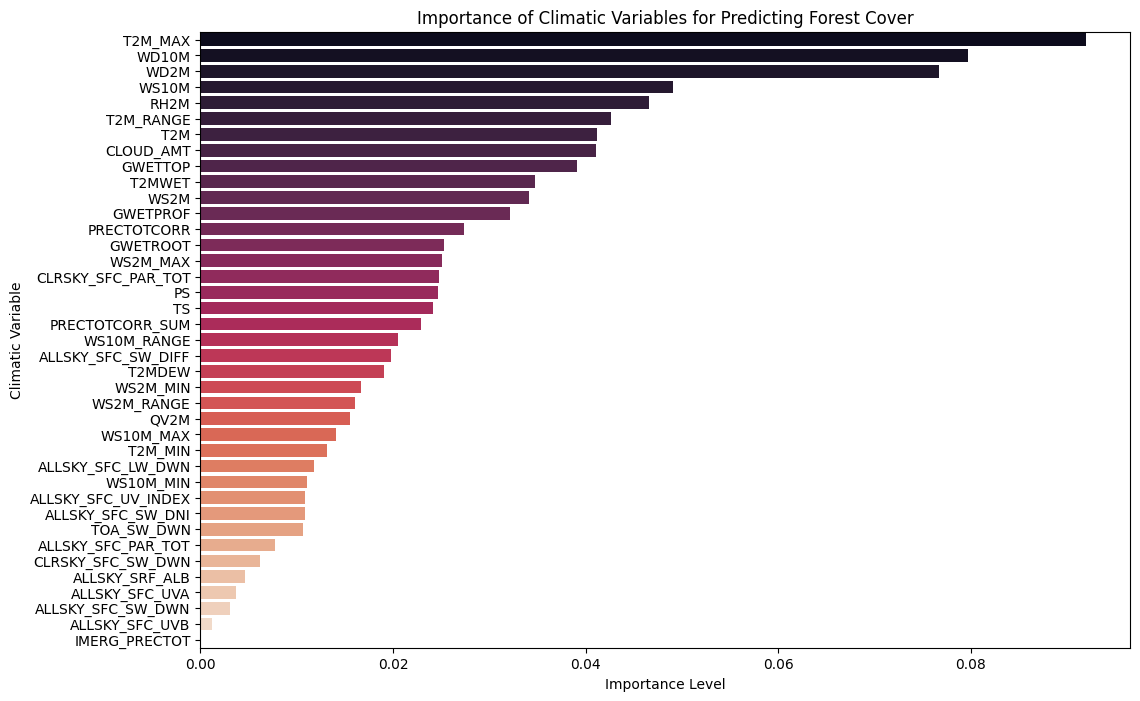

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# --- STEP 1: Prepare the DataFrames ---
# Make sure the 'df' (climate) and 'df_jalisco' (environmental) DataFrames are loaded.
# It is assumed you have already run the previous steps to rename 'ccc' to 'Municipality' in df_jalisco.
# df = pd.read_csv('unified_climate_data.csv')
# df_jalisco = pd.read_excel('jalisco.2013.Espaciotemporal.xlsx')

# It's assumed the 'Municipality' column in the climate 'df' is already renamed from the last step.
# If not, run: df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

# --- STEP 2: Define the list of common municipalities ---
common_municipalities = [
    'acatic', 'amatitan', 'ameca', 'arandas', 'atengo', 'atenguillo',
    'atotonilcoelalto', 'atoyac', 'ayotlan', 'ayutla',
    'canadasdeobregon', 'casimirocastillo', 'chapala', 'cocula',
    'colotlan', 'cuautla', 'cuquio', 'degollado', 'ejutla', 'elarenal',
    'elgrullo', 'ellimon', 'elsalto', 'encarnaciondediaz', 'etzatlan',
    'gomezfarias', 'jamay', 'jesusmaria', 'jocotepec', 'juanacatlan',
    'juchitlan', 'labarca', 'lagosdemoreno', 'lahuerta',
    'magdalena', 'mascota', 'mazamitla',
    'mexticacan', 'mezquitic', 'mixtlan', 'ocotlan', 'pihuamo',
    'poncitlan', 'quitupan', 'sandiegodealejandria', 'sangabriel',
    'sanjuandeloslagos', 'sanjuanitodeescobedo', 'sanjulian',
    'sanmarcos', 'sayula', 'tala', 'talpadeallende',
    'tamazuladegordiano', 'tapalpa', 'tecalitlan', 'tecolotlan',
    'tenamaxtlan', 'teocaltiche', 'tequila', 'teuchitlan', 'toliman',
    'tomatlan', 'tonala', 'tonaya', 'tonila', 'totatiche', 'tototlan',
    'tuxcacuesco', 'tuxcueca', 'tuxpan', 'uniondesanantonio',
    'uniondetula', 'valledeguadalupe', 'valledejuarez', 'villacorona',
    'villaguerrero', 'villahidalgo', 'villapurificacion', 'zapotiltic',
    'zapotlanejo', 'zapotlanelgrande', 'zapotlanrey'
]

# --- STEP 3: Filter the climate data for the year 2013 ---
# Filter first by municipality, then by year.
# Ensure 'Municipality' column exists in df
if 'Municipio' in df.columns and 'Municipality' not in df.columns:
    df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

df_climate_municipalities = df[df['Municipality'].isin(common_municipalities)]
df_2013_final = df_climate_municipalities[df_climate_municipalities['year'] == 2013]


# --- STEP 4: Standardize the Jalisco DataFrame ---
# Convert the 'Municipality' column to lowercase and remove leading/trailing spaces to ensure a clean merge.
df_jalisco['Municipality'] = df_jalisco['Municipality'].str.lower().str.strip()


# --- STEP 5: Merge the two DataFrames ---
# Create the final table by merging the 2013 climate data with the Jalisco data.
df_complete_2013 = pd.merge(df_2013_final, df_jalisco, on='Municipality', how='left')


# --- STEP 6: Display the merge result ---
pd.set_option('display.max_columns', None)
print("--- MERGE PROCESS COMPLETE ---")
print(f"The final DataFrame has {df_complete_2013.shape[0]} rows and {df_complete_2013.shape[1]} columns.")


# --- STEP 7: Identify columns to remove ---
columns_to_drop = ['c', 'Fuente', 'LUGAR_ESTATAL', 'year']
level_columns_to_drop = [col for col in df_complete_2013.columns if 'Nivel' in col or 'NIVEL' in col]
columns_to_drop.extend(level_columns_to_drop)


# --- STEP 8: Create the new, clean DataFrame ---
df_analysis = df_complete_2013.drop(columns=columns_to_drop)


# --- STEP 9: Verify the cleaning result ---
print("\n--- Clean DataFrame Ready for Analysis ---")
print(f"Removed {len(columns_to_drop)} columns.")


# --- STEP 10: Correlation Analysis ---
# Filter the DataFrame to keep only temperature measurements (T2M)
df_temperature = df_analysis[df_analysis['parameter_x'] == 'T2M'].copy()

# List of columns we are interested in for the correlation
columns_for_correlation = [
    'ann_x',
    'Drenaje_Normalizado',
    'Residuos_Solidos_Normalizado',
    'Acuiferos_Normalizado',
    'Agua_Normalizado',
    'Cobertura_Forestal_Normalizado',
    'Deforestacion_Normalizado',
    'Indice_Municipal_de_Medio_Ambiente'
]
df_for_analysis = df_temperature[columns_for_correlation]

# --- NEW: Rename columns to English for the plot ---
english_column_names = {
    'ann_x': 'Annual_Avg_Temp',
    'Drenaje_Normalizado': 'Drainage_Normalized',
    'Residuos_Solidos_Normalizado': 'Solid_Waste_Normalized',
    'Acuiferos_Normalizado': 'Aquifers_Normalized',
    'Agua_Normalizado': 'Water_Supply_Normalized',
    'Cobertura_Forestal_Normalizado': 'Forest_Cover_Normalized',
    'Deforestacion_Normalizado': 'Deforestation_Normalized',
    'Indice_Municipal_de_Medio_Ambiente': 'Municipal_Environment_Index'
}
df_for_analysis.rename(columns=english_column_names, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_for_analysis.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Annual Temperature (T2M) and Infrastructure/Environmental Variables')
plt.show()


# --- MODEL 1: Identifying Industrial Zones (RETC) ---

# --- STEP 11: Prepare the Data for the Model ---
print("\nStep 11: Restructuring data for industrial zone analysis...")
# Pivot the table to have municipalities as rows and climate parameters as columns
df_climate_pivot = df_analysis.pivot_table(
    index='Municipality',
    columns='parameter_x',
    values='ann_x'  # Using annual average values
).reset_index()

# Extract the RETC data (one value per municipality) and remove duplicates
df_retc = df_analysis[['Municipality', 'RETC_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the RETC data
df_industrial_model = pd.merge(df_climate_pivot, df_retc, on='Municipality')

# IMPORTANT: Fill any missing values with the mean of their respective column
df_industrial_model_filled = df_industrial_model.fillna(df_industrial_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_industrial_model_filled)} municipalities to analyze.")

# --- STEP 12: Train the Machine Learning Model ---
print("\nStep 12: Training the model to find relationships...")

# 'X' contains the climate features, 'y' is the target variable (RETC)
X = df_industrial_model_filled.drop(columns=['Municipality', 'RETC_Normalizado'])
y = df_industrial_model_filled['RETC_Normalizado']

# Initialize and train the Random Forest Regressor model
rf_industrial = RandomForestRegressor(n_estimators=100, random_state=42)
rf_industrial.fit(X, y)

print("Model trained.")

# --- STEP 13: Visualize Feature Importances ---
print("\nStep 13: Displaying the most important climatic variables.")

# Create a pandas Series to hold the feature importances
feature_importances = pd.Series(rf_industrial.feature_importances_, index=X.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Importance of Climatic Variables for Identifying Industrial Zones (RETC)')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- MODEL 2: Predicting Forest Cover ---

# --- STEP 14: Prepare the Data for the Model ---
print("\nStep 14: Preparing data for heat and vegetation analysis...")

# Extract the Forest Cover data (one value per municipality)
df_forest = df_analysis[['Municipality', 'Cobertura_Forestal_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Forest Cover data
df_heat_model = pd.merge(df_climate_pivot, df_forest, on='Municipality')

# Fill any missing values with the mean of their respective column
df_heat_model_filled = df_heat_model.fillna(df_heat_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_heat_model_filled)} municipalities to analyze.")

# --- STEP 15: Train the Machine Learning Model ---
print("\nStep 15: Training the model...")

# 'X_heat' contains the climate features
X_heat = df_heat_model_filled.drop(columns=['Municipality', 'Cobertura_Forestal_Normalizado'])

# 'y_heat' is the target variable: the level of forest cover
y_heat = df_heat_model_filled['Cobertura_Forestal_Normalizado']

# Initialize and train the model
rf_heat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heat.fit(X_heat, y_heat)

print("Model trained.")

# --- STEP 16: Visualize Feature Importances ---
print("\nStep 16: Displaying the most important climatic variables.")

# Get and sort the importance of each feature
importances_heat = pd.Series(rf_heat.feature_importances_, index=X_heat.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')
plt.title('Importance of Climatic Variables for Predicting Forest Cover')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


Predicting Aquifer Status with Machine Learning
This code prepares data and trains a machine learning model to understand which climatic factors most impact the health of municipal aquifers. First, it isolates the target variable, Acuiferos_Normalizado (the normalized status of aquifers), and merges it with a pre-pivoted DataFrame containing the annual average values for numerous climate variables for each municipality. This creates a clean dataset where each row represents a single municipality's complete climate profile and its corresponding aquifer status. Any missing data points are filled with the column's mean value to ensure the dataset is complete and ready for training.

The script then uses a RandomForestRegressor, a powerful ensemble learning model, to find the relationship between the climate features and the aquifer status. The model is trained on this data using the .fit() method. The primary goal here is not just prediction, but interpretation. After training, the code extracts the feature_importances_ attribute from the model. This attribute quantifies how much each climate variable contributed to the model's predictions. The final step is to visualize these importances in a sorted bar chart , which clearly ranks the climate factors—like Maximum Temperature (T2M_MAX) and Soil Moisture (GWETTOP)—that are the most significant drivers of water stress and aquifer health.


Step 21: Preparing data for water stress analysis...
Data ready. We have 83 municipalities to analyze.

Step 22: Training the model...
Model trained.

Step 23: Displaying the most important climatic variables.


/tmp/ipython-input-956580119.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_water, y=importances_water.index, palette='mako')


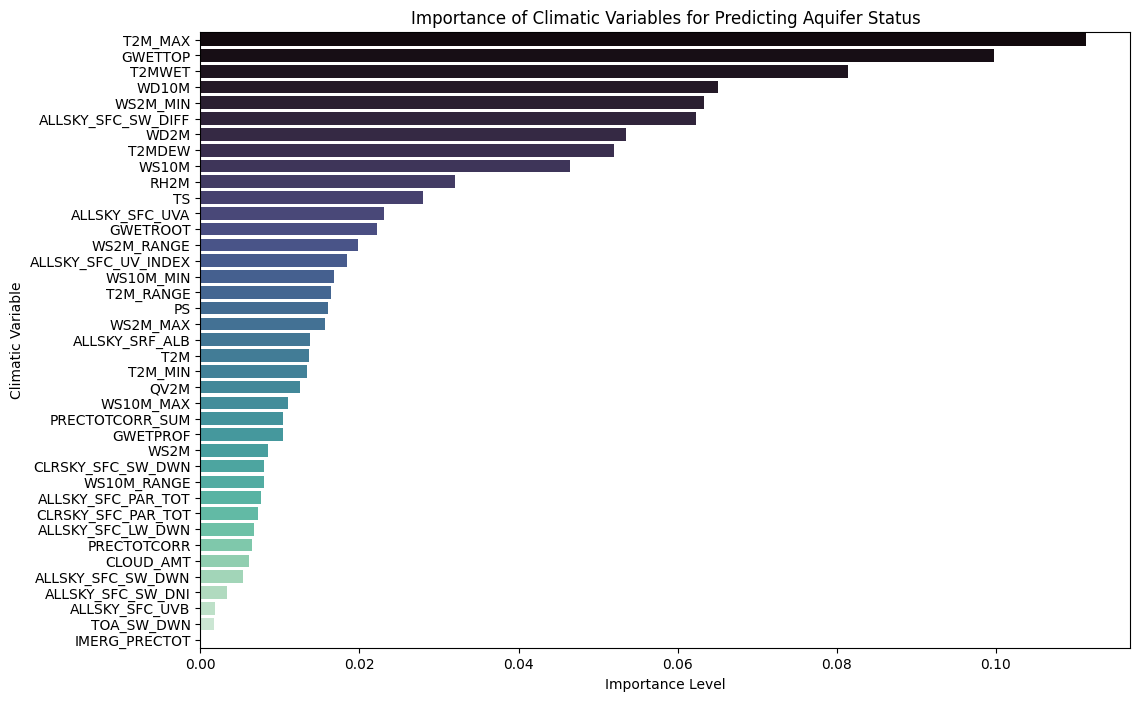

In [ ]:
# --- MODEL 3: Predicting Aquifer Status ---

# --- STEP 21: Prepare the Data for the Model ---
print("\nStep 21: Preparing data for water stress analysis...")

# Extract the Aquifer data (one value per municipality)
df_water = df_analysis[['Municipality', 'Acuiferos_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Aquifer data
df_water_model = pd.merge(df_climate_pivot, df_water, on='Municipality')

# Fill any missing values with the mean of their respective column
df_water_model_filled = df_water_model.fillna(df_water_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_water_model_filled)} municipalities to analyze.")

# --- STEP 22: Train the Machine Learning Model ---
print("\nStep 22: Training the model...")

# 'X_water' contains the climate features
X_water = df_water_model_filled.drop(columns=['Municipality', 'Acuiferos_Normalizado'])

# 'y_water' is the target variable: the state of the aquifers
y_water = df_water_model_filled['Acuiferos_Normalizado']

# Initialize and train the model
rf_water = RandomForestRegressor(n_estimators=100, random_state=42)
rf_water.fit(X_water, y_water)

print("Model trained.")

# --- STEP 23: Visualize Feature Importances ---
print("\nStep 23: Displaying the most important climatic variables.")

# Get and sort the importance of each feature
importances_water = pd.Series(rf_water.feature_importances_, index=X_water.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_water, y=importances_water.index, palette='mako')
plt.title('Importance of Climatic Variables for Predicting Aquifer Status')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()

Data Fusion and Feature Matrix Construction
The initial section of the script (Steps 1-11) is dedicated to data fusion and preprocessing to create a feature matrix suitable for machine learning. It begins by loading and merging two distinct datasets: a high-granularity climate dataset and a socio-environmental dataset for a specific year (2013). A critical data wrangling operation is performed in Step 11 using the .pivot_table() function. This transforms the "long-format" climate data, where each row is a single observation, into a "wide-format" matrix (df_climate_pivot). In this final structure, each row represents a unique sample (a Municipality), and each column represents a distinct feature (the annual average value of a specific climate parameter). This process is analogous to creating a gene expression matrix from raw sequencing data, where disorganized reads are structured into a matrix of samples-by-genes, providing the foundational dataset for all subsequent modeling.

Feature Importance Analysis via Ensemble Learning Models
The core analytical work (Steps 12-16) leverages machine learning not for prediction, but for interpretation. Two separate RandomForestRegressor models are trained on the prepared climate matrix. The first model is trained to predict an industrial activity index (RETC_Normalizado), while the second is trained to predict forest cover (Cobertura_Forestal_Normalizado). The key technical goal is to extract the feature_importances_ attribute from each trained model. This attribute quantifies the contribution of each input climate variable to the model's predictive accuracy, effectively identifying the climatic drivers most strongly associated with each target variable. This process is conceptually similar to a high-throughput screening or a systems biology approach, where the aim is to identify which environmental stimuli (climate variables) have the most significant regulatory effect on a specific phenotype (industrialization or vegetation). The resulting bar plots visualize this "regulatory network" by ranking the climate factors based on their influence.

Composite Index Construction and Vulnerability Scoring
The final section of the script (Steps 17-20) synthesizes the insights from the feature importance analysis to create an actionable, multi-factor metric. It selects the most critical climate variables identified by the preceding models—specifically Maximum Temperature (T2M_MAX), Relative Humidity (RH2M), and Wind Speed (WS10M)—along with the forest cover metric itself. Each of these components is normalized to a uniform [0, 1] scale using MinMaxScaler to ensure they are comparable. A composite Heat_Vulnerability_Index is then calculated using a formula that weights these factors (e.g., using 1 - Cobertura_Forestal_Normalizado because less forest cover signifies higher vulnerability). This methodology is analogous to creating a polygenic risk score, where multiple genetic markers are combined into a single score to quantify an organism's susceptibility to a complex stressor. The resulting ranked list provides a nuanced, data-driven assessment of each municipality's vulnerability to heat and "green deficit."

--- MERGE PROCESS COMPLETE ---
The final DataFrame has 31540 rows and 78 columns.

--- Clean DataFrame Ready for Analysis ---
Removed 20 columns.


/tmp/ipython-input-1406509268.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis.rename(columns=english_column_names, inplace=True)


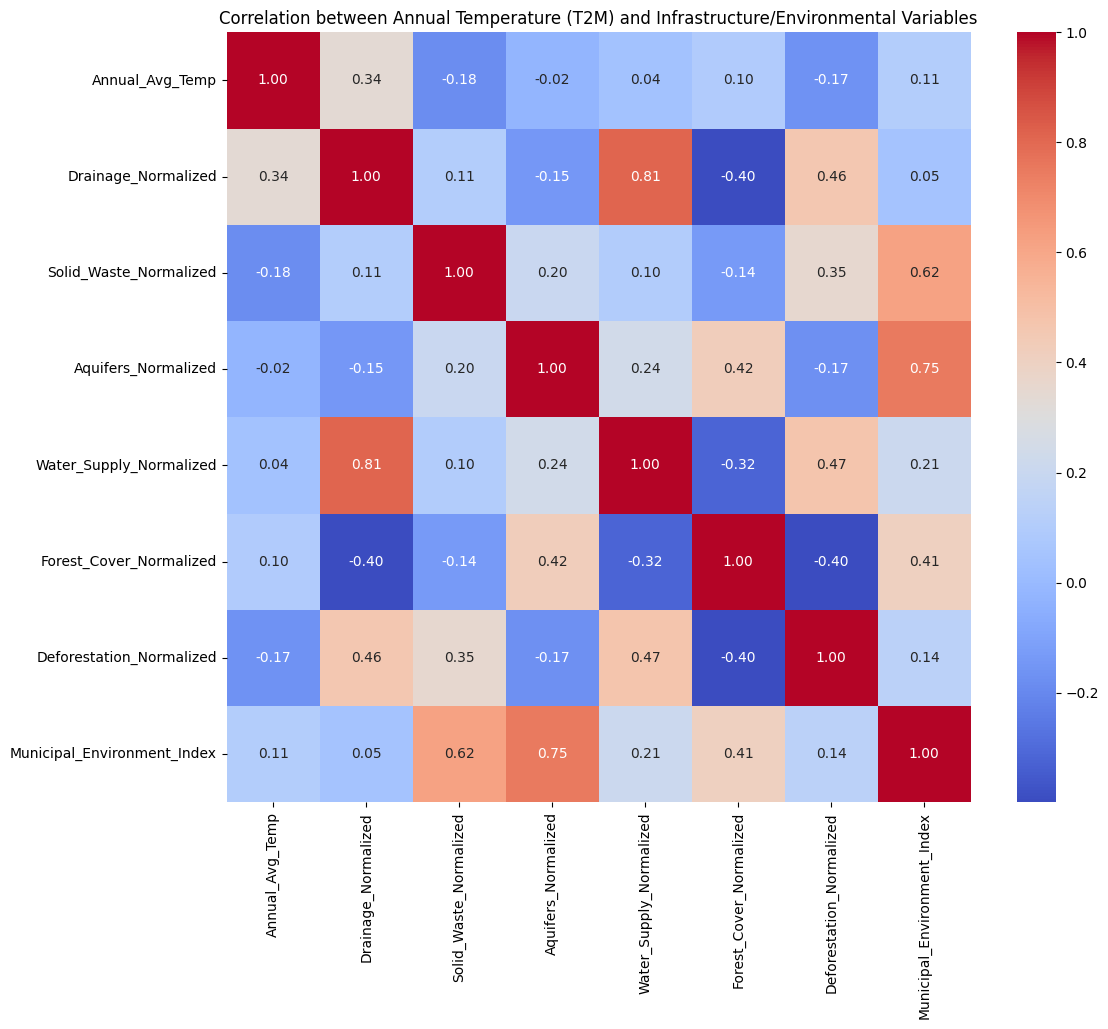


Step 11: Restructuring data for industrial zone analysis...
Data ready. We have 83 municipalities to analyze.

Step 12: Training the model to find relationships...
Model trained.

Step 13: Displaying the most important climatic variables.


/tmp/ipython-input-1406509268.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


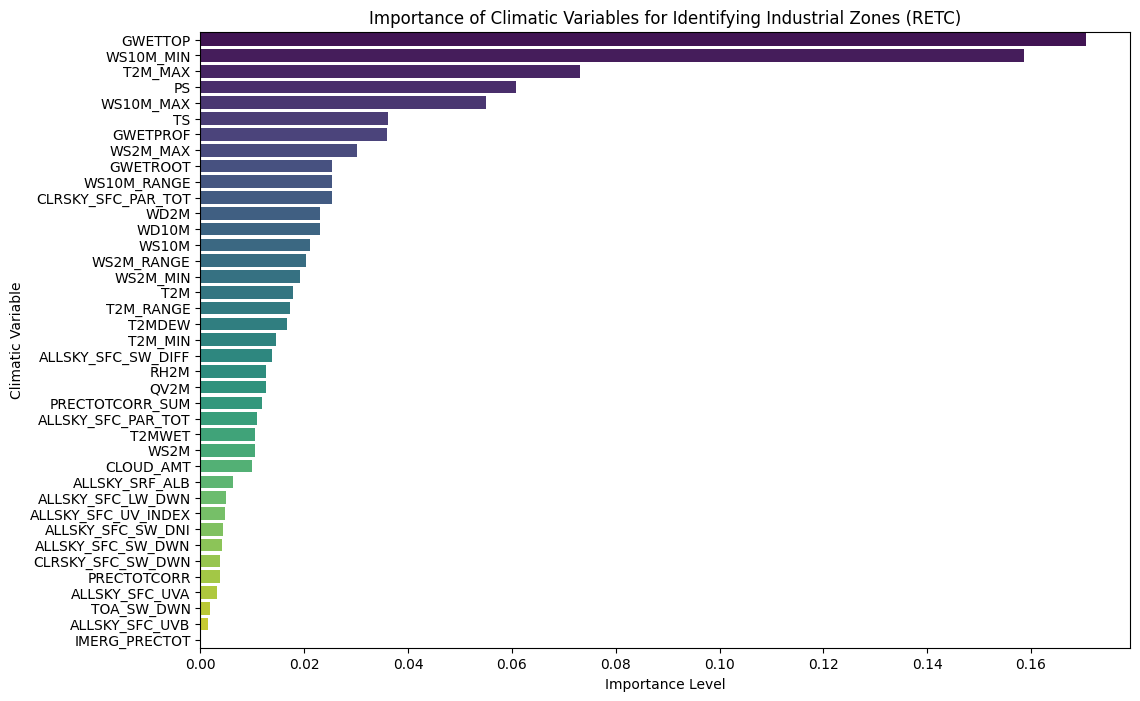


Step 14: Preparing data for heat and vegetation analysis...
Data ready. We have 83 municipalities to analyze.

Step 15: Training the model...
Model trained.

Step 16: Displaying the most important climatic variables.


/tmp/ipython-input-1406509268.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')


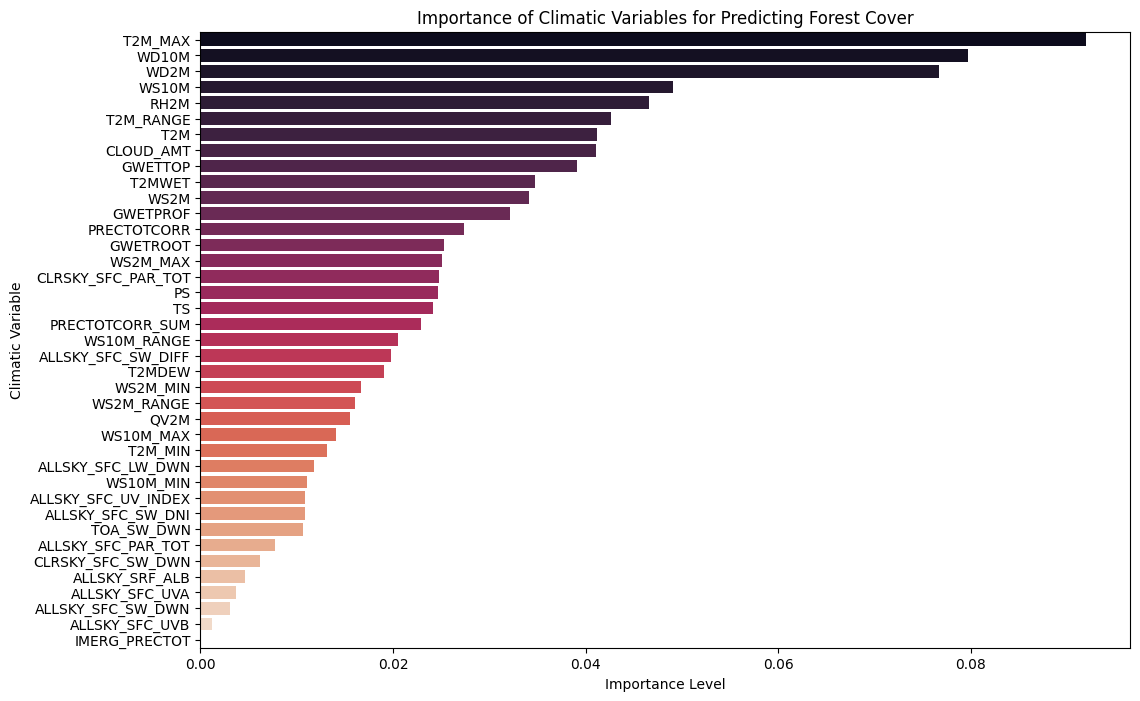


--- Ranking of Municipalities by Heat and 'Green Deficit' Vulnerability ---
A higher score means a greater urgency to create green spaces.
         Municipality  Heat_Vulnerability_Index
32      lagosdemoreno                  3.082556
58        teocaltiche                  2.975709
71  uniondesanantonio                  2.786001
26              jamay                  2.744111
67           tototlan                  2.729014
8             ayotlan                  2.672919
17          degollado                  2.635171
30          juchitlan                  2.594765
16             cuquio                  2.572232
34          magdalena                  2.518204
10   canadasdeobregon                  2.489061
73   valledeguadalupe                  2.489061
60         teuchitlan                  2.461651
1            amatitan                  2.456099
6    atotonilcoelalto                  2.427118


In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# --- STEP 1: Prepare the DataFrames ---
# Make sure the 'df' (climate) and 'df_jalisco' (environmental) DataFrames are loaded.
# It is assumed you have already run the previous steps to rename 'ccc' to 'Municipality' in df_jalisco.
# df = pd.read_csv('unified_climate_data.csv')
# df_jalisco = pd.read_excel('jalisco.2013.Espaciotemporal.xlsx')

# It's assumed the 'Municipality' column in the climate 'df' is already renamed from the last step.
# If not, run: df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

# --- STEP 2: Define the list of common municipalities ---
common_municipalities = [
    'acatic', 'amatitan', 'ameca', 'arandas', 'atengo', 'atenguillo',
    'atotonilcoelalto', 'atoyac', 'ayotlan', 'ayutla',
    'canadasdeobregon', 'casimirocastillo', 'chapala', 'cocula',
    'colotlan', 'cuautla', 'cuquio', 'degollado', 'ejutla', 'elarenal',
    'elgrullo', 'ellimon', 'elsalto', 'encarnaciondediaz', 'etzatlan',
    'gomezfarias', 'jamay', 'jesusmaria', 'jocotepec', 'juanacatlan',
    'juchitlan', 'labarca', 'lagosdemoreno', 'lahuerta',
    'magdalena', 'mascota', 'mazamitla',
    'mexticacan', 'mezquitic', 'mixtlan', 'ocotlan', 'pihuamo',
    'poncitlan', 'quitupan', 'sandiegodealejandria', 'sangabriel',
    'sanjuandeloslagos', 'sanjuanitodeescobedo', 'sanjulian',
    'sanmarcos', 'sayula', 'tala', 'talpadeallende',
    'tamazuladegordiano', 'tapalpa', 'tecalitlan', 'tecolotlan',
    'tenamaxtlan', 'teocaltiche', 'tequila', 'teuchitlan', 'toliman',
    'tomatlan', 'tonala', 'tonaya', 'tonila', 'totatiche', 'tototlan',
    'tuxcacuesco', 'tuxcueca', 'tuxpan', 'uniondesanantonio',
    'uniondetula', 'valledeguadalupe', 'valledejuarez', 'villacorona',
    'villaguerrero', 'villahidalgo', 'villapurificacion', 'zapotiltic',
    'zapotlanejo', 'zapotlanelgrande', 'zapotlanrey'
]

# --- STEP 3: Filter the climate data for the year 2013 ---
# Filter first by municipality, then by year.
# Ensure 'Municipality' column exists in df
if 'Municipio' in df.columns and 'Municipality' not in df.columns:
    df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

df_climate_municipalities = df[df['Municipality'].isin(common_municipalities)]
df_2013_final = df_climate_municipalities[df_climate_municipalities['year'] == 2013]


# --- STEP 4: Standardize the Jalisco DataFrame ---
# Convert the 'Municipality' column to lowercase and remove leading/trailing spaces to ensure a clean merge.
df_jalisco['Municipality'] = df_jalisco['Municipality'].str.lower().str.strip()


# --- STEP 5: Merge the two DataFrames ---
# Create the final table by merging the 2013 climate data with the Jalisco data.
df_complete_2013 = pd.merge(df_2013_final, df_jalisco, on='Municipality', how='left')


# --- STEP 6: Display the merge result ---
pd.set_option('display.max_columns', None)
print("--- MERGE PROCESS COMPLETE ---")
print(f"The final DataFrame has {df_complete_2013.shape[0]} rows and {df_complete_2013.shape[1]} columns.")


# --- STEP 7: Identify columns to remove ---
columns_to_drop = ['c', 'Fuente', 'LUGAR_ESTATAL', 'year']
level_columns_to_drop = [col for col in df_complete_2013.columns if 'Nivel' in col or 'NIVEL' in col]
columns_to_drop.extend(level_columns_to_drop)


# --- STEP 8: Create the new, clean DataFrame ---
df_analysis = df_complete_2013.drop(columns=columns_to_drop)


# --- STEP 9: Verify the cleaning result ---
print("\n--- Clean DataFrame Ready for Analysis ---")
print(f"Removed {len(columns_to_drop)} columns.")


# --- STEP 10: Correlation Analysis ---
# Filter the DataFrame to keep only temperature measurements (T2M)
df_temperature = df_analysis[df_analysis['parameter_x'] == 'T2M'].copy()

# List of columns we are interested in for the correlation
columns_for_correlation = [
    'ann_x',
    'Drenaje_Normalizado',
    'Residuos_Solidos_Normalizado',
    'Acuiferos_Normalizado',
    'Agua_Normalizado',
    'Cobertura_Forestal_Normalizado',
    'Deforestacion_Normalizado',
    'Indice_Municipal_de_Medio_Ambiente'
]
df_for_analysis = df_temperature[columns_for_correlation]

# --- NEW: Rename columns to English for the plot ---
english_column_names = {
    'ann_x': 'Annual_Avg_Temp',
    'Drenaje_Normalizado': 'Drainage_Normalized',
    'Residuos_Solidos_Normalizado': 'Solid_Waste_Normalized',
    'Acuiferos_Normalizado': 'Aquifers_Normalized',
    'Agua_Normalizado': 'Water_Supply_Normalized',
    'Cobertura_Forestal_Normalizado': 'Forest_Cover_Normalized',
    'Deforestacion_Normalizado': 'Deforestation_Normalized',
    'Indice_Municipal_de_Medio_Ambiente': 'Municipal_Environment_Index'
}
df_for_analysis.rename(columns=english_column_names, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_for_analysis.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Annual Temperature (T2M) and Infrastructure/Environmental Variables')
plt.show()


# --- MODEL 1: Identifying Industrial Zones (RETC) ---

# --- STEP 11: Prepare the Data for the Model ---
print("\nStep 11: Restructuring data for industrial zone analysis...")
# Pivot the table to have municipalities as rows and climate parameters as columns
df_climate_pivot = df_analysis.pivot_table(
    index='Municipality',
    columns='parameter_x',
    values='ann_x'  # Using annual average values
).reset_index()

# Extract the RETC data (one value per municipality) and remove duplicates
df_retc = df_analysis[['Municipality', 'RETC_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the RETC data
df_industrial_model = pd.merge(df_climate_pivot, df_retc, on='Municipality')

# IMPORTANT: Fill any missing values with the mean of their respective column
df_industrial_model_filled = df_industrial_model.fillna(df_industrial_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_industrial_model_filled)} municipalities to analyze.")

# --- STEP 12: Train the Machine Learning Model ---
print("\nStep 12: Training the model to find relationships...")

# 'X' contains the climate features, 'y' is the target variable (RETC)
X = df_industrial_model_filled.drop(columns=['Municipality', 'RETC_Normalizado'])
y = df_industrial_model_filled['RETC_Normalizado']

# Initialize and train the Random Forest Regressor model
rf_industrial = RandomForestRegressor(n_estimators=100, random_state=42)
rf_industrial.fit(X, y)

print("Model trained.")

# --- STEP 13: Visualize Feature Importances ---
print("\nStep 13: Displaying the most important climatic variables.")

# Create a pandas Series to hold the feature importances
feature_importances = pd.Series(rf_industrial.feature_importances_, index=X.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Importance of Climatic Variables for Identifying Industrial Zones (RETC)')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- MODEL 2: Predicting Forest Cover ---

# --- STEP 14: Prepare the Data for the Model ---
print("\nStep 14: Preparing data for heat and vegetation analysis...")

# Extract the Forest Cover data (one value per municipality)
df_forest = df_analysis[['Municipality', 'Cobertura_Forestal_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Forest Cover data
df_heat_model = pd.merge(df_climate_pivot, df_forest, on='Municipality')

# Fill any missing values with the mean of their respective column
df_heat_model_filled = df_heat_model.fillna(df_heat_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_heat_model_filled)} municipalities to analyze.")

# --- STEP 15: Train the Machine Learning Model ---
print("\nStep 15: Training the model...")

# 'X_heat' contains the climate features
X_heat = df_heat_model_filled.drop(columns=['Municipality', 'Cobertura_Forestal_Normalizado'])

# 'y_heat' is the target variable: the level of forest cover
y_heat = df_heat_model_filled['Cobertura_Forestal_Normalizado']

# Initialize and train the model
rf_heat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heat.fit(X_heat, y_heat)

print("Model trained.")

# --- STEP 16: Visualize Feature Importances ---
print("\nStep 16: Displaying the most important climatic variables.")

# Get and sort the importance of each feature
importances_heat = pd.Series(rf_heat.feature_importances_, index=X_heat.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')
plt.title('Importance of Climatic Variables for Predicting Forest Cover')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- INDEX 1: Heat Vulnerability Index ---

# --- STEP 17: Select the key columns based on the model's findings ---
# We use .copy() to avoid SettingWithCopyWarning
df_heat_index = df_heat_model_filled[['Municipality', 'Cobertura_Forestal_Normalizado', 'T2M_MAX', 'RH2M', 'WS10M']].copy()

# --- STEP 18: Normalize the variables on a scale from 0 to 1 for combination ---
scaler = MinMaxScaler()
cols_to_scale = ['Cobertura_Forestal_Normalizado', 'T2M_MAX', 'RH2M', 'WS10M']
df_heat_index[cols_to_scale] = scaler.fit_transform(df_heat_index[cols_to_scale])

# --- STEP 19: Apply the index formula ---
# A HIGH score means HIGH VULNERABILITY.
# Therefore, we invert the Forest Cover and Humidity values, as low values for these are worse.
df_heat_index['Heat_Vulnerability_Index'] = (
    (1 - df_heat_index['Cobertura_Forestal_Normalizado']) +  # "Green Deficit" Factor
    df_heat_index['T2M_MAX'] +                              # Heat Factor
    (1 - df_heat_index['RH2M']) +                           # Dry Air Factor
    df_heat_index['WS10M']                                  # Drying Wind Factor
)

# --- STEP 20: Display the ranking of the most vulnerable municipalities ---
df_heat_ranking = df_heat_index[['Municipality', 'Heat_Vulnerability_Index']].sort_values(by='Heat_Vulnerability_Index', ascending=False)

print("\n--- Ranking of Municipalities by Heat and 'Green Deficit' Vulnerability ---")
print("A higher score means a greater urgency to create green spaces.")
print(df_heat_ranking.head(15))

--- MERGE PROCESS COMPLETE ---
The final DataFrame has 31540 rows and 78 columns.

--- Clean DataFrame Ready for Analysis ---
Removed 20 columns.


/tmp/ipython-input-649330385.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis.rename(columns=english_column_names, inplace=True)


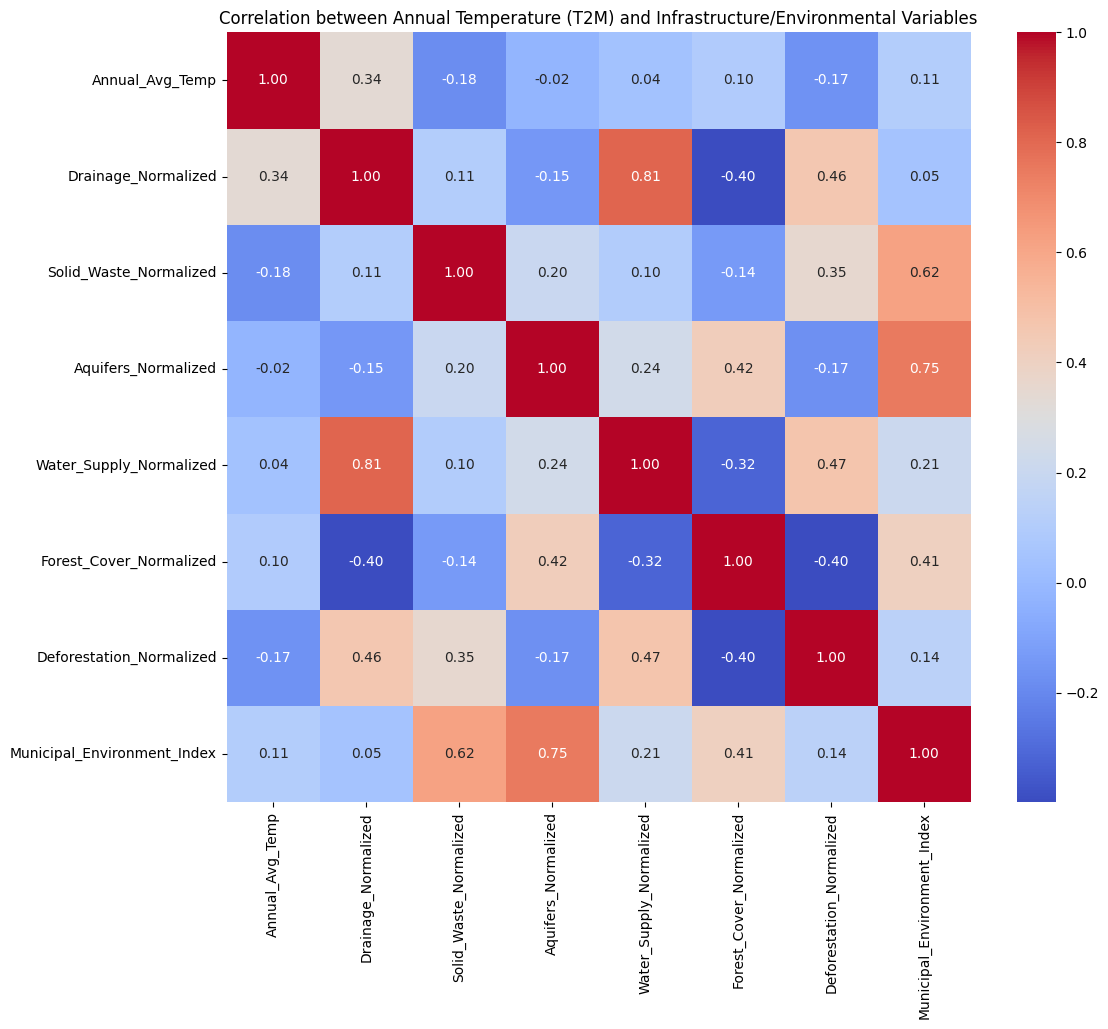


Step 11: Restructuring data for industrial zone analysis...
Data ready. We have 83 municipalities to analyze.

Step 12: Training the model to find relationships...
Model trained.

Step 13: Displaying the most important climatic variables.


/tmp/ipython-input-649330385.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


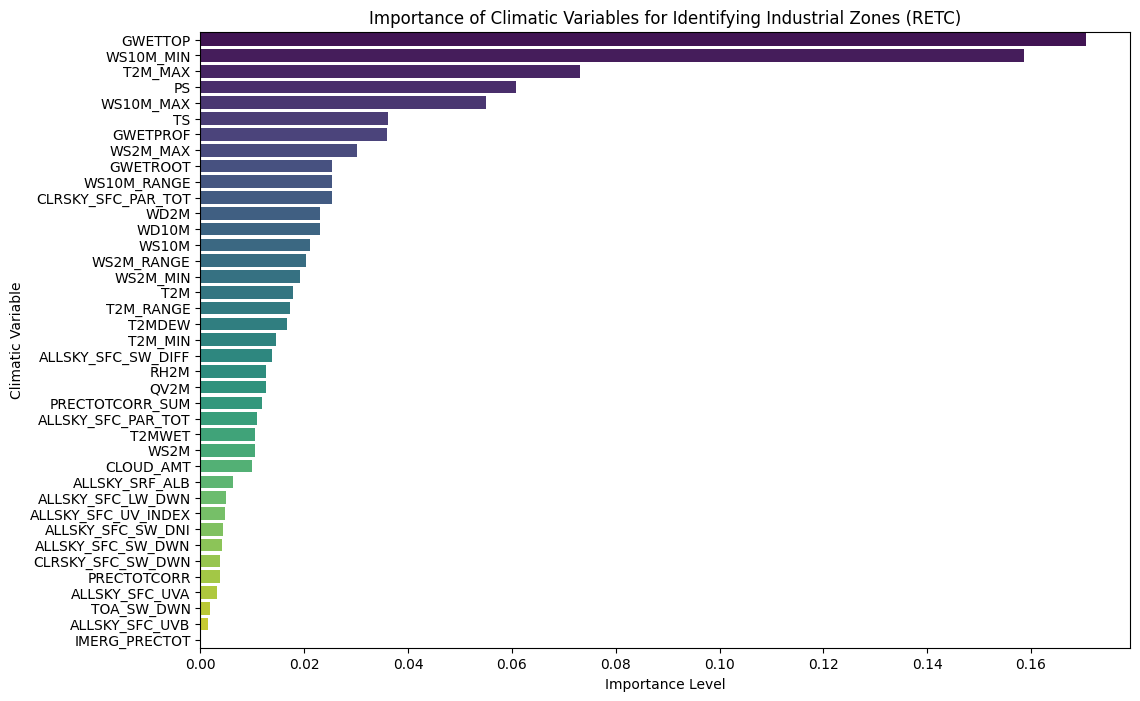


Step 14: Preparing data for heat and vegetation analysis...
Data ready. We have 83 municipalities to analyze.

Step 15: Training the model...
Model trained.

Step 16: Displaying the most important climatic variables.


/tmp/ipython-input-649330385.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')


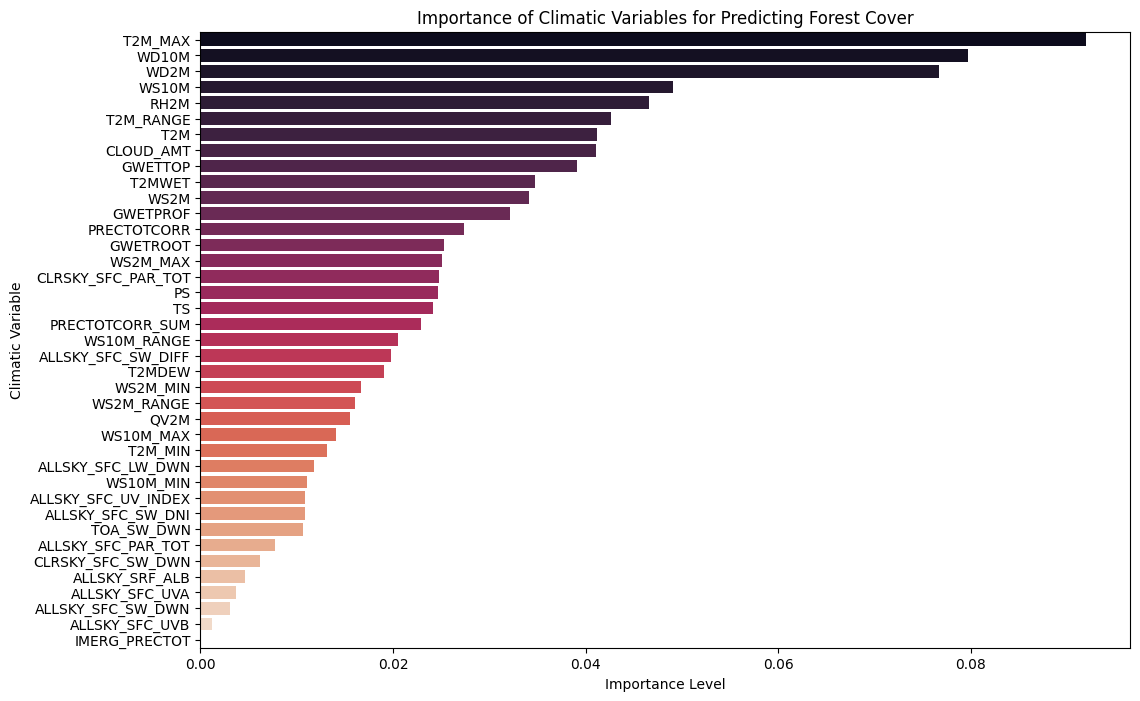


--- Ranking of Municipalities by Heat and 'Green Deficit' Vulnerability ---
A higher score means a greater urgency to create green spaces.
         Municipality  Heat_Vulnerability_Index
32      lagosdemoreno                  3.082556
58        teocaltiche                  2.975709
71  uniondesanantonio                  2.786001
26              jamay                  2.744111
67           tototlan                  2.729014
8             ayotlan                  2.672919
17          degollado                  2.635171
30          juchitlan                  2.594765
16             cuquio                  2.572232
34          magdalena                  2.518204
10   canadasdeobregon                  2.489061
73   valledeguadalupe                  2.489061
60         teuchitlan                  2.461651
1            amatitan                  2.456099
6    atotonilcoelalto                  2.427118

Step 21: Preparing data for water stress analysis...
Data ready. We have 83 municipalities 

/tmp/ipython-input-649330385.py:286: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_water, y=importances_water.index, palette='mako')


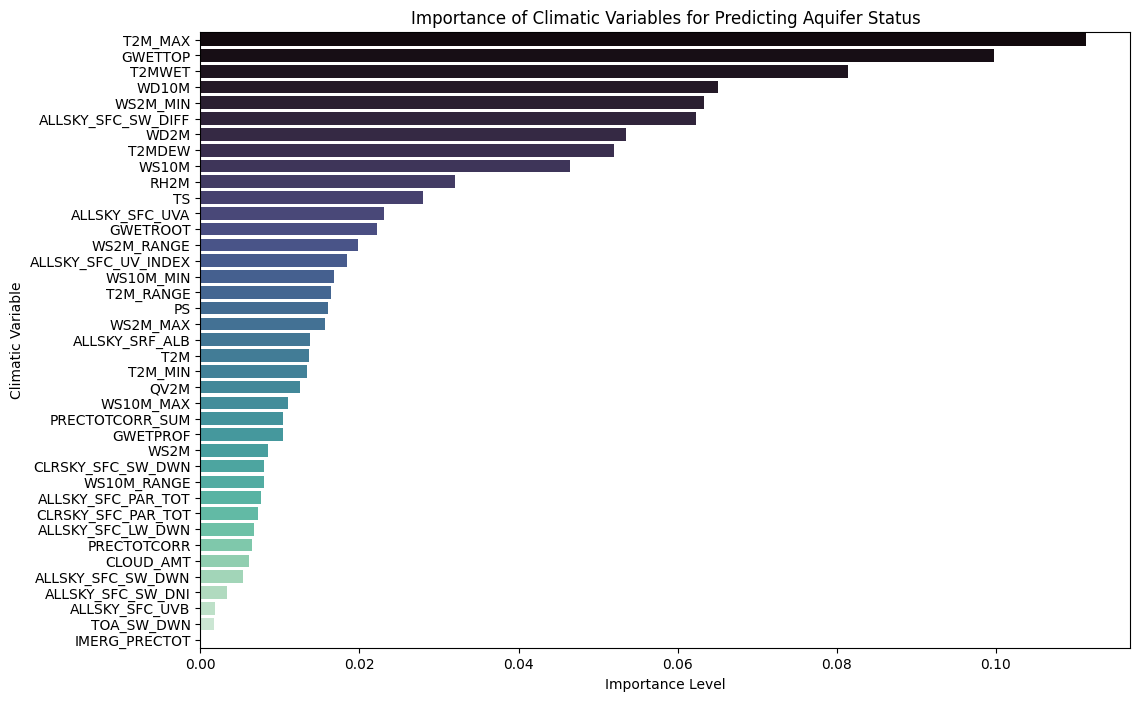

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# --- STEP 1: Prepare the DataFrames ---
# Make sure the 'df' (climate) and 'df_jalisco' (environmental) DataFrames are loaded.
# It is assumed you have already run the previous steps to rename 'ccc' to 'Municipality' in df_jalisco.
# df = pd.read_csv('unified_climate_data.csv')
# df_jalisco = pd.read_excel('jalisco.2013.Espaciotemporal.xlsx')

# It's assumed the 'Municipality' column in the climate 'df' is already renamed from the last step.
# If not, run: df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

# --- STEP 2: Define the list of common municipalities ---
common_municipalities = [
    'acatic', 'amatitan', 'ameca', 'arandas', 'atengo', 'atenguillo',
    'atotonilcoelalto', 'atoyac', 'ayotlan', 'ayutla',
    'canadasdeobregon', 'casimirocastillo', 'chapala', 'cocula',
    'colotlan', 'cuautla', 'cuquio', 'degollado', 'ejutla', 'elarenal',
    'elgrullo', 'ellimon', 'elsalto', 'encarnaciondediaz', 'etzatlan',
    'gomezfarias', 'jamay', 'jesusmaria', 'jocotepec', 'juanacatlan',
    'juchitlan', 'labarca', 'lagosdemoreno', 'lahuerta',
    'magdalena', 'mascota', 'mazamitla',
    'mexticacan', 'mezquitic', 'mixtlan', 'ocotlan', 'pihuamo',
    'poncitlan', 'quitupan', 'sandiegodealejandria', 'sangabriel',
    'sanjuandeloslagos', 'sanjuanitodeescobedo', 'sanjulian',
    'sanmarcos', 'sayula', 'tala', 'talpadeallende',
    'tamazuladegordiano', 'tapalpa', 'tecalitlan', 'tecolotlan',
    'tenamaxtlan', 'teocaltiche', 'tequila', 'teuchitlan', 'toliman',
    'tomatlan', 'tonala', 'tonaya', 'tonila', 'totatiche', 'tototlan',
    'tuxcacuesco', 'tuxcueca', 'tuxpan', 'uniondesanantonio',
    'uniondetula', 'valledeguadalupe', 'valledejuarez', 'villacorona',
    'villaguerrero', 'villahidalgo', 'villapurificacion', 'zapotiltic',
    'zapotlanejo', 'zapotlanelgrande', 'zapotlanrey'
]

# --- STEP 3: Filter the climate data for the year 2013 ---
# Filter first by municipality, then by year.
# Ensure 'Municipality' column exists in df
if 'Municipio' in df.columns and 'Municipality' not in df.columns:
    df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

df_climate_municipalities = df[df['Municipality'].isin(common_municipalities)]
df_2013_final = df_climate_municipalities[df_climate_municipalities['year'] == 2013]


# --- STEP 4: Standardize the Jalisco DataFrame ---
# Convert the 'Municipality' column to lowercase and remove leading/trailing spaces to ensure a clean merge.
df_jalisco['Municipality'] = df_jalisco['Municipality'].str.lower().str.strip()


# --- STEP 5: Merge the two DataFrames ---
# Create the final table by merging the 2013 climate data with the Jalisco data.
df_complete_2013 = pd.merge(df_2013_final, df_jalisco, on='Municipality', how='left')


# --- STEP 6: Display the merge result ---
pd.set_option('display.max_columns', None)
print("--- MERGE PROCESS COMPLETE ---")
print(f"The final DataFrame has {df_complete_2013.shape[0]} rows and {df_complete_2013.shape[1]} columns.")


# --- STEP 7: Identify columns to remove ---
columns_to_drop = ['c', 'Fuente', 'LUGAR_ESTATAL', 'year']
level_columns_to_drop = [col for col in df_complete_2013.columns if 'Nivel' in col or 'NIVEL' in col]
columns_to_drop.extend(level_columns_to_drop)


# --- STEP 8: Create the new, clean DataFrame ---
df_analysis = df_complete_2013.drop(columns=columns_to_drop)


# --- STEP 9: Verify the cleaning result ---
print("\n--- Clean DataFrame Ready for Analysis ---")
print(f"Removed {len(columns_to_drop)} columns.")


# --- STEP 10: Correlation Analysis ---
# Filter the DataFrame to keep only temperature measurements (T2M)
df_temperature = df_analysis[df_analysis['parameter_x'] == 'T2M'].copy()

# List of columns we are interested in for the correlation
columns_for_correlation = [
    'ann_x',
    'Drenaje_Normalizado',
    'Residuos_Solidos_Normalizado',
    'Acuiferos_Normalizado',
    'Agua_Normalizado',
    'Cobertura_Forestal_Normalizado',
    'Deforestacion_Normalizado',
    'Indice_Municipal_de_Medio_Ambiente'
]
df_for_analysis = df_temperature[columns_for_correlation]

# --- NEW: Rename columns to English for the plot ---
english_column_names = {
    'ann_x': 'Annual_Avg_Temp',
    'Drenaje_Normalizado': 'Drainage_Normalized',
    'Residuos_Solidos_Normalizado': 'Solid_Waste_Normalized',
    'Acuiferos_Normalizado': 'Aquifers_Normalized',
    'Agua_Normalizado': 'Water_Supply_Normalized',
    'Cobertura_Forestal_Normalizado': 'Forest_Cover_Normalized',
    'Deforestacion_Normalizado': 'Deforestation_Normalized',
    'Indice_Municipal_de_Medio_Ambiente': 'Municipal_Environment_Index'
}
df_for_analysis.rename(columns=english_column_names, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_for_analysis.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Annual Temperature (T2M) and Infrastructure/Environmental Variables')
plt.show()


# --- MODEL 1: Identifying Industrial Zones (RETC) ---

# --- STEP 11: Prepare the Data for the Model ---
print("\nStep 11: Restructuring data for industrial zone analysis...")
# Pivot the table to have municipalities as rows and climate parameters as columns
df_climate_pivot = df_analysis.pivot_table(
    index='Municipality',
    columns='parameter_x',
    values='ann_x'  # Using annual average values
).reset_index()

# Extract the RETC data (one value per municipality) and remove duplicates
df_retc = df_analysis[['Municipality', 'RETC_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the RETC data
df_industrial_model = pd.merge(df_climate_pivot, df_retc, on='Municipality')

# IMPORTANT: Fill any missing values with the mean of their respective column
df_industrial_model_filled = df_industrial_model.fillna(df_industrial_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_industrial_model_filled)} municipalities to analyze.")

# --- STEP 12: Train the Machine Learning Model ---
print("\nStep 12: Training the model to find relationships...")

# 'X' contains the climate features, 'y' is the target variable (RETC)
X = df_industrial_model_filled.drop(columns=['Municipality', 'RETC_Normalizado'])
y = df_industrial_model_filled['RETC_Normalizado']

# Initialize and train the Random Forest Regressor model
rf_industrial = RandomForestRegressor(n_estimators=100, random_state=42)
rf_industrial.fit(X, y)

print("Model trained.")

# --- STEP 13: Visualize Feature Importances ---
print("\nStep 13: Displaying the most important climatic variables.")

# Create a pandas Series to hold the feature importances
feature_importances = pd.Series(rf_industrial.feature_importances_, index=X.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Importance of Climatic Variables for Identifying Industrial Zones (RETC)')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- MODEL 2: Predicting Forest Cover ---

# --- STEP 14: Prepare the Data for the Model ---
print("\nStep 14: Preparing data for heat and vegetation analysis...")

# Extract the Forest Cover data (one value per municipality)
df_forest = df_analysis[['Municipality', 'Cobertura_Forestal_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Forest Cover data
df_heat_model = pd.merge(df_climate_pivot, df_forest, on='Municipality')

# Fill any missing values with the mean of their respective column
df_heat_model_filled = df_heat_model.fillna(df_heat_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_heat_model_filled)} municipalities to analyze.")

# --- STEP 15: Train the Machine Learning Model ---
print("\nStep 15: Training the model...")

# 'X_heat' contains the climate features
X_heat = df_heat_model_filled.drop(columns=['Municipality', 'Cobertura_Forestal_Normalizado'])

# 'y_heat' is the target variable: the level of forest cover
y_heat = df_heat_model_filled['Cobertura_Forestal_Normalizado']

# Initialize and train the model
rf_heat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heat.fit(X_heat, y_heat)

print("Model trained.")

# --- STEP 16: Visualize Feature Importances ---
print("\nStep 16: Displaying the most important climatic variables.")

# Get and sort the importance of each feature
importances_heat = pd.Series(rf_heat.feature_importances_, index=X_heat.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')
plt.title('Importance of Climatic Variables for Predicting Forest Cover')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- INDEX 1: Heat Vulnerability Index ---

# --- STEP 17: Select the key columns based on the model's findings ---
# We use .copy() to avoid SettingWithCopyWarning
df_heat_index = df_heat_model_filled[['Municipality', 'Cobertura_Forestal_Normalizado', 'T2M_MAX', 'RH2M', 'WS10M']].copy()

# --- STEP 18: Normalize the variables on a scale from 0 to 1 for combination ---
scaler = MinMaxScaler()
cols_to_scale = ['Cobertura_Forestal_Normalizado', 'T2M_MAX', 'RH2M', 'WS10M']
df_heat_index[cols_to_scale] = scaler.fit_transform(df_heat_index[cols_to_scale])

# --- STEP 19: Apply the index formula ---
# A HIGH score means HIGH VULNERABILITY.
# Therefore, we invert the Forest Cover and Humidity values, as low values for these are worse.
df_heat_index['Heat_Vulnerability_Index'] = (
    (1 - df_heat_index['Cobertura_Forestal_Normalizado']) +  # "Green Deficit" Factor
    df_heat_index['T2M_MAX'] +                              # Heat Factor
    (1 - df_heat_index['RH2M']) +                           # Dry Air Factor
    df_heat_index['WS10M']                                  # Drying Wind Factor
)

# --- STEP 20: Display the ranking of the most vulnerable municipalities ---
df_heat_ranking = df_heat_index[['Municipality', 'Heat_Vulnerability_Index']].sort_values(by='Heat_Vulnerability_Index', ascending=False)

print("\n--- Ranking of Municipalities by Heat and 'Green Deficit' Vulnerability ---")
print("A higher score means a greater urgency to create green spaces.")
print(df_heat_ranking.head(15))


# --- MODEL 3: Predicting Aquifer Status ---

# --- STEP 21: Prepare the Data for the Model ---
print("\nStep 21: Preparing data for water stress analysis...")

# Extract the Aquifer data (one value per municipality)
df_water = df_analysis[['Municipality', 'Acuiferos_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Aquifer data
df_water_model = pd.merge(df_climate_pivot, df_water, on='Municipality')

# Fill any missing values with the mean of their respective column
df_water_model_filled = df_water_model.fillna(df_water_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_water_model_filled)} municipalities to analyze.")


# --- STEP 22: Train the Machine Learning Model ---
print("\nStep 22: Training the model...")

# 'X_water' contains the climate features
X_water = df_water_model_filled.drop(columns=['Municipality', 'Acuiferos_Normalizado'])

# 'y_water' is the target variable: the state of the aquifers
y_water = df_water_model_filled['Acuiferos_Normalizado']

# Create and train the model
rf_water = RandomForestRegressor(n_estimators=100, random_state=42)
rf_water.fit(X_water, y_water)
print("Model trained.")


# --- STEP 23: Visualize the Importance of Variables ---
print("\nStep 23: Displaying the most important climatic variables.")

# Get and sort the importance of each variable
importances_water = pd.Series(rf_water.feature_importances_, index=X_water.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_water, y=importances_water.index, palette='mako')
plt.title('Importance of Climatic Variables for Predicting Aquifer Status')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()

Data Fusion and Feature Matrix Construction
The initial section of the script (Steps 1-11) is dedicated to data fusion and preprocessing to create a feature matrix suitable for machine learning. It begins by loading and merging two distinct datasets: a high-granularity climate dataset and a socio-environmental dataset for a specific year (2013). A critical data wrangling operation is performed in Step 11 using the .pivot_table() function. This transforms the "long-format" climate data, where each row is a single observation, into a "wide-format" matrix (df_climate_pivot). In this final structure, each row represents a unique sample (a Municipality), and each column represents a distinct feature (the annual average value of a specific climate parameter). This process is analogous to creating a gene expression matrix from raw sequencing data, where disorganized reads are structured into a matrix of samples-by-genes, providing the foundational dataset for all subsequent modeling.

Feature Importance Analysis via Ensemble Learning Models
The core analytical work (Steps 12-16) leverages machine learning not for prediction, but for interpretation. Two separate RandomForestRegressor models are trained on the prepared climate matrix. The first model is trained to predict an industrial activity index (RETC_Normalizado), while the second is trained to predict forest cover (Cobertura_Forestal_Normalizado). The key technical goal is to extract the feature_importances_ attribute from each trained model. This attribute quantifies the contribution of each input climate variable to the model's predictive accuracy, effectively identifying the climatic drivers most strongly associated with each target variable. This process is conceptually similar to a high-throughput screening or a systems biology approach, where the aim is to identify which environmental stimuli (climate variables) have the most significant regulatory effect on a specific phenotype (industrialization or vegetation). The resulting bar plots visualize this "regulatory network" by ranking the climate factors based on their influence.

Composite Index Construction and Vulnerability Scoring
The final section of the script (Steps 17-20) synthesizes the insights from the feature importance analysis to create an actionable, multi-factor metric. It selects the most critical climate variables identified by the preceding models—specifically Maximum Temperature (T2M_MAX), Relative Humidity (RH2M), and Wind Speed (WS10M)—along with the forest cover metric itself. Each of these components is normalized to a uniform [0, 1] scale using MinMaxScaler to ensure they are comparable. A composite Heat_Vulnerability_Index is then calculated using a formula that weights these factors (e.g., using 1 - Cobertura_Forestal_Normalizado because less forest cover signifies higher vulnerability). This methodology is analogous to creating a polygenic risk score, where multiple genetic markers are combined into a single score to quantify an organism's susceptibility to a complex stressor. The resulting ranked list provides a nuanced, data-driven assessment of each municipality's vulnerability to heat and "green deficit."

--- MERGE PROCESS COMPLETE ---
The final DataFrame has 31540 rows and 78 columns.

--- Clean DataFrame Ready for Analysis ---
Removed 20 columns.


/tmp/ipython-input-3062251997.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis.rename(columns=english_column_names, inplace=True)


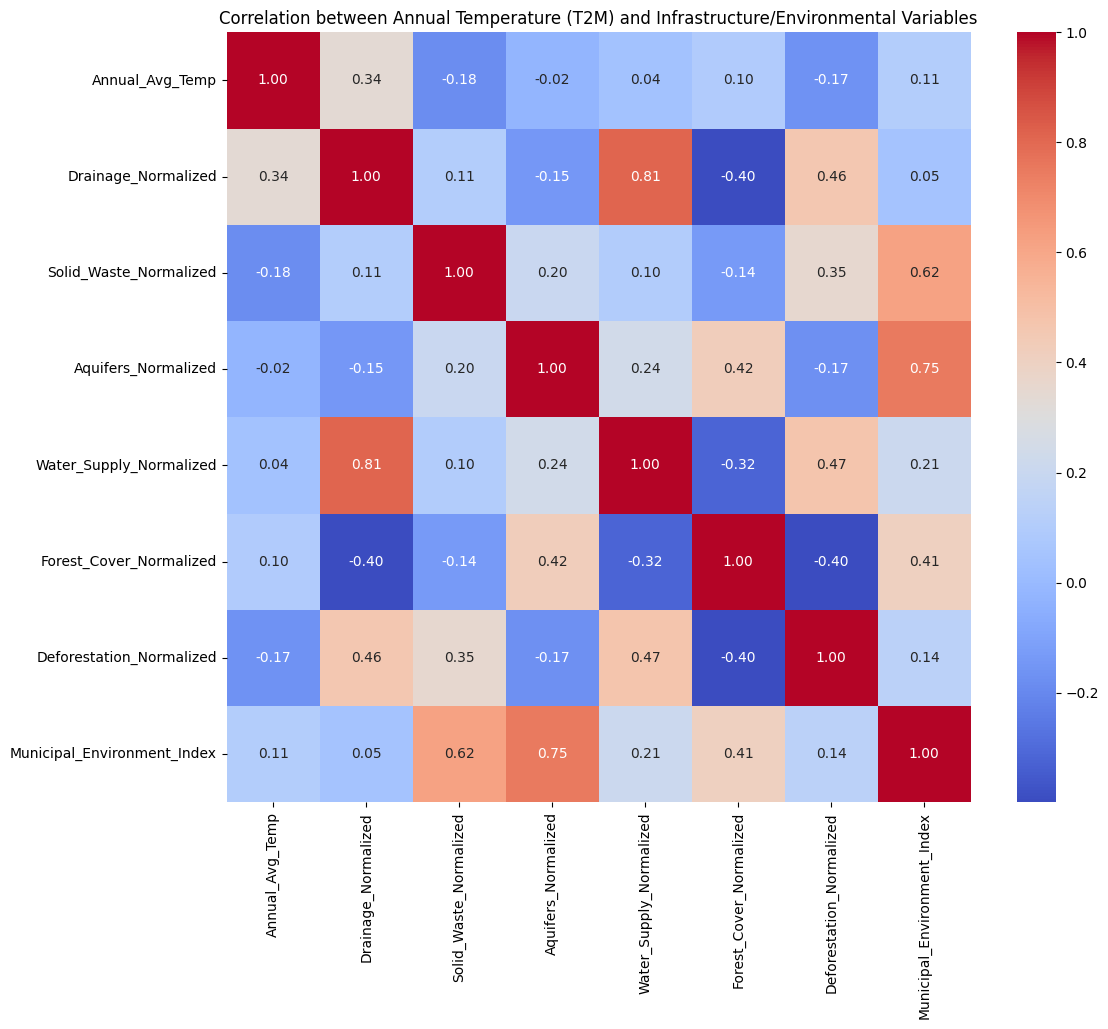


Step 11: Restructuring data for industrial zone analysis...
Data ready. We have 83 municipalities to analyze.

Step 12: Training the model to find relationships...
Model trained.

Step 13: Displaying the most important climatic variables.


/tmp/ipython-input-3062251997.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


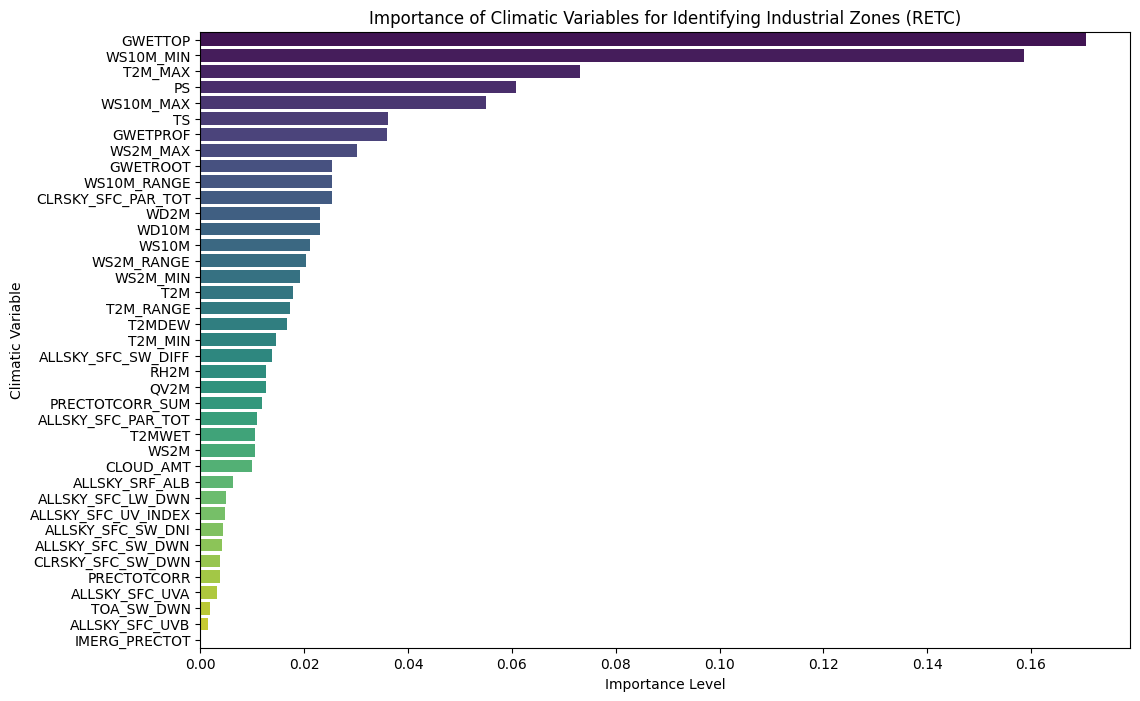


Step 14: Preparing data for heat and vegetation analysis...
Data ready. We have 83 municipalities to analyze.

Step 15: Training the model...
Model trained.

Step 16: Displaying the most important climatic variables.


/tmp/ipython-input-3062251997.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')


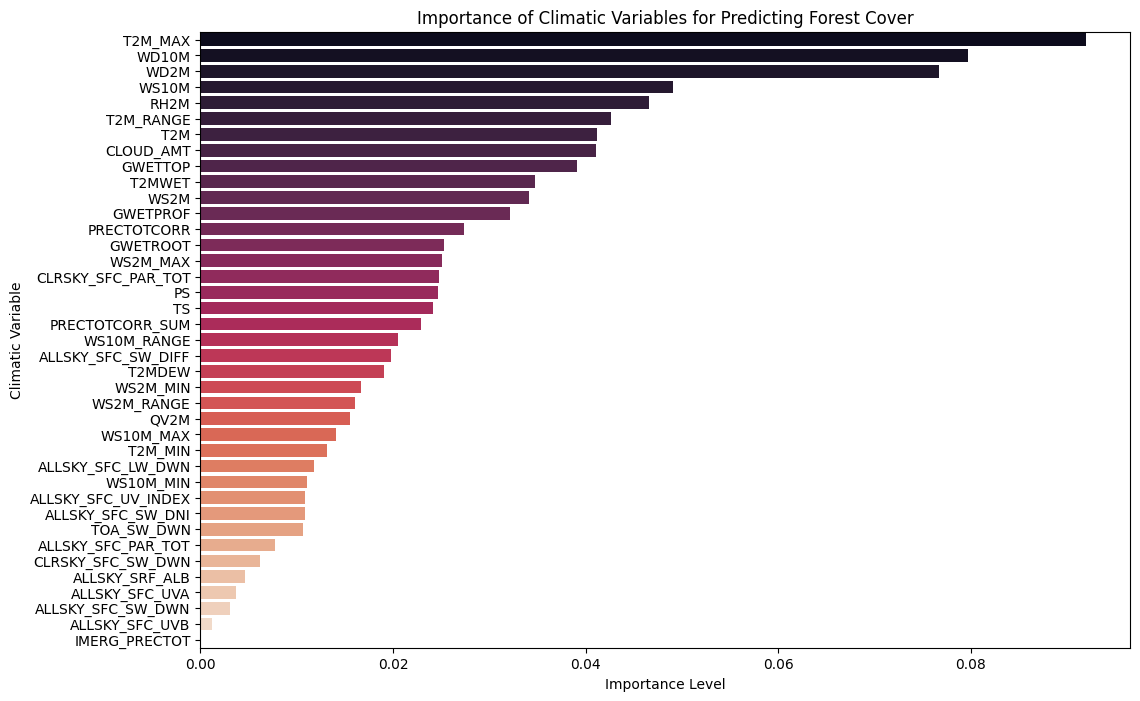


--- Ranking of Municipalities by Heat and 'Green Deficit' Vulnerability ---
A higher score means a greater urgency to create green spaces.
         Municipality  Heat_Vulnerability_Index
32      lagosdemoreno                  3.082556
58        teocaltiche                  2.975709
71  uniondesanantonio                  2.786001
26              jamay                  2.744111
67           tototlan                  2.729014
8             ayotlan                  2.672919
17          degollado                  2.635171
30          juchitlan                  2.594765
16             cuquio                  2.572232
34          magdalena                  2.518204
10   canadasdeobregon                  2.489061
73   valledeguadalupe                  2.489061
60         teuchitlan                  2.461651
1            amatitan                  2.456099
6    atotonilcoelalto                  2.427118

Step 21: Preparing data for water stress analysis...
Data ready. We have 83 municipalities 

/tmp/ipython-input-3062251997.py:286: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_water, y=importances_water.index, palette='mako')


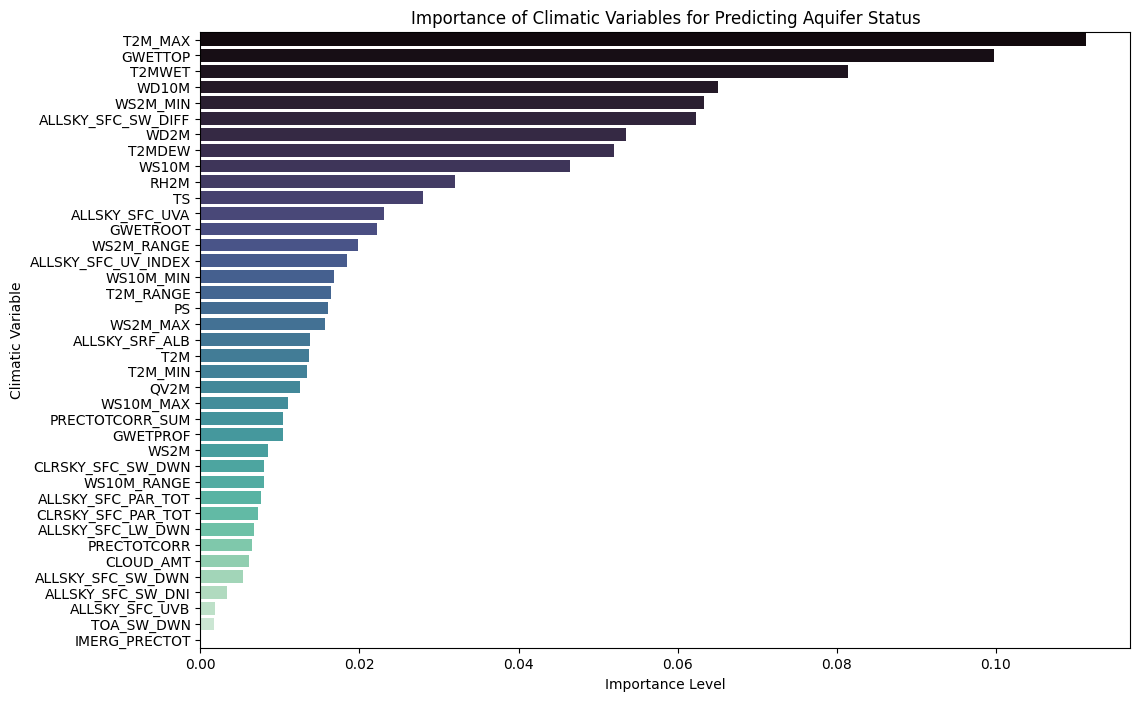


Step 24: Preparing data for flood risk analysis...
Data ready. We have 83 municipalities to analyze.

Step 25: Training the model...
Model trained.

Step 26: Displaying the most important climatic variables.


/tmp/ipython-input-3062251997.py:333: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_flood, y=importances_flood.index, palette='crest')


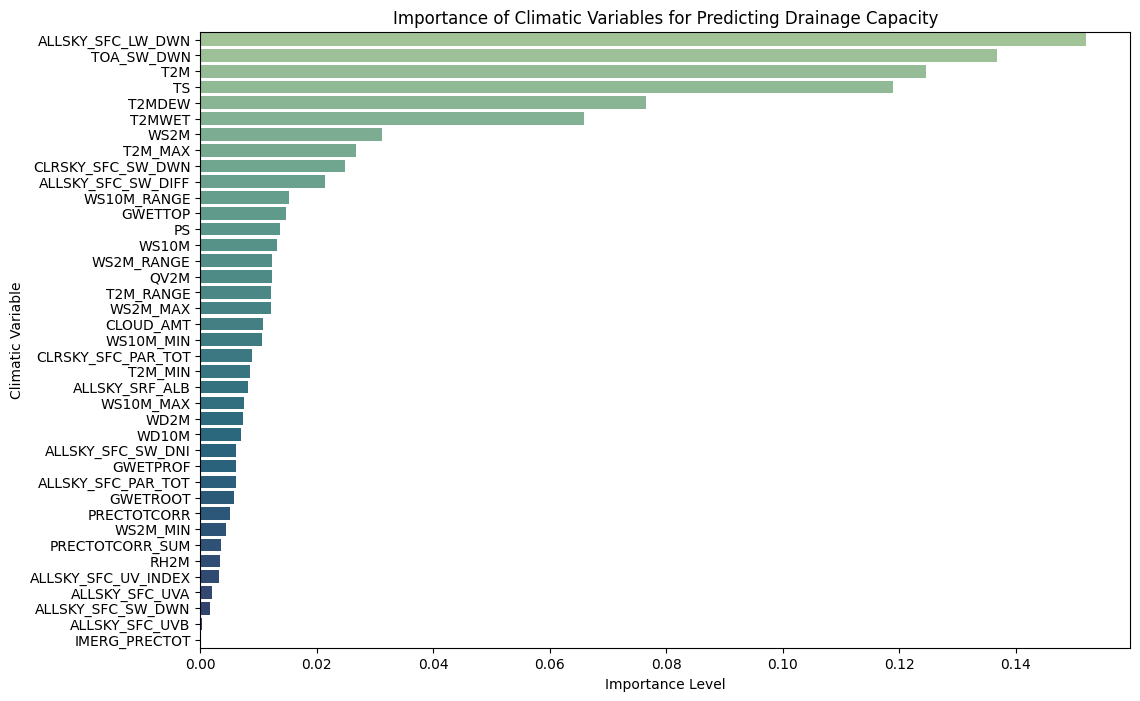

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# --- STEP 1: Prepare the DataFrames ---
# Make sure the 'df' (climate) and 'df_jalisco' (environmental) DataFrames are loaded.
# It is assumed you have already run the previous steps to rename 'ccc' to 'Municipality' in df_jalisco.
# df = pd.read_csv('unified_climate_data.csv')
# df_jalisco = pd.read_excel('jalisco.2013.Espaciotemporal.xlsx')

# It's assumed the 'Municipality' column in the climate 'df' is already renamed from the last step.
# If not, run: df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

# --- STEP 2: Define the list of common municipalities ---
common_municipalities = [
    'acatic', 'amatitan', 'ameca', 'arandas', 'atengo', 'atenguillo',
    'atotonilcoelalto', 'atoyac', 'ayotlan', 'ayutla',
    'canadasdeobregon', 'casimirocastillo', 'chapala', 'cocula',
    'colotlan', 'cuautla', 'cuquio', 'degollado', 'ejutla', 'elarenal',
    'elgrullo', 'ellimon', 'elsalto', 'encarnaciondediaz', 'etzatlan',
    'gomezfarias', 'jamay', 'jesusmaria', 'jocotepec', 'juanacatlan',
    'juchitlan', 'labarca', 'lagosdemoreno', 'lahuerta',
    'magdalena', 'mascota', 'mazamitla',
    'mexticacan', 'mezquitic', 'mixtlan', 'ocotlan', 'pihuamo',
    'poncitlan', 'quitupan', 'sandiegodealejandria', 'sangabriel',
    'sanjuandeloslagos', 'sanjuanitodeescobedo', 'sanjulian',
    'sanmarcos', 'sayula', 'tala', 'talpadeallende',
    'tamazuladegordiano', 'tapalpa', 'tecalitlan', 'tecolotlan',
    'tenamaxtlan', 'teocaltiche', 'tequila', 'teuchitlan', 'toliman',
    'tomatlan', 'tonala', 'tonaya', 'tonila', 'totatiche', 'tototlan',
    'tuxcacuesco', 'tuxcueca', 'tuxpan', 'uniondesanantonio',
    'uniondetula', 'valledeguadalupe', 'valledejuarez', 'villacorona',
    'villaguerrero', 'villahidalgo', 'villapurificacion', 'zapotiltic',
    'zapotlanejo', 'zapotlanelgrande', 'zapotlanrey'
]

# --- STEP 3: Filter the climate data for the year 2013 ---
# Filter first by municipality, then by year.
# Ensure 'Municipality' column exists in df
if 'Municipio' in df.columns and 'Municipality' not in df.columns:
    df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

df_climate_municipalities = df[df['Municipality'].isin(common_municipalities)]
df_2013_final = df_climate_municipalities[df_climate_municipalities['year'] == 2013]


# --- STEP 4: Standardize the Jalisco DataFrame ---
# Convert the 'Municipality' column to lowercase and remove leading/trailing spaces to ensure a clean merge.
df_jalisco['Municipality'] = df_jalisco['Municipality'].str.lower().str.strip()


# --- STEP 5: Merge the two DataFrames ---
# Create the final table by merging the 2013 climate data with the Jalisco data.
df_complete_2013 = pd.merge(df_2013_final, df_jalisco, on='Municipality', how='left')


# --- STEP 6: Display the merge result ---
pd.set_option('display.max_columns', None)
print("--- MERGE PROCESS COMPLETE ---")
print(f"The final DataFrame has {df_complete_2013.shape[0]} rows and {df_complete_2013.shape[1]} columns.")


# --- STEP 7: Identify columns to remove ---
columns_to_drop = ['c', 'Fuente', 'LUGAR_ESTATAL', 'year']
level_columns_to_drop = [col for col in df_complete_2013.columns if 'Nivel' in col or 'NIVEL' in col]
columns_to_drop.extend(level_columns_to_drop)


# --- STEP 8: Create the new, clean DataFrame ---
df_analysis = df_complete_2013.drop(columns=columns_to_drop)


# --- STEP 9: Verify the cleaning result ---
print("\n--- Clean DataFrame Ready for Analysis ---")
print(f"Removed {len(columns_to_drop)} columns.")


# --- STEP 10: Correlation Analysis ---
# Filter the DataFrame to keep only temperature measurements (T2M)
df_temperature = df_analysis[df_analysis['parameter_x'] == 'T2M'].copy()

# List of columns we are interested in for the correlation
columns_for_correlation = [
    'ann_x',
    'Drenaje_Normalizado',
    'Residuos_Solidos_Normalizado',
    'Acuiferos_Normalizado',
    'Agua_Normalizado',
    'Cobertura_Forestal_Normalizado',
    'Deforestacion_Normalizado',
    'Indice_Municipal_de_Medio_Ambiente'
]
df_for_analysis = df_temperature[columns_for_correlation]

# --- NEW: Rename columns to English for the plot ---
english_column_names = {
    'ann_x': 'Annual_Avg_Temp',
    'Drenaje_Normalizado': 'Drainage_Normalized',
    'Residuos_Solidos_Normalizado': 'Solid_Waste_Normalized',
    'Acuiferos_Normalizado': 'Aquifers_Normalized',
    'Agua_Normalizado': 'Water_Supply_Normalized',
    'Cobertura_Forestal_Normalizado': 'Forest_Cover_Normalized',
    'Deforestacion_Normalizado': 'Deforestation_Normalized',
    'Indice_Municipal_de_Medio_Ambiente': 'Municipal_Environment_Index'
}
df_for_analysis.rename(columns=english_column_names, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_for_analysis.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Annual Temperature (T2M) and Infrastructure/Environmental Variables')
plt.show()


# --- MODEL 1: Identifying Industrial Zones (RETC) ---

# --- STEP 11: Prepare the Data for the Model ---
print("\nStep 11: Restructuring data for industrial zone analysis...")
# Pivot the table to have municipalities as rows and climate parameters as columns
df_climate_pivot = df_analysis.pivot_table(
    index='Municipality',
    columns='parameter_x',
    values='ann_x'  # Using annual average values
).reset_index()

# Extract the RETC data (one value per municipality) and remove duplicates
df_retc = df_analysis[['Municipality', 'RETC_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the RETC data
df_industrial_model = pd.merge(df_climate_pivot, df_retc, on='Municipality')

# IMPORTANT: Fill any missing values with the mean of their respective column
df_industrial_model_filled = df_industrial_model.fillna(df_industrial_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_industrial_model_filled)} municipalities to analyze.")

# --- STEP 12: Train the Machine Learning Model ---
print("\nStep 12: Training the model to find relationships...")

# 'X' contains the climate features, 'y' is the target variable (RETC)
X = df_industrial_model_filled.drop(columns=['Municipality', 'RETC_Normalizado'])
y = df_industrial_model_filled['RETC_Normalizado']

# Initialize and train the Random Forest Regressor model
rf_industrial = RandomForestRegressor(n_estimators=100, random_state=42)
rf_industrial.fit(X, y)

print("Model trained.")

# --- STEP 13: Visualize Feature Importances ---
print("\nStep 13: Displaying the most important climatic variables.")

# Create a pandas Series to hold the feature importances
feature_importances = pd.Series(rf_industrial.feature_importances_, index=X.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Importance of Climatic Variables for Identifying Industrial Zones (RETC)')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- MODEL 2: Predicting Forest Cover ---

# --- STEP 14: Prepare the Data for the Model ---
print("\nStep 14: Preparing data for heat and vegetation analysis...")

# Extract the Forest Cover data (one value per municipality)
df_forest = df_analysis[['Municipality', 'Cobertura_Forestal_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Forest Cover data
df_heat_model = pd.merge(df_climate_pivot, df_forest, on='Municipality')

# Fill any missing values with the mean of their respective column
df_heat_model_filled = df_heat_model.fillna(df_heat_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_heat_model_filled)} municipalities to analyze.")

# --- STEP 15: Train the Machine Learning Model ---
print("\nStep 15: Training the model...")

# 'X_heat' contains the climate features
X_heat = df_heat_model_filled.drop(columns=['Municipality', 'Cobertura_Forestal_Normalizado'])

# 'y_heat' is the target variable: the level of forest cover
y_heat = df_heat_model_filled['Cobertura_Forestal_Normalizado']

# Initialize and train the model
rf_heat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heat.fit(X_heat, y_heat)

print("Model trained.")

# --- STEP 16: Visualize Feature Importances ---
print("\nStep 16: Displaying the most important climatic variables.")

# Get and sort the importance of each feature
importances_heat = pd.Series(rf_heat.feature_importances_, index=X_heat.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')
plt.title('Importance of Climatic Variables for Predicting Forest Cover')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- INDEX 1: Heat Vulnerability Index ---

# --- STEP 17: Select the key columns based on the model's findings ---
# We use .copy() to avoid SettingWithCopyWarning
df_heat_index = df_heat_model_filled[['Municipality', 'Cobertura_Forestal_Normalizado', 'T2M_MAX', 'RH2M', 'WS10M']].copy()

# --- STEP 18: Normalize the variables on a scale from 0 to 1 for combination ---
scaler = MinMaxScaler()
cols_to_scale = ['Cobertura_Forestal_Normalizado', 'T2M_MAX', 'RH2M', 'WS10M']
df_heat_index[cols_to_scale] = scaler.fit_transform(df_heat_index[cols_to_scale])

# --- STEP 19: Apply the index formula ---
# A HIGH score means HIGH VULNERABILITY.
# Therefore, we invert the Forest Cover and Humidity values, as low values for these are worse.
df_heat_index['Heat_Vulnerability_Index'] = (
    (1 - df_heat_index['Cobertura_Forestal_Normalizado']) +  # "Green Deficit" Factor
    df_heat_index['T2M_MAX'] +                              # Heat Factor
    (1 - df_heat_index['RH2M']) +                           # Dry Air Factor
    df_heat_index['WS10M']                                  # Drying Wind Factor
)

# --- STEP 20: Display the ranking of the most vulnerable municipalities ---
df_heat_ranking = df_heat_index[['Municipality', 'Heat_Vulnerability_Index']].sort_values(by='Heat_Vulnerability_Index', ascending=False)

print("\n--- Ranking of Municipalities by Heat and 'Green Deficit' Vulnerability ---")
print("A higher score means a greater urgency to create green spaces.")
print(df_heat_ranking.head(15))


# --- MODEL 3: Predicting Aquifer Status ---

# --- STEP 21: Prepare the Data for the Model ---
print("\nStep 21: Preparing data for water stress analysis...")

# Extract the Aquifer data (one value per municipality)
df_water = df_analysis[['Municipality', 'Acuiferos_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Aquifer data
df_water_model = pd.merge(df_climate_pivot, df_water, on='Municipality')

# Fill any missing values with the mean of their respective column
df_water_model_filled = df_water_model.fillna(df_water_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_water_model_filled)} municipalities to analyze.")


# --- STEP 22: Train the Machine Learning Model ---
print("\nStep 22: Training the model...")

# 'X_water' contains the climate features
X_water = df_water_model_filled.drop(columns=['Municipality', 'Acuiferos_Normalizado'])

# 'y_water' is the target variable: the state of the aquifers
y_water = df_water_model_filled['Acuiferos_Normalizado']

# Create and train the model
rf_water = RandomForestRegressor(n_estimators=100, random_state=42)
rf_water.fit(X_water, y_water)
print("Model trained.")


# --- STEP 23: Visualize the Importance of Variables ---
print("\nStep 23: Displaying the most important climatic variables.")

# Get and sort the importance of each variable
importances_water = pd.Series(rf_water.feature_importances_, index=X_water.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_water, y=importances_water.index, palette='mako')
plt.title('Importance of Climatic Variables for Predicting Aquifer Status')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- MODEL 4: Predicting Drainage Capacity ---

# --- STEP 24: Prepare the Data for the Model ---
print("\nStep 24: Preparing data for flood risk analysis...")

# Extract the Drainage data (one value per municipality)
df_drainage = df_analysis[['Municipality', 'Drenaje_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Drainage data
df_flood_model = pd.merge(df_climate_pivot, df_drainage, on='Municipality')

# Fill any missing values with the mean of their respective column
df_flood_model_filled = df_flood_model.fillna(df_flood_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_flood_model_filled)} municipalities to analyze.")


# --- STEP 25: Train the Machine Learning Model ---
print("\nStep 25: Training the model...")

# 'X_flood' contains the climate features
X_flood = df_flood_model_filled.drop(columns=['Municipality', 'Drenaje_Normalizado'])

# 'y_flood' is the drainage capacity we want to analyze
y_flood = df_flood_model_filled['Drenaje_Normalizado']

# Create and train the model
rf_flood = RandomForestRegressor(n_estimators=100, random_state=42)
rf_flood.fit(X_flood, y_flood)
print("Model trained.")


# --- STEP 26: Visualize Feature Importances ---
print("\nStep 26: Displaying the most important climatic variables.")

# Get and sort the importance of each variable
importances_flood = pd.Series(rf_flood.feature_importances_, index=X_flood.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_flood, y=importances_flood.index, palette='crest')
plt.title('Importance of Climatic Variables for Predicting Drainage Capacity')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


Data Fusion and Feature Matrix Construction
The initial section of the script (Steps 1-11) is dedicated to data fusion and preprocessing to create a feature matrix suitable for machine learning. It begins by loading and merging two distinct datasets: a high-granularity climate dataset and a socio-environmental dataset for a specific year (2013). A critical data wrangling operation is performed in Step 11 using the .pivot_table() function. This transforms the "long-format" climate data, where each row is a single observation, into a "wide-format" matrix (df_climate_pivot). In this final structure, each row represents a unique sample (a Municipality), and each column represents a distinct feature (the annual average value of a specific climate parameter). This process is analogous to creating a gene expression matrix from raw sequencing data, where disorganized reads are structured into a matrix of samples-by-genes, providing the foundational dataset for all subsequent modeling.

Feature Importance Analysis via Ensemble Learning Models
The core analytical work (Steps 12-26) leverages machine learning not for prediction, but for interpretation. Several separate RandomForestRegressor models are trained on the prepared climate matrix to determine the climatic drivers of different environmental and urban indicators, such as industrial zones, forest cover, aquifer status, and drainage capacity. The key technical goal is to extract the feature_importances_ attribute from each trained model. This attribute quantifies the contribution of each input climate variable to the model's predictive accuracy, effectively identifying the climatic drivers most strongly associated with each target variable. The resulting bar plots visualize this "regulatory network" by ranking the climate factors based on their influence.

Composite Index Construction and Vulnerability Scoring
The final section of the script (Steps 17-20 and 27-29) synthesizes the insights from the feature importance analysis to create actionable, multi-factor metrics. It selects the most critical climate variables identified by the preceding models—for example, Maximum Temperature (T2M_MAX), Relative Humidity (RH2M), and Wind Speed (WS10M) for heat stress. Each of these components is normalized to a uniform [0, 1] scale using MinMaxScaler to ensure they are comparable. A composite index, such as the Heat_Vulnerability_Index or Flood_Vulnerability_Index, is then calculated using a formula that weights these factors (e.g., using 1 - Cobertura_Forestal_Normalizado because less forest cover signifies higher vulnerability). This methodology is analogous to creating a polygenic risk score, where multiple genetic markers are combined into a single score to quantify an organism's susceptibility to a complex stressor. The resulting ranked lists provide a nuanced, data-driven assessment of each municipality's specific vulnerabilities.

--- MERGE PROCESS COMPLETE ---
The final DataFrame has 31540 rows and 78 columns.

--- Clean DataFrame Ready for Analysis ---
Removed 20 columns.


/tmp/ipython-input-3754856325.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis.rename(columns=english_column_names, inplace=True)


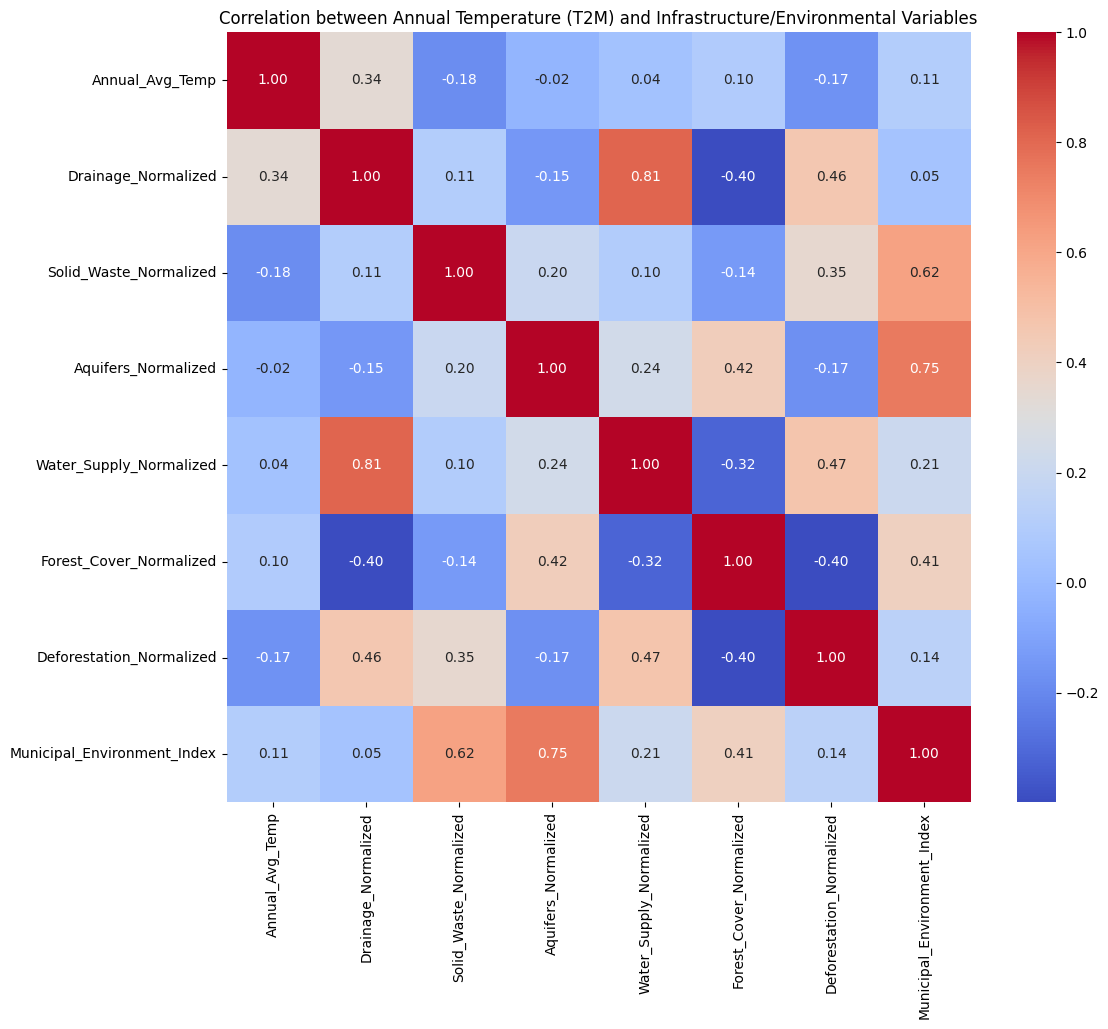


Step 11: Restructuring data for industrial zone analysis...
Data ready. We have 83 municipalities to analyze.

Step 12: Training the model to find relationships...
Model trained.

Step 13: Displaying the most important climatic variables.


/tmp/ipython-input-3754856325.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


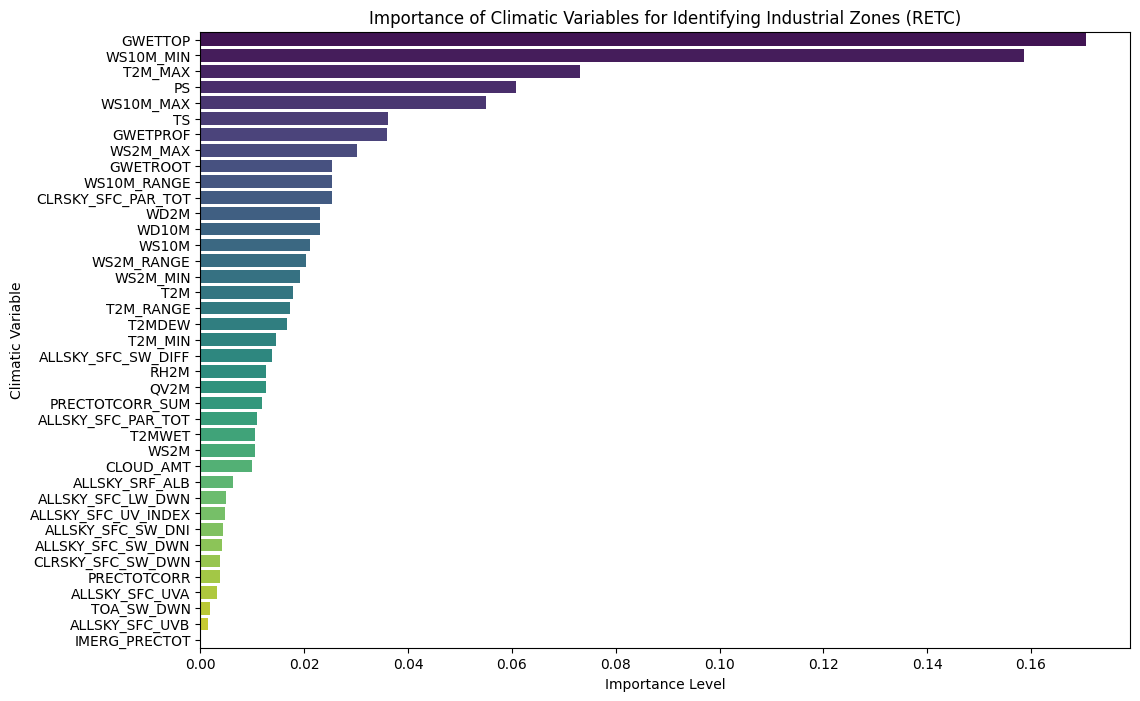


Step 14: Preparing data for heat and vegetation analysis...
Data ready. We have 83 municipalities to analyze.

Step 15: Training the model...
Model trained.

Step 16: Displaying the most important climatic variables.


/tmp/ipython-input-3754856325.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')


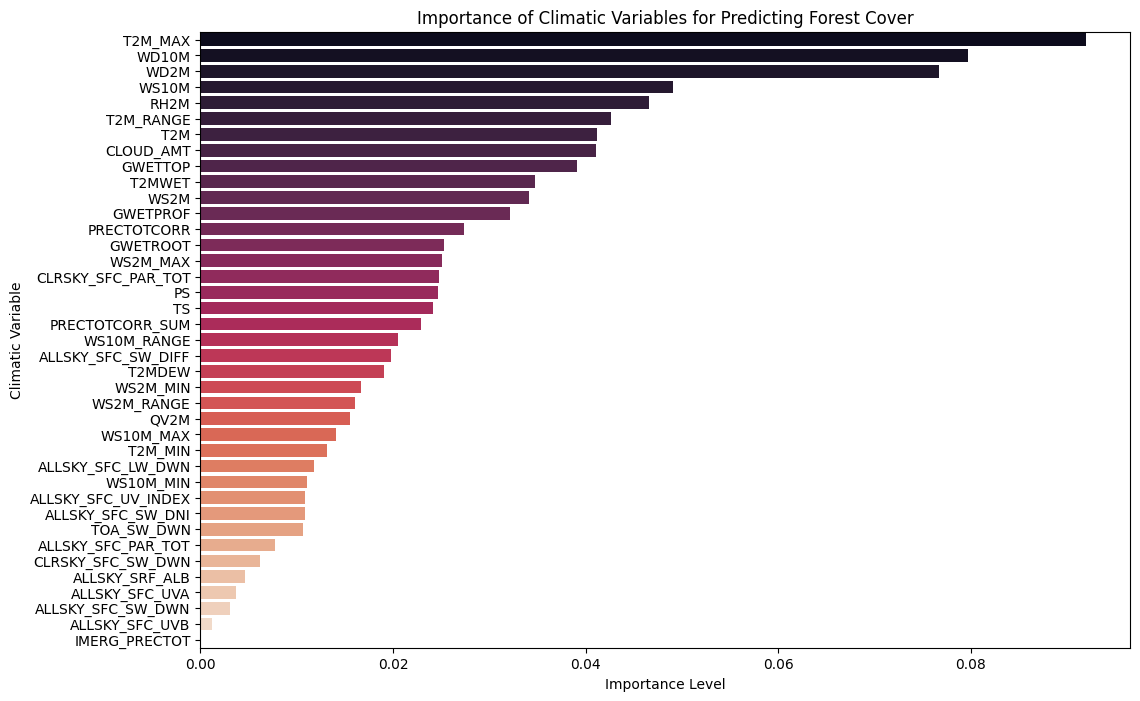


--- Ranking of Municipalities by Heat and 'Green Deficit' Vulnerability ---
A higher score means a greater urgency to create green spaces.
         Municipality  Heat_Vulnerability_Index
32      lagosdemoreno                  3.082556
58        teocaltiche                  2.975709
71  uniondesanantonio                  2.786001
26              jamay                  2.744111
67           tototlan                  2.729014
8             ayotlan                  2.672919
17          degollado                  2.635171
30          juchitlan                  2.594765
16             cuquio                  2.572232
34          magdalena                  2.518204
10   canadasdeobregon                  2.489061
73   valledeguadalupe                  2.489061
60         teuchitlan                  2.461651
1            amatitan                  2.456099
6    atotonilcoelalto                  2.427118

Step 21: Preparing data for water stress analysis...
Data ready. We have 83 municipalities 

/tmp/ipython-input-3754856325.py:286: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_water, y=importances_water.index, palette='mako')


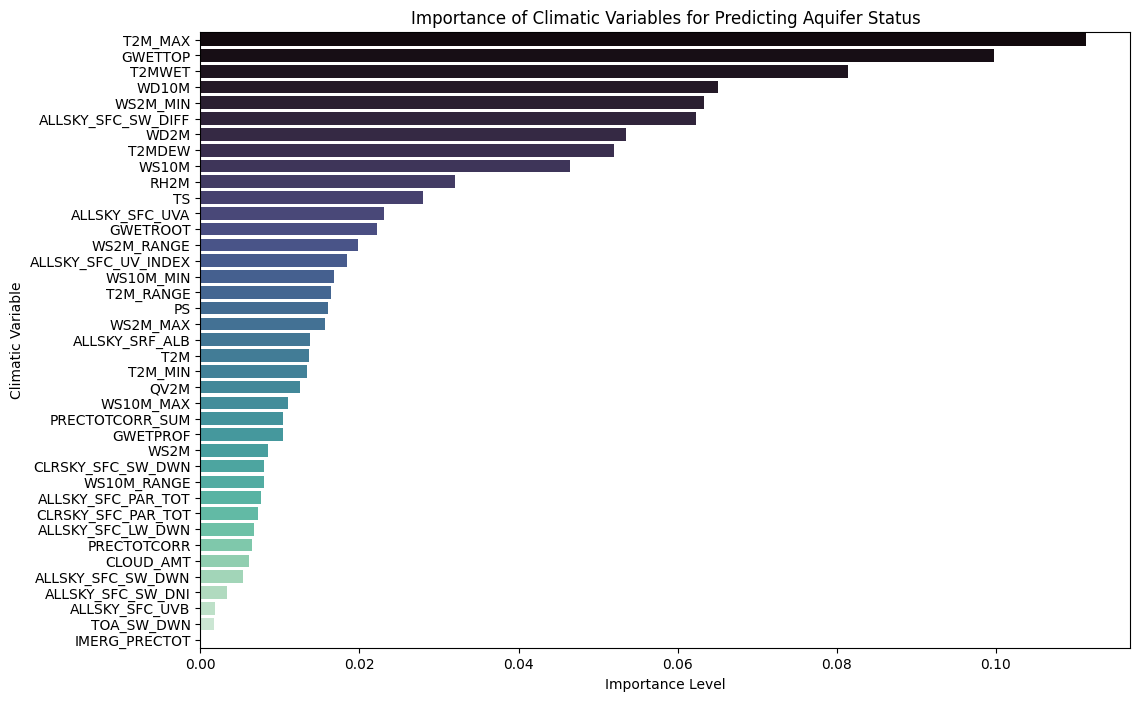


Step 24: Preparing data for flood risk analysis...
Data ready. We have 83 municipalities to analyze.

Step 25: Training the model...
Model trained.

Step 26: Displaying the most important climatic variables.


/tmp/ipython-input-3754856325.py:333: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_flood, y=importances_flood.index, palette='crest')


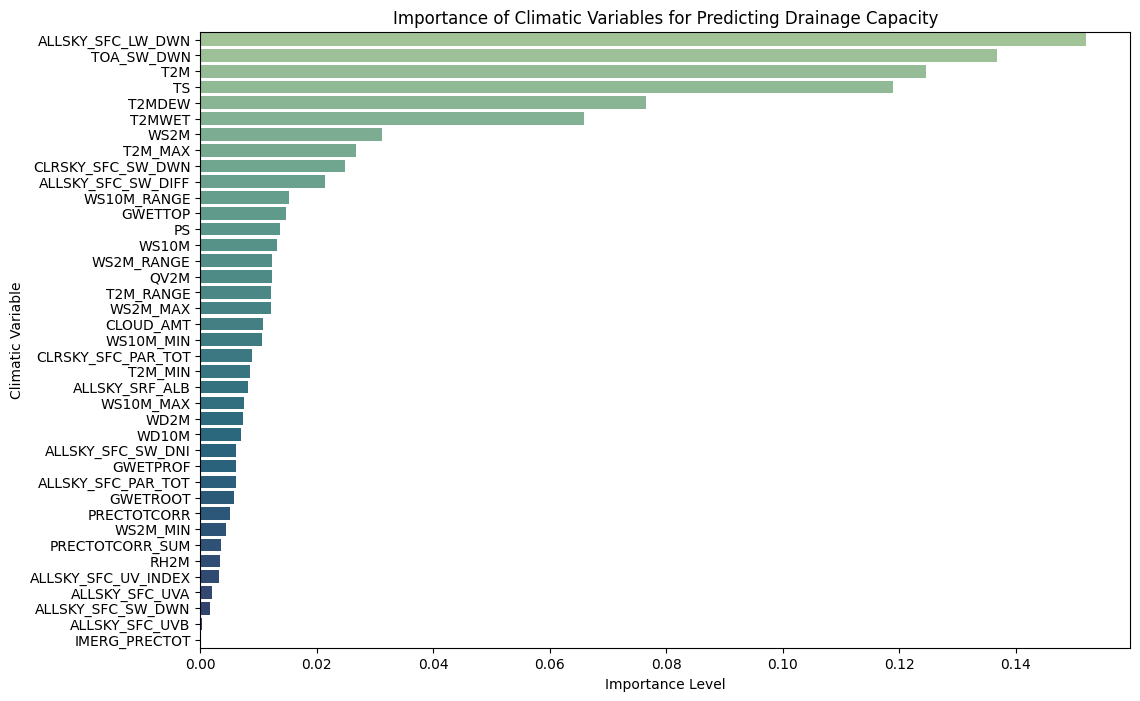


--- Ranking of Municipalities by Flood Vulnerability ---
A higher score means a greater risk of flooding from heavy rains.
   Municipality  Flood_Vulnerability_Index
38    mezquitic                   2.459437
0        acatic                   2.312425
40      ocotlan                   2.231851
3       arandas                   2.192869
68  tuxcacuesco                   2.172379
37   mexticacan                   2.115192
61      toliman                   2.066541
15      cuautla                   2.046147
50       sayula                   2.033964
58  teocaltiche                   2.031013
62     tomatlan                   2.010896
41      pihuamo                   1.986155
26        jamay                   1.964013
80  zapotlanejo                   1.960955
18       ejutla                   1.955828


In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# --- STEP 1: Prepare the DataFrames ---
# Make sure the 'df' (climate) and 'df_jalisco' (environmental) DataFrames are loaded.
# It is assumed you have already run the previous steps to rename 'ccc' to 'Municipality' in df_jalisco.
# df = pd.read_csv('unified_climate_data.csv')
# df_jalisco = pd.read_excel('jalisco.2013.Espaciotemporal.xlsx')

# It's assumed the 'Municipality' column in the climate 'df' is already renamed from the last step.
# If not, run: df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

# --- STEP 2: Define the list of common municipalities ---
common_municipalities = [
    'acatic', 'amatitan', 'ameca', 'arandas', 'atengo', 'atenguillo',
    'atotonilcoelalto', 'atoyac', 'ayotlan', 'ayutla',
    'canadasdeobregon', 'casimirocastillo', 'chapala', 'cocula',
    'colotlan', 'cuautla', 'cuquio', 'degollado', 'ejutla', 'elarenal',
    'elgrullo', 'ellimon', 'elsalto', 'encarnaciondediaz', 'etzatlan',
    'gomezfarias', 'jamay', 'jesusmaria', 'jocotepec', 'juanacatlan',
    'juchitlan', 'labarca', 'lagosdemoreno', 'lahuerta',
    'magdalena', 'mascota', 'mazamitla',
    'mexticacan', 'mezquitic', 'mixtlan', 'ocotlan', 'pihuamo',
    'poncitlan', 'quitupan', 'sandiegodealejandria', 'sangabriel',
    'sanjuandeloslagos', 'sanjuanitodeescobedo', 'sanjulian',
    'sanmarcos', 'sayula', 'tala', 'talpadeallende',
    'tamazuladegordiano', 'tapalpa', 'tecalitlan', 'tecolotlan',
    'tenamaxtlan', 'teocaltiche', 'tequila', 'teuchitlan', 'toliman',
    'tomatlan', 'tonala', 'tonaya', 'tonila', 'totatiche', 'tototlan',
    'tuxcacuesco', 'tuxcueca', 'tuxpan', 'uniondesanantonio',
    'uniondetula', 'valledeguadalupe', 'valledejuarez', 'villacorona',
    'villaguerrero', 'villahidalgo', 'villapurificacion', 'zapotiltic',
    'zapotlanejo', 'zapotlanelgrande', 'zapotlanrey'
]

# --- STEP 3: Filter the climate data for the year 2013 ---
# Filter first by municipality, then by year.
# Ensure 'Municipality' column exists in df
if 'Municipio' in df.columns and 'Municipality' not in df.columns:
    df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

df_climate_municipalities = df[df['Municipality'].isin(common_municipalities)]
df_2013_final = df_climate_municipalities[df_climate_municipalities['year'] == 2013]


# --- STEP 4: Standardize the Jalisco DataFrame ---
# Convert the 'Municipality' column to lowercase and remove leading/trailing spaces to ensure a clean merge.
df_jalisco['Municipality'] = df_jalisco['Municipality'].str.lower().str.strip()


# --- STEP 5: Merge the two DataFrames ---
# Create the final table by merging the 2013 climate data with the Jalisco data.
df_complete_2013 = pd.merge(df_2013_final, df_jalisco, on='Municipality', how='left')


# --- STEP 6: Display the merge result ---
pd.set_option('display.max_columns', None)
print("--- MERGE PROCESS COMPLETE ---")
print(f"The final DataFrame has {df_complete_2013.shape[0]} rows and {df_complete_2013.shape[1]} columns.")


# --- STEP 7: Identify columns to remove ---
columns_to_drop = ['c', 'Fuente', 'LUGAR_ESTATAL', 'year']
level_columns_to_drop = [col for col in df_complete_2013.columns if 'Nivel' in col or 'NIVEL' in col]
columns_to_drop.extend(level_columns_to_drop)


# --- STEP 8: Create the new, clean DataFrame ---
df_analysis = df_complete_2013.drop(columns=columns_to_drop)


# --- STEP 9: Verify the cleaning result ---
print("\n--- Clean DataFrame Ready for Analysis ---")
print(f"Removed {len(columns_to_drop)} columns.")


# --- STEP 10: Correlation Analysis ---
# Filter the DataFrame to keep only temperature measurements (T2M)
df_temperature = df_analysis[df_analysis['parameter_x'] == 'T2M'].copy()

# List of columns we are interested in for the correlation
columns_for_correlation = [
    'ann_x',
    'Drenaje_Normalizado',
    'Residuos_Solidos_Normalizado',
    'Acuiferos_Normalizado',
    'Agua_Normalizado',
    'Cobertura_Forestal_Normalizado',
    'Deforestacion_Normalizado',
    'Indice_Municipal_de_Medio_Ambiente'
]
df_for_analysis = df_temperature[columns_for_correlation]

# --- NEW: Rename columns to English for the plot ---
english_column_names = {
    'ann_x': 'Annual_Avg_Temp',
    'Drenaje_Normalizado': 'Drainage_Normalized',
    'Residuos_Solidos_Normalizado': 'Solid_Waste_Normalized',
    'Acuiferos_Normalizado': 'Aquifers_Normalized',
    'Agua_Normalizado': 'Water_Supply_Normalized',
    'Cobertura_Forestal_Normalizado': 'Forest_Cover_Normalized',
    'Deforestacion_Normalizado': 'Deforestation_Normalized',
    'Indice_Municipal_de_Medio_Ambiente': 'Municipal_Environment_Index'
}
df_for_analysis.rename(columns=english_column_names, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_for_analysis.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Annual Temperature (T2M) and Infrastructure/Environmental Variables')
plt.show()


# --- MODEL 1: Identifying Industrial Zones (RETC) ---

# --- STEP 11: Prepare the Data for the Model ---
print("\nStep 11: Restructuring data for industrial zone analysis...")
# Pivot the table to have municipalities as rows and climate parameters as columns
df_climate_pivot = df_analysis.pivot_table(
    index='Municipality',
    columns='parameter_x',
    values='ann_x'  # Using annual average values
).reset_index()

# Extract the RETC data (one value per municipality) and remove duplicates
df_retc = df_analysis[['Municipality', 'RETC_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the RETC data
df_industrial_model = pd.merge(df_climate_pivot, df_retc, on='Municipality')

# IMPORTANT: Fill any missing values with the mean of their respective column
df_industrial_model_filled = df_industrial_model.fillna(df_industrial_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_industrial_model_filled)} municipalities to analyze.")

# --- STEP 12: Train the Machine Learning Model ---
print("\nStep 12: Training the model to find relationships...")

# 'X' contains the climate features, 'y' is the target variable (RETC)
X = df_industrial_model_filled.drop(columns=['Municipality', 'RETC_Normalizado'])
y = df_industrial_model_filled['RETC_Normalizado']

# Initialize and train the Random Forest Regressor model
rf_industrial = RandomForestRegressor(n_estimators=100, random_state=42)
rf_industrial.fit(X, y)

print("Model trained.")

# --- STEP 13: Visualize Feature Importances ---
print("\nStep 13: Displaying the most important climatic variables.")

# Create a pandas Series to hold the feature importances
feature_importances = pd.Series(rf_industrial.feature_importances_, index=X.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Importance of Climatic Variables for Identifying Industrial Zones (RETC)')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- MODEL 2: Predicting Forest Cover ---

# --- STEP 14: Prepare the Data for the Model ---
print("\nStep 14: Preparing data for heat and vegetation analysis...")

# Extract the Forest Cover data (one value per municipality)
df_forest = df_analysis[['Municipality', 'Cobertura_Forestal_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Forest Cover data
df_heat_model = pd.merge(df_climate_pivot, df_forest, on='Municipality')

# Fill any missing values with the mean of their respective column
df_heat_model_filled = df_heat_model.fillna(df_heat_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_heat_model_filled)} municipalities to analyze.")

# --- STEP 15: Train the Machine Learning Model ---
print("\nStep 15: Training the model...")

# 'X_heat' contains the climate features
X_heat = df_heat_model_filled.drop(columns=['Municipality', 'Cobertura_Forestal_Normalizado'])

# 'y_heat' is the target variable: the level of forest cover
y_heat = df_heat_model_filled['Cobertura_Forestal_Normalizado']

# Initialize and train the model
rf_heat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heat.fit(X_heat, y_heat)

print("Model trained.")

# --- STEP 16: Visualize Feature Importances ---
print("\nStep 16: Displaying the most important climatic variables.")

# Get and sort the importance of each feature
importances_heat = pd.Series(rf_heat.feature_importances_, index=X_heat.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')
plt.title('Importance of Climatic Variables for Predicting Forest Cover')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- INDEX 1: Heat Vulnerability Index ---

# --- STEP 17: Select the key columns based on the model's findings ---
# We use .copy() to avoid SettingWithCopyWarning
df_heat_index = df_heat_model_filled[['Municipality', 'Cobertura_Forestal_Normalizado', 'T2M_MAX', 'RH2M', 'WS10M']].copy()

# --- STEP 18: Normalize the variables on a scale from 0 to 1 for combination ---
scaler = MinMaxScaler()
cols_to_scale = ['Cobertura_Forestal_Normalizado', 'T2M_MAX', 'RH2M', 'WS10M']
df_heat_index[cols_to_scale] = scaler.fit_transform(df_heat_index[cols_to_scale])

# --- STEP 19: Apply the index formula ---
# A HIGH score means HIGH VULNERABILITY.
# Therefore, we invert the Forest Cover and Humidity values, as low values for these are worse.
df_heat_index['Heat_Vulnerability_Index'] = (
    (1 - df_heat_index['Cobertura_Forestal_Normalizado']) +  # "Green Deficit" Factor
    df_heat_index['T2M_MAX'] +                              # Heat Factor
    (1 - df_heat_index['RH2M']) +                           # Dry Air Factor
    df_heat_index['WS10M']                                  # Drying Wind Factor
)

# --- STEP 20: Display the ranking of the most vulnerable municipalities ---
df_heat_ranking = df_heat_index[['Municipality', 'Heat_Vulnerability_Index']].sort_values(by='Heat_Vulnerability_Index', ascending=False)

print("\n--- Ranking of Municipalities by Heat and 'Green Deficit' Vulnerability ---")
print("A higher score means a greater urgency to create green spaces.")
print(df_heat_ranking.head(15))


# --- MODEL 3: Predicting Aquifer Status ---

# --- STEP 21: Prepare the Data for the Model ---
print("\nStep 21: Preparing data for water stress analysis...")

# Extract the Aquifer data (one value per municipality)
df_water = df_analysis[['Municipality', 'Acuiferos_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Aquifer data
df_water_model = pd.merge(df_climate_pivot, df_water, on='Municipality')

# Fill any missing values with the mean of their respective column
df_water_model_filled = df_water_model.fillna(df_water_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_water_model_filled)} municipalities to analyze.")


# --- STEP 22: Train the Machine Learning Model ---
print("\nStep 22: Training the model...")

# 'X_water' contains the climate features
X_water = df_water_model_filled.drop(columns=['Municipality', 'Acuiferos_Normalizado'])

# 'y_water' is the target variable: the state of the aquifers
y_water = df_water_model_filled['Acuiferos_Normalizado']

# Create and train the model
rf_water = RandomForestRegressor(n_estimators=100, random_state=42)
rf_water.fit(X_water, y_water)
print("Model trained.")


# --- STEP 23: Visualize the Importance of Variables ---
print("\nStep 23: Displaying the most important climatic variables.")

# Get and sort the importance of each variable
importances_water = pd.Series(rf_water.feature_importances_, index=X_water.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_water, y=importances_water.index, palette='mako')
plt.title('Importance of Climatic Variables for Predicting Aquifer Status')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- MODEL 4: Predicting Drainage Capacity ---

# --- STEP 24: Prepare the Data for the Model ---
print("\nStep 24: Preparing data for flood risk analysis...")

# Extract the Drainage data (one value per municipality)
df_drainage = df_analysis[['Municipality', 'Drenaje_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Drainage data
df_flood_model = pd.merge(df_climate_pivot, df_drainage, on='Municipality')

# Fill any missing values with the mean of their respective column
df_flood_model_filled = df_flood_model.fillna(df_flood_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_flood_model_filled)} municipalities to analyze.")


# --- STEP 25: Train the Machine Learning Model ---
print("\nStep 25: Training the model...")

# 'X_flood' contains the climate features
X_flood = df_flood_model_filled.drop(columns=['Municipality', 'Drenaje_Normalizado'])

# 'y_flood' is the drainage capacity we want to analyze
y_flood = df_flood_model_filled['Drenaje_Normalizado']

# Create and train the model
rf_flood = RandomForestRegressor(n_estimators=100, random_state=42)
rf_flood.fit(X_flood, y_flood)
print("Model trained.")


# --- STEP 26: Visualize Feature Importances ---
print("\nStep 26: Displaying the most important climatic variables.")

# Get and sort the importance of each variable
importances_flood = pd.Series(rf_flood.feature_importances_, index=X_flood.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_flood, y=importances_flood.index, palette='crest')
plt.title('Importance of Climatic Variables for Predicting Drainage Capacity')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- INDEX 2: Flood Vulnerability Index ---

# --- STEP 27: Prepare Data for the Index ---
# Note: There was a typo in the original notebook ('Riesgo _Erosion_Normalizado'). We match it here for consistency.
# If corrected in the source file, update the column name here as well.
df_terrain = df_analysis[['Municipality', 'Drenaje_Normalizado', 'Cobertura_Forestal_Normalizado', 'Riesgo _Erosion_Normalizado']].drop_duplicates()

# Select the key climate variable (PRECIPITATION)
df_rain = df_flood_model_filled[['Municipality', 'PRECTOTCORR_SUM']]

# Merge everything into a final DataFrame for our index
df_flood_index = pd.merge(df_terrain, df_rain, on='Municipality')


# --- STEP 28: Normalize and Calculate the Index ---
scaler = MinMaxScaler()
cols_to_scale = ['Drenaje_Normalizado', 'Cobertura_Forestal_Normalizado', 'Riesgo _Erosion_Normalizado', 'PRECTOTCORR_SUM']
df_flood_index[cols_to_scale] = scaler.fit_transform(df_flood_index[cols_to_scale])

# Apply the formula. A HIGH score = HIGH VULNERABILITY.
df_flood_index['Flood_Vulnerability_Index'] = (
    df_flood_index['PRECTOTCORR_SUM'] +                      # Factor: High rainfall
    (1 - df_flood_index['Drenaje_Normalizado']) +           # Factor: Poor drainage
    (1 - df_flood_index['Cobertura_Forestal_Normalizado']) + # Factor: Low vegetation to absorb water
    df_flood_index['Riesgo _Erosion_Normalizado']            # Factor: Unstable soil/landslides
)

# --- STEP 29: Display the Ranking ---
df_flood_ranking = df_flood_index[['Municipality', 'Flood_Vulnerability_Index']].sort_values(by='Flood_Vulnerability_Index', ascending=False)

print("\n--- Ranking of Municipalities by Flood Vulnerability ---")
print("A higher score means a greater risk of flooding from heavy rains.")
print(df_flood_ranking.head(15))



--- MERGE PROCESS COMPLETE ---
The final DataFrame has 31540 rows and 78 columns.

--- Clean DataFrame Ready for Analysis ---
Removed 20 columns.


/tmp/ipython-input-3374544163.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis.rename(columns=english_column_names, inplace=True)


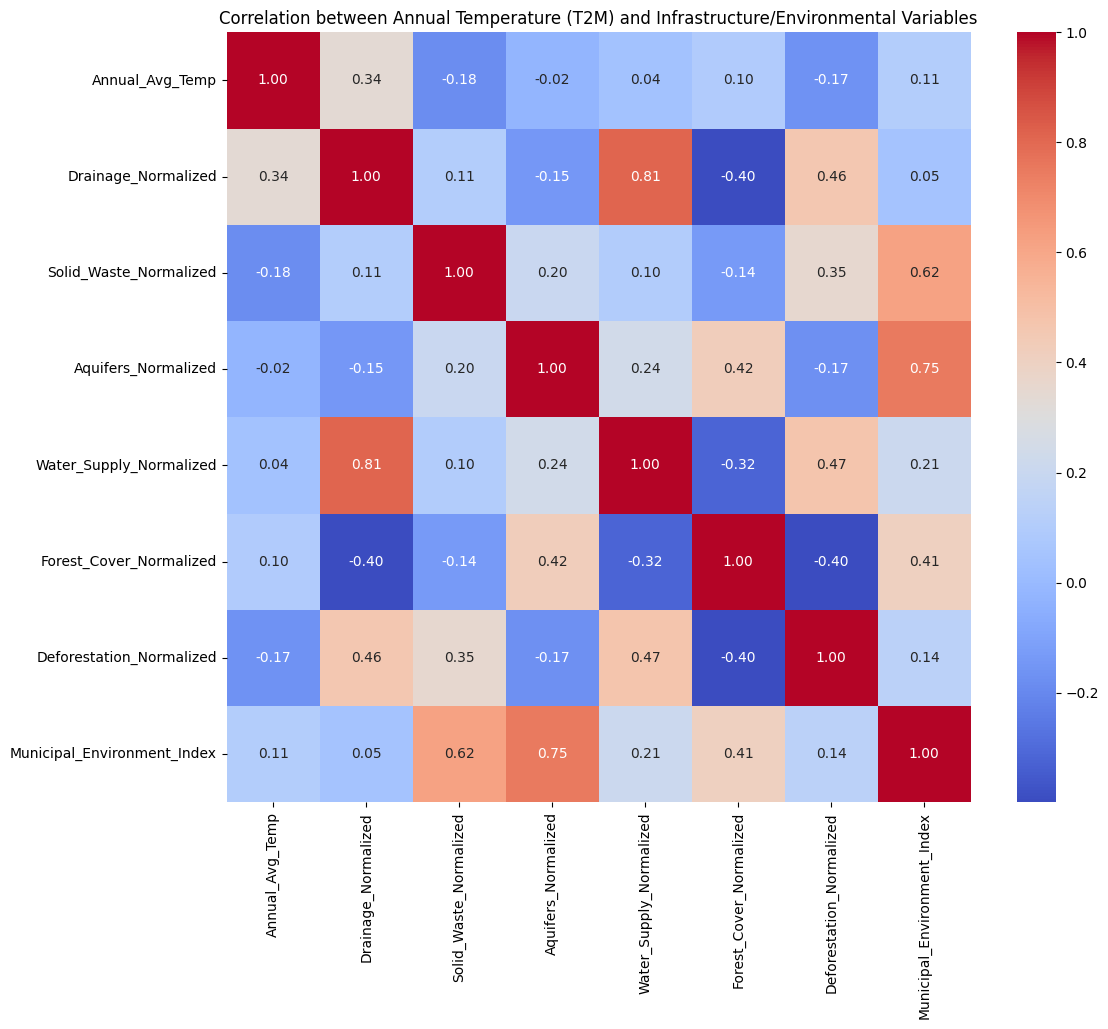


Step 11: Restructuring data for industrial zone analysis...
Data ready. We have 83 municipalities to analyze.

Step 12: Training the model to find relationships...
Model trained.

Step 13: Displaying the most important climatic variables.


/tmp/ipython-input-3374544163.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


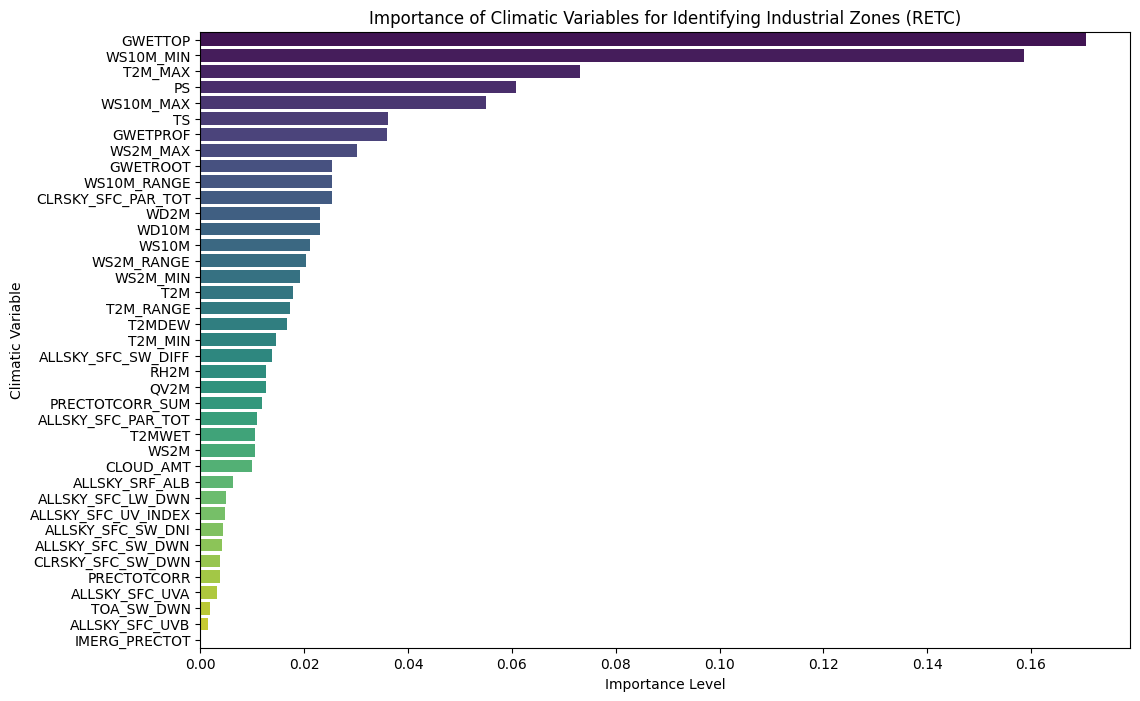


Step 14: Preparing data for heat and vegetation analysis...
Data ready. We have 83 municipalities to analyze.

Step 15: Training the model...
Model trained.

Step 16: Displaying the most important climatic variables.


/tmp/ipython-input-3374544163.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')


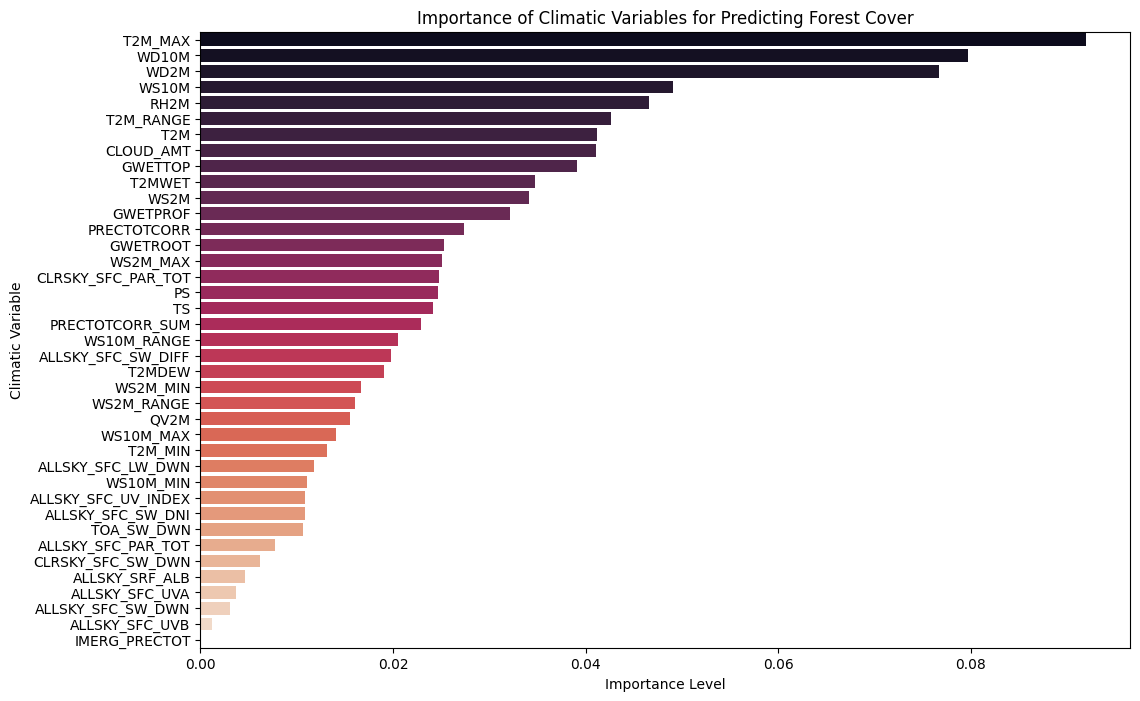


--- Ranking of Municipalities by Heat and 'Green Deficit' Vulnerability ---
A higher score means a greater urgency to create green spaces.
         Municipality  Heat_Vulnerability_Index
32      lagosdemoreno                  3.082556
58        teocaltiche                  2.975709
71  uniondesanantonio                  2.786001
26              jamay                  2.744111
67           tototlan                  2.729014
8             ayotlan                  2.672919
17          degollado                  2.635171
30          juchitlan                  2.594765
16             cuquio                  2.572232
34          magdalena                  2.518204
10   canadasdeobregon                  2.489061
73   valledeguadalupe                  2.489061
60         teuchitlan                  2.461651
1            amatitan                  2.456099
6    atotonilcoelalto                  2.427118

Step 21: Preparing data for water stress analysis...
Data ready. We have 83 municipalities 

/tmp/ipython-input-3374544163.py:286: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_water, y=importances_water.index, palette='mako')


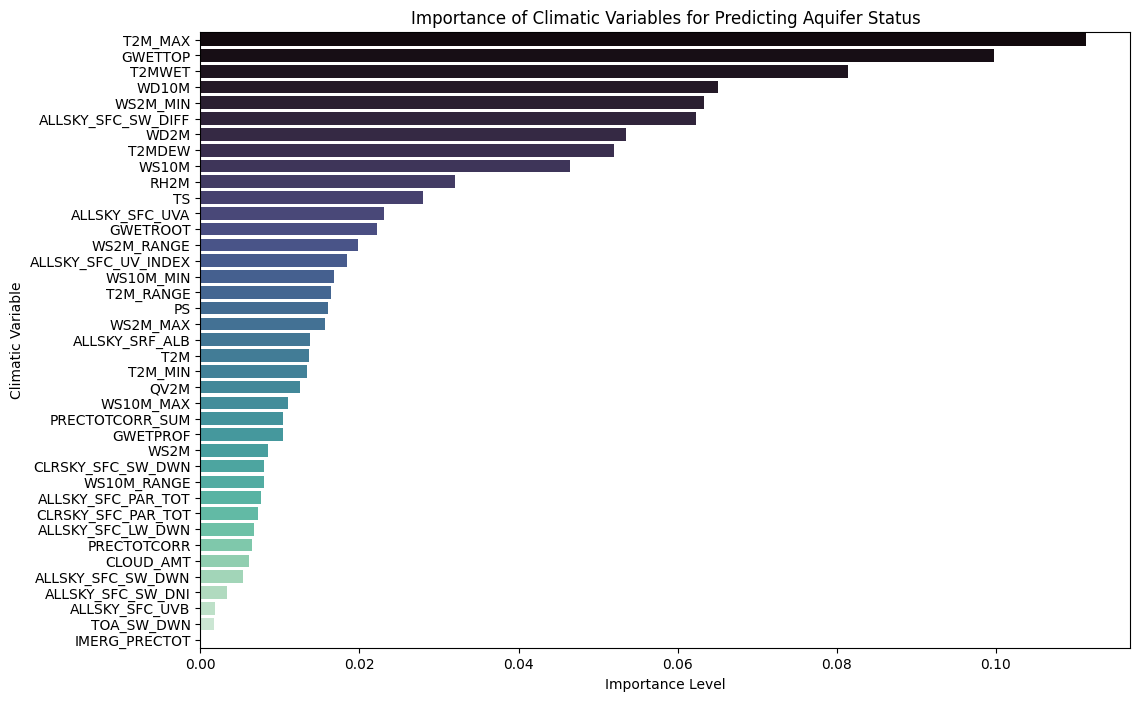


Step 24: Preparing data for flood risk analysis...
Data ready. We have 83 municipalities to analyze.

Step 25: Training the model...
Model trained.

Step 26: Displaying the most important climatic variables.


/tmp/ipython-input-3374544163.py:333: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_flood, y=importances_flood.index, palette='crest')


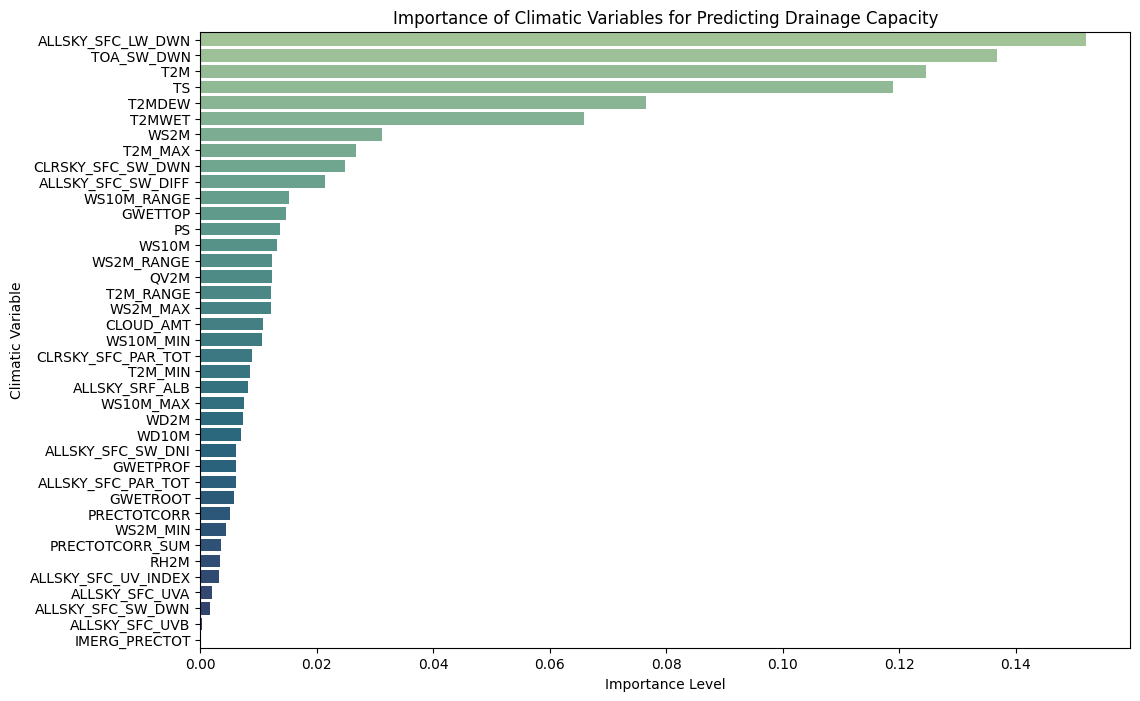


--- Ranking of Municipalities by Flood Vulnerability ---
A higher score means a greater risk of flooding from heavy rains.
   Municipality  Flood_Vulnerability_Index
38    mezquitic                   2.459437
0        acatic                   2.312425
40      ocotlan                   2.231851
3       arandas                   2.192869
68  tuxcacuesco                   2.172379
37   mexticacan                   2.115192
61      toliman                   2.066541
15      cuautla                   2.046147
50       sayula                   2.033964
58  teocaltiche                   2.031013
62     tomatlan                   2.010896
41      pihuamo                   1.986155
26        jamay                   1.964013
80  zapotlanejo                   1.960955
18       ejutla                   1.955828

--- Building the Advanced Urban Sustainability & Climate Resilience Index ---
Clean data consolidated for 52 municipalities.

--- Ranking of Municipalities by Urban Sustainability & Clima

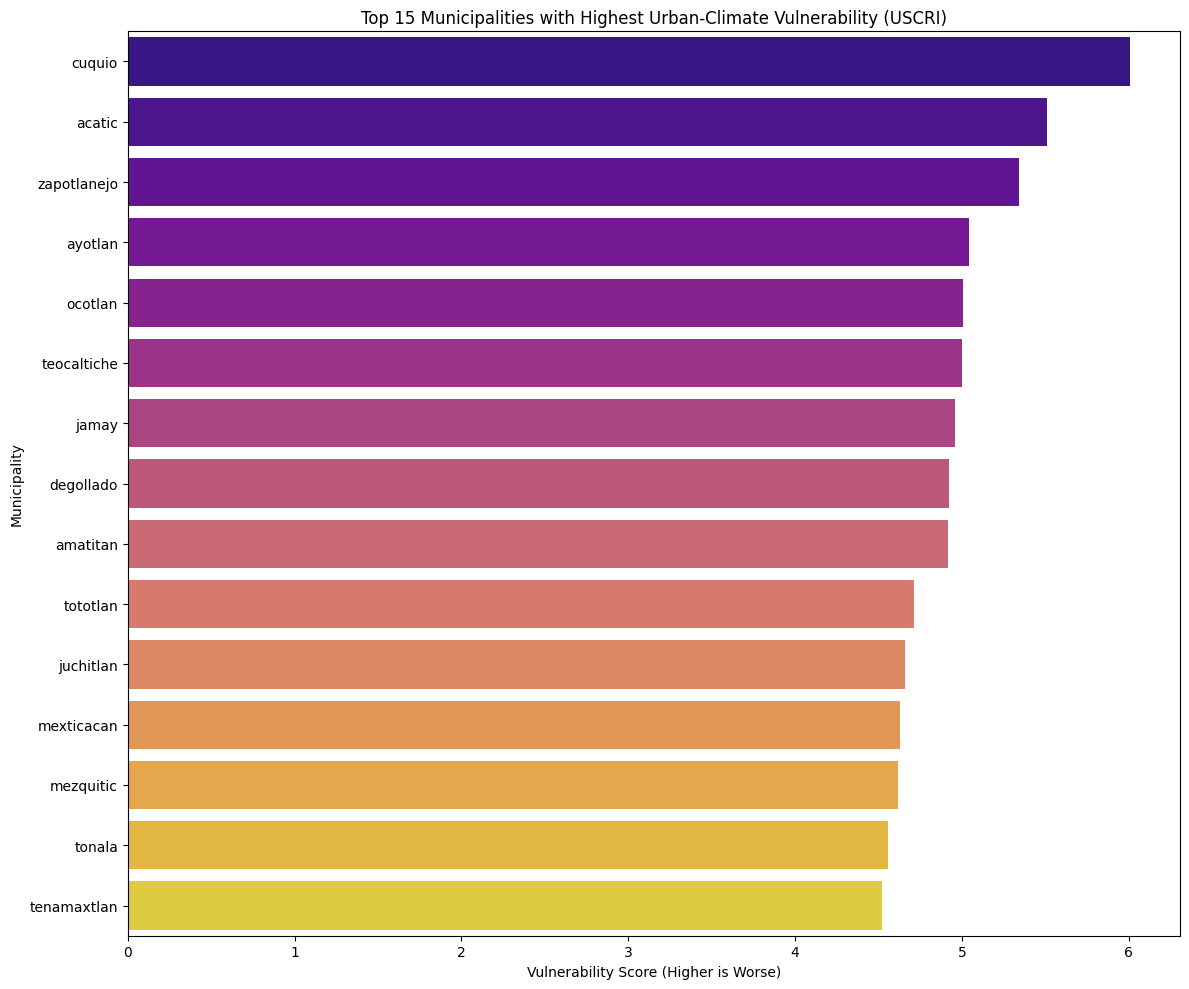

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# --- STEP 1: Prepare the DataFrames ---
# Make sure the 'df' (climate) and 'df_jalisco' (environmental) DataFrames are loaded.
# It is assumed you have already run the previous steps to rename 'ccc' to 'Municipality' in df_jalisco.
# df = pd.read_csv('unified_climate_data.csv')
# df_jalisco = pd.read_excel('jalisco.2013.Espaciotemporal.xlsx')

# It's assumed the 'Municipality' column in the climate 'df' is already renamed from the last step.
# If not, run: df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

# --- STEP 2: Define the list of common municipalities ---
common_municipalities = [
    'acatic', 'amatitan', 'ameca', 'arandas', 'atengo', 'atenguillo',
    'atotonilcoelalto', 'atoyac', 'ayotlan', 'ayutla',
    'canadasdeobregon', 'casimirocastillo', 'chapala', 'cocula',
    'colotlan', 'cuautla', 'cuquio', 'degollado', 'ejutla', 'elarenal',
    'elgrullo', 'ellimon', 'elsalto', 'encarnaciondediaz', 'etzatlan',
    'gomezfarias', 'jamay', 'jesusmaria', 'jocotepec', 'juanacatlan',
    'juchitlan', 'labarca', 'lagosdemoreno', 'lahuerta',
    'magdalena', 'mascota', 'mazamitla',
    'mexticacan', 'mezquitic', 'mixtlan', 'ocotlan', 'pihuamo',
    'poncitlan', 'quitupan', 'sandiegodealejandria', 'sangabriel',
    'sanjuandeloslagos', 'sanjuanitodeescobedo', 'sanjulian',
    'sanmarcos', 'sayula', 'tala', 'talpadeallende',
    'tamazuladegordiano', 'tapalpa', 'tecalitlan', 'tecolotlan',
    'tenamaxtlan', 'teocaltiche', 'tequila', 'teuchitlan', 'toliman',
    'tomatlan', 'tonala', 'tonaya', 'tonila', 'totatiche', 'tototlan',
    'tuxcacuesco', 'tuxcueca', 'tuxpan', 'uniondesanantonio',
    'uniondetula', 'valledeguadalupe', 'valledejuarez', 'villacorona',
    'villaguerrero', 'villahidalgo', 'villapurificacion', 'zapotiltic',
    'zapotlanejo', 'zapotlanelgrande', 'zapotlanrey'
]

# --- STEP 3: Filter the climate data for the year 2013 ---
# Filter first by municipality, then by year.
# Ensure 'Municipality' column exists in df
if 'Municipio' in df.columns and 'Municipality' not in df.columns:
    df.rename(columns={'Municipio': 'Municipality'}, inplace=True)

df_climate_municipalities = df[df['Municipality'].isin(common_municipalities)]
df_2013_final = df_climate_municipalities[df_climate_municipalities['year'] == 2013]


# --- STEP 4: Standardize the Jalisco DataFrame ---
# Convert the 'Municipality' column to lowercase and remove leading/trailing spaces to ensure a clean merge.
df_jalisco['Municipality'] = df_jalisco['Municipality'].str.lower().str.strip()


# --- STEP 5: Merge the two DataFrames ---
# Create the final table by merging the 2013 climate data with the Jalisco data.
df_complete_2013 = pd.merge(df_2013_final, df_jalisco, on='Municipality', how='left')


# --- STEP 6: Display the merge result ---
pd.set_option('display.max_columns', None)
print("--- MERGE PROCESS COMPLETE ---")
print(f"The final DataFrame has {df_complete_2013.shape[0]} rows and {df_complete_2013.shape[1]} columns.")


# --- STEP 7: Identify columns to remove ---
columns_to_drop = ['c', 'Fuente', 'LUGAR_ESTATAL', 'year']
level_columns_to_drop = [col for col in df_complete_2013.columns if 'Nivel' in col or 'NIVEL' in col]
columns_to_drop.extend(level_columns_to_drop)


# --- STEP 8: Create the new, clean DataFrame ---
df_analysis = df_complete_2013.drop(columns=columns_to_drop)


# --- STEP 9: Verify the cleaning result ---
print("\n--- Clean DataFrame Ready for Analysis ---")
print(f"Removed {len(columns_to_drop)} columns.")


# --- STEP 10: Correlation Analysis ---
# Filter the DataFrame to keep only temperature measurements (T2M)
df_temperature = df_analysis[df_analysis['parameter_x'] == 'T2M'].copy()

# List of columns we are interested in for the correlation
columns_for_correlation = [
    'ann_x',
    'Drenaje_Normalizado',
    'Residuos_Solidos_Normalizado',
    'Acuiferos_Normalizado',
    'Agua_Normalizado',
    'Cobertura_Forestal_Normalizado',
    'Deforestacion_Normalizado',
    'Indice_Municipal_de_Medio_Ambiente'
]
df_for_analysis = df_temperature[columns_for_correlation]

# --- NEW: Rename columns to English for the plot ---
english_column_names = {
    'ann_x': 'Annual_Avg_Temp',
    'Drenaje_Normalizado': 'Drainage_Normalized',
    'Residuos_Solidos_Normalizado': 'Solid_Waste_Normalized',
    'Acuiferos_Normalizado': 'Aquifers_Normalized',
    'Agua_Normalizado': 'Water_Supply_Normalized',
    'Cobertura_Forestal_Normalizado': 'Forest_Cover_Normalized',
    'Deforestacion_Normalizado': 'Deforestation_Normalized',
    'Indice_Municipal_de_Medio_Ambiente': 'Municipal_Environment_Index'
}
df_for_analysis.rename(columns=english_column_names, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_for_analysis.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Annual Temperature (T2M) and Infrastructure/Environmental Variables')
plt.show()


# --- MODEL 1: Identifying Industrial Zones (RETC) ---

# --- STEP 11: Prepare the Data for the Model ---
print("\nStep 11: Restructuring data for industrial zone analysis...")
# Pivot the table to have municipalities as rows and climate parameters as columns
df_climate_pivot = df_analysis.pivot_table(
    index='Municipality',
    columns='parameter_x',
    values='ann_x'  # Using annual average values
).reset_index()

# Extract the RETC data (one value per municipality) and remove duplicates
df_retc = df_analysis[['Municipality', 'RETC_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the RETC data
df_industrial_model = pd.merge(df_climate_pivot, df_retc, on='Municipality')

# IMPORTANT: Fill any missing values with the mean of their respective column
df_industrial_model_filled = df_industrial_model.fillna(df_industrial_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_industrial_model_filled)} municipalities to analyze.")

# --- STEP 12: Train the Machine Learning Model ---
print("\nStep 12: Training the model to find relationships...")

# 'X' contains the climate features, 'y' is the target variable (RETC)
X = df_industrial_model_filled.drop(columns=['Municipality', 'RETC_Normalizado'])
y = df_industrial_model_filled['RETC_Normalizado']

# Initialize and train the Random Forest Regressor model
rf_industrial = RandomForestRegressor(n_estimators=100, random_state=42)
rf_industrial.fit(X, y)

print("Model trained.")

# --- STEP 13: Visualize Feature Importances ---
print("\nStep 13: Displaying the most important climatic variables.")

# Create a pandas Series to hold the feature importances
feature_importances = pd.Series(rf_industrial.feature_importances_, index=X.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Importance of Climatic Variables for Identifying Industrial Zones (RETC)')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- MODEL 2: Predicting Forest Cover ---

# --- STEP 14: Prepare the Data for the Model ---
print("\nStep 14: Preparing data for heat and vegetation analysis...")

# Extract the Forest Cover data (one value per municipality)
df_forest = df_analysis[['Municipality', 'Cobertura_Forestal_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Forest Cover data
df_heat_model = pd.merge(df_climate_pivot, df_forest, on='Municipality')

# Fill any missing values with the mean of their respective column
df_heat_model_filled = df_heat_model.fillna(df_heat_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_heat_model_filled)} municipalities to analyze.")

# --- STEP 15: Train the Machine Learning Model ---
print("\nStep 15: Training the model...")

# 'X_heat' contains the climate features
X_heat = df_heat_model_filled.drop(columns=['Municipality', 'Cobertura_Forestal_Normalizado'])

# 'y_heat' is the target variable: the level of forest cover
y_heat = df_heat_model_filled['Cobertura_Forestal_Normalizado']

# Initialize and train the model
rf_heat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heat.fit(X_heat, y_heat)

print("Model trained.")

# --- STEP 16: Visualize Feature Importances ---
print("\nStep 16: Displaying the most important climatic variables.")

# Get and sort the importance of each feature
importances_heat = pd.Series(rf_heat.feature_importances_, index=X_heat.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_heat, y=importances_heat.index, palette='rocket')
plt.title('Importance of Climatic Variables for Predicting Forest Cover')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- INDEX 1: Heat Vulnerability Index ---

# --- STEP 17: Select the key columns based on the model's findings ---
# We use .copy() to avoid SettingWithCopyWarning
df_heat_index = df_heat_model_filled[['Municipality', 'Cobertura_Forestal_Normalizado', 'T2M_MAX', 'RH2M', 'WS10M']].copy()

# --- STEP 18: Normalize the variables on a scale from 0 to 1 for combination ---
scaler = MinMaxScaler()
cols_to_scale = ['Cobertura_Forestal_Normalizado', 'T2M_MAX', 'RH2M', 'WS10M']
df_heat_index[cols_to_scale] = scaler.fit_transform(df_heat_index[cols_to_scale])

# --- STEP 19: Apply the index formula ---
# A HIGH score means HIGH VULNERABILITY.
# Therefore, we invert the Forest Cover and Humidity values, as low values for these are worse.
df_heat_index['Heat_Vulnerability_Index'] = (
    (1 - df_heat_index['Cobertura_Forestal_Normalizado']) +  # "Green Deficit" Factor
    df_heat_index['T2M_MAX'] +                              # Heat Factor
    (1 - df_heat_index['RH2M']) +                           # Dry Air Factor
    df_heat_index['WS10M']                                  # Drying Wind Factor
)

# --- STEP 20: Display the ranking of the most vulnerable municipalities ---
df_heat_ranking = df_heat_index[['Municipality', 'Heat_Vulnerability_Index']].sort_values(by='Heat_Vulnerability_Index', ascending=False)

print("\n--- Ranking of Municipalities by Heat and 'Green Deficit' Vulnerability ---")
print("A higher score means a greater urgency to create green spaces.")
print(df_heat_ranking.head(15))


# --- MODEL 3: Predicting Aquifer Status ---

# --- STEP 21: Prepare the Data for the Model ---
print("\nStep 21: Preparing data for water stress analysis...")

# Extract the Aquifer data (one value per municipality)
df_water = df_analysis[['Municipality', 'Acuiferos_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Aquifer data
df_water_model = pd.merge(df_climate_pivot, df_water, on='Municipality')

# Fill any missing values with the mean of their respective column
df_water_model_filled = df_water_model.fillna(df_water_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_water_model_filled)} municipalities to analyze.")


# --- STEP 22: Train the Machine Learning Model ---
print("\nStep 22: Training the model...")

# 'X_water' contains the climate features
X_water = df_water_model_filled.drop(columns=['Municipality', 'Acuiferos_Normalizado'])

# 'y_water' is the target variable: the state of the aquifers
y_water = df_water_model_filled['Acuiferos_Normalizado']

# Create and train the model
rf_water = RandomForestRegressor(n_estimators=100, random_state=42)
rf_water.fit(X_water, y_water)
print("Model trained.")


# --- STEP 23: Visualize the Importance of Variables ---
print("\nStep 23: Displaying the most important climatic variables.")

# Get and sort the importance of each variable
importances_water = pd.Series(rf_water.feature_importances_, index=X_water.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_water, y=importances_water.index, palette='mako')
plt.title('Importance of Climatic Variables for Predicting Aquifer Status')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- MODEL 4: Predicting Drainage Capacity ---

# --- STEP 24: Prepare the Data for the Model ---
print("\nStep 24: Preparing data for flood risk analysis...")

# Extract the Drainage data (one value per municipality)
df_drainage = df_analysis[['Municipality', 'Drenaje_Normalizado']].drop_duplicates()

# Merge the pivoted climate data with the Drainage data
df_flood_model = pd.merge(df_climate_pivot, df_drainage, on='Municipality')

# Fill any missing values with the mean of their respective column
df_flood_model_filled = df_flood_model.fillna(df_flood_model.mean(numeric_only=True))

print(f"Data ready. We have {len(df_flood_model_filled)} municipalities to analyze.")


# --- STEP 25: Train the Machine Learning Model ---
print("\nStep 25: Training the model...")

# 'X_flood' contains the climate features
X_flood = df_flood_model_filled.drop(columns=['Municipality', 'Drenaje_Normalizado'])

# 'y_flood' is the drainage capacity we want to analyze
y_flood = df_flood_model_filled['Drenaje_Normalizado']

# Create and train the model
rf_flood = RandomForestRegressor(n_estimators=100, random_state=42)
rf_flood.fit(X_flood, y_flood)
print("Model trained.")


# --- STEP 26: Visualize Feature Importances ---
print("\nStep 26: Displaying the most important climatic variables.")

# Get and sort the importance of each variable
importances_flood = pd.Series(rf_flood.feature_importances_, index=X_flood.columns).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_flood, y=importances_flood.index, palette='crest')
plt.title('Importance of Climatic Variables for Predicting Drainage Capacity')
plt.xlabel('Importance Level')
plt.ylabel('Climatic Variable')
plt.show()


# --- INDEX 2: Flood Vulnerability Index ---

# --- STEP 27: Prepare Data for the Index ---
# Note: There was a typo in the original notebook ('Riesgo _Erosion_Normalizado'). We match it here for consistency.
# If corrected in the source file, update the column name here as well.
df_terrain = df_analysis[['Municipality', 'Drenaje_Normalizado', 'Cobertura_Forestal_Normalizado', 'Riesgo _Erosion_Normalizado']].drop_duplicates()

# Select the key climate variable (PRECIPITATION)
df_rain = df_flood_model_filled[['Municipality', 'PRECTOTCORR_SUM']]

# Merge everything into a final DataFrame for our index
df_flood_index = pd.merge(df_terrain, df_rain, on='Municipality')


# --- STEP 28: Normalize and Calculate the Index ---
scaler = MinMaxScaler()
cols_to_scale = ['Drenaje_Normalizado', 'Cobertura_Forestal_Normalizado', 'Riesgo _Erosion_Normalizado', 'PRECTOTCORR_SUM']
df_flood_index[cols_to_scale] = scaler.fit_transform(df_flood_index[cols_to_scale])

# Apply the formula. A HIGH score = HIGH VULNERABILITY.
df_flood_index['Flood_Vulnerability_Index'] = (
    df_flood_index['PRECTOTCORR_SUM'] +                      # Factor: High rainfall
    (1 - df_flood_index['Drenaje_Normalizado']) +           # Factor: Poor drainage
    (1 - df_flood_index['Cobertura_Forestal_Normalizado']) + # Factor: Low vegetation to absorb water
    df_flood_index['Riesgo _Erosion_Normalizado']            # Factor: Unstable soil/landslides
)

# --- STEP 29: Display the Ranking ---
df_flood_ranking = df_flood_index[['Municipality', 'Flood_Vulnerability_Index']].sort_values(by='Flood_Vulnerability_Index', ascending=False)

print("\n--- Ranking of Municipalities by Flood Vulnerability ---")
print("A higher score means a greater risk of flooding from heavy rains.")
print(df_flood_ranking.head(15))


# --- ADVANCED INDEX 3: Urban Sustainability & Climate Resilience Index (USCRI) ---

# --- STEP 30: Consolidate All Necessary Data (Corrected) ---
print("\n--- Building the Advanced Urban Sustainability & Climate Resilience Index ---")

# A. Start with a comprehensive and clean base of climate data (already filled NaNs)
df_base_climate = df_flood_model_filled.copy()

# B. Get the complete set of environmental and infrastructure variables
# KEY FIX: Select only the columns NOT ALREADY in the base climate df to avoid merge conflicts
sustainability_columns = [
    'Municipality', 'RETC_Normalizado', 'Residuos_Solidos_Normalizado',
    'Deforestacion_Normalizado', 'Agua_Normalizado',
    'Acuiferos_Normalizado', 'Cobertura_Forestal_Normalizado'
]
df_sustainability = df_analysis[sustainability_columns].drop_duplicates()

# C. Merge the two comprehensive data sources
df_uscri = pd.merge(df_base_climate, df_sustainability, on='Municipality', how='left')

# D. CRITICAL FIX: Drop any municipality missing data after the merge to prevent NaN errors
df_uscri.dropna(inplace=True)
print(f"Clean data consolidated for {len(df_uscri)} municipalities.")

# --- STEP 31: Normalize all variables for fair combination ---
scaler_uscri = MinMaxScaler()
cols_to_scale_ucri = df_uscri.columns.drop('Municipality')
df_uscri[cols_to_scale_ucri] = scaler_uscri.fit_transform(df_uscri[cols_to_scale_ucri])

# --- STEP 32: Calculate the Sub-Indices and the Final USCRI ---
# A HIGH score indicates a critical imbalance and high vulnerability.

# Sub-Index A: Urban-Industrial Pressure Score
df_uscri['Pressure_Score'] = (
    df_uscri['RETC_Normalizado'] +
    (1 - df_uscri['Residuos_Solidos_Normalizado']) +
    df_uscri['Deforestacion_Normalizado']
)

# Sub-Index B: Ecosystem & Infrastructure Health Score
df_uscri['Health_Score'] = (
    (1 - df_uscri['Agua_Normalizado']) +
    (1 - df_uscri['Drenaje_Normalizado']) +
    (1 - df_uscri['Acuiferos_Normalizado']) +
    (1 - df_uscri['Cobertura_Forestal_Normalizado'])
)

# Sub-Index C: Climate Stressor Score
df_uscri['Climate_Stressor_Score'] = df_uscri['T2M_MAX'] + df_uscri['PRECTOTCORR_SUM']

# Final Index: Urban Sustainability & Climate Resilience Index (USCRI)
df_uscri['USCRI_Score'] = df_uscri['Pressure_Score'] + df_uscri['Health_Score'] + df_uscri['Climate_Stressor_Score']

# --- STEP 33: Display the Final Ranking ---
df_uscri_ranking = df_uscri[['Municipality', 'USCRI_Score', 'Pressure_Score', 'Health_Score', 'Climate_Stressor_Score']].sort_values(by='USCRI_Score', ascending=False)

print("\n--- Ranking of Municipalities by Urban Sustainability & Climate Resilience Index (USCRI) ---")
print("A higher score signifies a critical imbalance between urban pressure and environmental/climate resilience.")
print(df_uscri_ranking.head(15))

# --- STEP 34: Visualize the USCRI Results (Improvement) ---
plt.figure(figsize=(12, 10))
# Using a more vibrant and distinct palette like 'plasma'
top_15_vulnerable = df_uscri_ranking.head(15)
sns.barplot(x='USCRI_Score', y='Municipality', data=top_15_vulnerable, palette='plasma', hue='Municipality', dodge=False)
plt.title('Top 15 Municipalities with Highest Urban-Climate Vulnerability (USCRI)')
plt.xlabel('Vulnerability Score (Higher is Worse)')
plt.ylabel('Municipality')
plt.legend([],[], frameon=False) # Hide legend as y-axis is clear
plt.tight_layout()
plt.show()

Single-Domain Index Construction: The Flood Vulnerability Index
This initial block of code (Steps 27-29) constructs a targeted Flood_Vulnerability_Index by integrating multiple data domains. It begins by creating a feature set that includes key terrestrial variables (Drenaje_Normalizado, Cobertura_Forestal_Normalizado, Riesgo _Erosion_Normalizado) and the primary climatic driver, total precipitation (PRECTOTCORR_SUM). Each of these variables is then scaled to a uniform [0, 1] range using MinMaxScaler to ensure they are arithmetically comparable. The composite index is calculated via a linear combination of these normalized factors. Critically, the formula inverts the protective factors by using (1 - variable) for drainage and forest cover, correctly aligning the logic so that a higher value for each term in the sum corresponds to higher vulnerability. The final ranked list identifies municipalities where the combination of high rainfall, poor drainage, low vegetation, and unstable soil creates the highest systemic risk for flooding.

Holistic Systems Modeling: The Urban Sustainability & Climate Resilience Index (USCRI)
The second part of the script (Steps 30-34) constructs a more advanced, multi-dimensional index designed to provide a holistic assessment of a municipality's systemic health. This process begins by consolidating a comprehensive feature set, merging all relevant climate, environmental, and infrastructure variables into a single DataFrame (df_uscri), which is then fully normalized. The core of this strategy is the calculation of three distinct sub-indices, each representing a different dimension of urban-environmental balance: the Pressure_Score (quantifying anthropogenic stress like industrial emissions and deforestation), the Health_Score (quantifying the state of natural and built systems like aquifers and drainage), and the Climate_Stressor_Score (quantifying direct climatic threats from extreme heat and precipitation).

Aggregation, Ranking, and Visualization for Actionable Insights
The final step aggregates the three sub-indices into a single, comprehensive USCRI_Score. This final score represents the overall degree of imbalance between a municipality's urban pressures, the health of its supporting ecosystems, and the intensity of the climate stressors it faces. By sorting the municipalities based on this final score, the script generates a ranked list that prioritizes areas with the most critical systemic vulnerabilities. The analysis concludes by creating a horizontal bar chart that visualizes the top 15 highest-scoring municipalities.  This visualization serves as a powerful communication tool, enabling a quick and clear identification of the urban centers most in need of integrated policy interventions to enhance their sustainability and climate resilience.